# Remake Figure 4

Author: Jacob Parres-Gold (jacobparresgold@gmail.com)

Last Revised: 20231019

This notebook is designed to reproduce figures from the paper using the archived data folder. Each section should be possible to run independently.

Note that this notebook is primarily intended for users who wish to replot the existing data in different ways; it does not include code for the analysis itself.

In [2]:
import itertools
import math
import numpy as np
import os
import pandas as pd
import pathlib
import scipy.stats
import sys
import time

# Plotting
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import matplotlib.ticker as mticker
from matplotlib import rcParams
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

# EQTK to calculate equilibrium concentrations - install instructions here https://eqtk.github.io/getting_started/eqtk_installation.html
import eqtk

In [3]:
# Load utility functions from dimer_network_utilities.py
utilities_path = str(pathlib.Path('C:\\Users','jacob','Local_Coding',\
                                  'ElowitzLab','Promiscuous_Networks','Notebooks','Paper_Notebooks')) # Directory of your utilities.py file
sys.path.append(utilities_path)
from dimer_network_utilities import *

In [ ]:
# Define directory of the archived data folder parresgold_2023_dimer_networks_data
load_dir = str(pathlib.Path('E:\\','parresgold_2023_dimer_networks','parresgold_2023_dimer_networks_data'))

In [5]:
# Define directory to save to
out_dir = str(pathlib.Path('C:\\Users','jacob','Downloads'))

if not os.path.isdir(out_dir):
    os.mkdir(out_dir)

In [6]:
# Plotting settings
rcParams.update({
    "text.usetex": False,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"],	
    "font.size":9,
    "axes.titlesize":9,
    "axes.labelsize":9,
    "xtick.labelsize":9,
    "ytick.labelsize":9,
    "savefig.dpi": 900, 
    'figure.figsize': [6.0, 4.0],
    'figure.dpi': 150,
    'pdf.fonttype':42,
    'ps.fonttype':42,
})

In [7]:
# Print package versions
import pkg_resources
imports = list(set(get_imports()))
requirements = []
for m in pkg_resources.working_set:
    if m.project_name in imports and m.project_name!="pip":
        requirements.append((m.project_name, m.version))

print("Package versions:")
print("python={}".format(sys.version.split('|')[0].replace(' ','')))
for r in requirements:
    print("{}={}".format(*r))

C:\Users\jacob\AppData\Local\Temp\ipykernel_31908\3780498324.py:2: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources


Package versions:
python=3.8.13
eqtk=0.1.3
matplotlib=3.7.1
networkx=2.7.1
numpy=1.21.5
pandas=1.4.1
scipy=1.10.1


## Figure 4A

### Mini schematics

#### m=3 Network

In [69]:
m = 3
name = '3M'

# Affinities
K = {
    'K11': 1e-10,
    'K12': 1e0,
    'K13': 1e-3,
    'K22': 1e-10,
    'K23': 1e3,
    'K33': 1e0,
}

# Accessory expression levels
A = {
    'M2':1e0,
    'M3':1e0,
}

param_sets = np.array([list(K.values())+list(A.values())])

dimer_of_interest = make_nXn_species_names(m).index('D_1_1') - m # Index of dimer to use as output (D_1_1 = index 0)

In [70]:
save = True

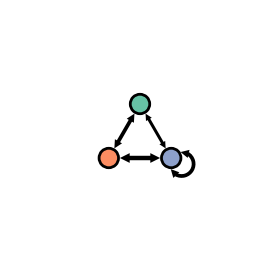

In [71]:
fig, axs = make_network_plots_polygon(m=m, # Number of monomers
                                        n_input=1, # Number of inputs
                                        param_sets=param_sets, # Parameter sets to draw from
                                        univs_to_plot=np.array([0]), # Indicies of param_sets to plot
                                        dimers_of_interest=np.array([[dimer_of_interest]]), # Index of output dimer
                                        input_node_values=np.array([0]), # Abundances to use for input node(s), log scale
                                        ncols = 1, # Number of columns in figure
                                        r_node = 0.15*0.6, # Radius of nodes around center
                                        r_loop = 0.05*0.6, # Radius of loops around nodes 
                                        node_scales = [-3,3,2,6], # Scales for node sizes (lower and upper bounds in log scale, min and max sizes)
                                        K_edge_scales = [-4,3,0.5,0.8], # Scales for edge widths (lower and upper bounds in log scale, min and max widths)
                                        input_cmap='Set2', # Colormap for nodes
                                        fontname='Helvetica', # Font name
                                        fontsize=9, # Font size
                                        non_output_dimer_color='k',
                                        labels=False,
                                        upscale_arrowhead=1.1,
                                        node_edge_width=0.5,
)

fig.set_dpi(400)

if save:
    filename = f'Fig4A_{name}'
    plt.savefig(str(pathlib.Path(out_dir,filename+'.pdf')),bbox_inches='tight',pad_inches=0,transparent=True)
    fig.patch.set_facecolor('white')
    plt.savefig(str(pathlib.Path(out_dir,filename+'.png')),dpi=900,bbox_inches='tight',pad_inches=0)

#### m=12 Network

In [97]:
m = 12
name = '12M'

rng = np.random.default_rng()

# Affinities
num_dimers = int(num_combos_with_replacement(m,2))
# K = 10**rng.uniform(-4,2,size=num_dimers)
# K[rng.choice(range(num_dimers),size=int(0.8*num_dimers),replace=False)] = 1e-10

K = np.array([1e-10, 2.61231469e-02, 1e-10, 1e-10,
       1e-10, 1e-10, 6.07017213e-1, 1e-10,
       1e-10, 1e-10, 1e-10, 1e-10,
       1e-10, 1e-10, 1e-10, 1e-10,
       1e-10, 1e-10, 1e-10, 1.43199650e+00,
       1e-10, 1e-10, 1e-10, 1e-10,
       1e-10, 1e-10, 6.28991029e-02, 5.43936229e-02,
       3.38198198e-03, 1e-10, 1.74561245e-02, 1e-10,
       1e-10, 1e-10, 6.67792875e-03, 8.74436415e-3,
       1e-10, 1e-10, 1e-10, 1e-10,
       1e-10, 1e-10, 1e-10, 1e-10,
       1e-10, 1e-10, 1e-10, 1e-10,
       1.94994400e-04, 1e-10, 4.12277754e-1, 1e-10,
       1e-10, 1e-10, 1e-10, 1e-10,
       1.79689251e-02, 1e-10, 1e-10, 1e-10,
       1e-10, 1e-10, 1e-10, 9.89318853e-04,
       1e-10, 8.64521363e-02, 2.38332373e-1, 1e-10,
       1e-10, 5.04589814e-03, 1e-10, 1e-10,
       1e-10, 1e-10, 1e-10, 1e-10,
       1e-10, 1e-10])

In [98]:
# Accessory expression levels
A = 10**rng.uniform(-3,3,size=(m-1,))

param_sets = np.expand_dims(np.hstack((K,A)),axis=0)

dimer_of_interest1 = make_nXn_species_names(m).index('D_1_1') - m # Index of dimer to use as output (D_1_1 = index 0)

In [99]:
save = True

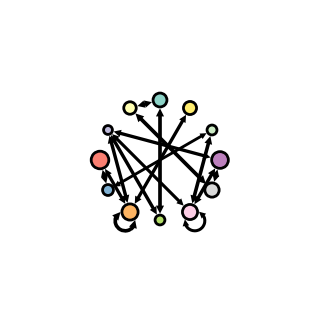

In [100]:
fig, axs = make_network_plots_polygon(m=m, # Number of monomers
                                        n_input=1, # Number of inputs
                                        param_sets=param_sets, # Parameter sets to draw from
                                        univs_to_plot=np.array([0]), # Indicies of param_sets to plot
                                        dimers_of_interest=np.array([[dimer_of_interest]]), # Index of output dimer
                                        input_node_values=np.array([0]), # Abundances to use for input node(s), log scale
                                        ncols = 1, # Number of columns in figure
                                        r_node = 0.3*0.5, # Radius of nodes around center
                                        r_loop = 0.05*0.5, # Radius of loops around nodes 
                                        node_scales = [-3,3,2,4], # Scales for node sizes (lower and upper bounds in log scale, min and max sizes)
                                        K_edge_scales = [-4,3,0.5,0.8], # Scales for edge widths (lower and upper bounds in log scale, min and max widths)
                                        input_cmap='Set3', # Colormap for nodes
                                        fontname='Helvetica', # Font name
                                        fontsize=9, # Font size
                                        non_output_dimer_color='k',
                                        labels=False,
                                        upscale_arrowhead=1.1,
                                        node_edge_width=0.5,
)

fig.set_dpi(400)

if save:
    filename = f'Fig4A_{name}'
    plt.savefig(str(pathlib.Path(out_dir,filename+'.pdf')),bbox_inches='tight',pad_inches=0,transparent=True)
    fig.patch.set_facecolor('white')
    plt.savefig(str(pathlib.Path(out_dir,filename+'.png')),dpi=900,bbox_inches='tight',pad_inches=0)

#### Sparse m=8 Network

In [101]:
m = 8
name = '8M_sparse'

rng = np.random.default_rng()

# Affinities
num_dimers = int(num_combos_with_replacement(m,2))
dimer_names = make_nXn_species_names(m)[m::]
homodimer_ids = [i for i, dimer_name in enumerate(dimer_names) if dimer_name.split('_')[1]==dimer_name.split('_')[2]]
heterodimer_ids = [i for i, dimer_name in enumerate(dimer_names) if dimer_name.split('_')[1]!=dimer_name.split('_')[2]]
# K = 10**rng.uniform(-4,2,size=num_dimers)
# K[rng.choice(heterodimer_ids,size=num_combos(m,2)-(m-1),replace=False)] = 1e-10
# K[rng.choice(homodimer_ids,size=m-2,replace=False)] = 1e-10

K = np.array([4.82272932e-02, 1e-10, 1e-10, 1.01525966e-01,
       1e-10, 1e-10, 2.25593223e-1, 1e-10,
       1e-10, 1e-10, 1e-10, 1e-10,
       1e-10, 9.88598001e-1, 1e-10, 1e-10,
       1e-10, 1.54345454e-04, 1e-10, 1e-10,
       6.83877499e-1, 1e-10, 1e-10, 1.53790928e-01,
       1e-10, 1e-10, 1e-10, 1e-10,
       1e-10, 1e-10, 4.22787160e+01, 1e-10,
       1.55744818e+00, 1e-10, 1e-10, 1e-10])

In [102]:
# Accessory expression levels
A = 10**rng.uniform(-3,3,size=(m-1,))

param_sets = np.expand_dims(np.hstack((K,A)),axis=0)

dimer_of_interest1 = make_nXn_species_names(m).index('D_1_1') - m # Index of dimer to use as output (D_1_1 = index 0)

In [103]:
save = True

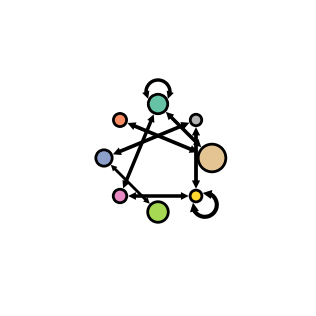

In [106]:
fig, axs = make_network_plots_polygon(m=m, # Number of monomers
                                        n_input=1, # Number of inputs
                                        param_sets=param_sets, # Parameter sets to draw from
                                        univs_to_plot=np.array([0]), # Indicies of param_sets to plot
                                        dimers_of_interest=np.array([[dimer_of_interest]]), # Index of output dimer
                                        input_node_values=np.array([0]), # Abundances to use for input node(s), log scale
                                        ncols = 1, # Number of columns in figure
                                        r_node = 0.225*0.6, # Radius of nodes around center
                                        r_loop = 0.05*0.6, # Radius of loops around nodes 
                                        node_scales = [-3,3,2,6], # Scales for node sizes (lower and upper bounds in log scale, min and max sizes)
                                        K_edge_scales = [-4,3,0.5,0.8], # Scales for edge widths (lower and upper bounds in log scale, min and max widths)
                                        input_cmap='Set2', # Colormap for nodes
                                        fontname='Helvetica', # Font name
                                        fontsize=9, # Font size
                                        non_output_dimer_color='k',
                                        labels=False,
                                        upscale_arrowhead=1.1,
                                        node_edge_width=0.5,
)

fig.set_dpi(400)

if save:
    filename = f'Fig4D_{name}'
    plt.savefig(str(pathlib.Path(out_dir,filename+'.pdf')),bbox_inches='tight',pad_inches=0,transparent=True)
    fig.patch.set_facecolor('white')
    plt.savefig(str(pathlib.Path(out_dir,filename+'.png')),dpi=900,bbox_inches='tight',pad_inches=0)

#### Dense m=8 Network

In [107]:
m = 8
name = '8M_dense'

rng = np.random.default_rng()

# Affinities
num_dimers = int(num_combos_with_replacement(m,2))
dimer_names = make_nXn_species_names(m)[m::]
# homodimer_ids = [i for i, dimer_name in enumerate(dimer_names) if dimer_name.split('_')[1]==dimer_name.split('_')[2]]
# heterodimer_ids = [i for i, dimer_name in enumerate(dimer_names) if dimer_name.split('_')[1]!=dimer_name.split('_')[2]]
# K = 10**rng.uniform(-4,0,size=num_dimers)
# K[rng.choice(homodimer_ids,size=m-6,replace=False)] = 1e-10

K = np.array([4.93544885e-03, 4.40699962e-01, 6.33636947e-04, 1.19269786e-04,
       1.88337340e-03, 2.73852465e-02, 1.03160450e-02, 1.79349794e-04,
       1.20642486e-03, 2.30426067e-02, 7.79896020e-02, 6.15586177e-03,
       7.16475909e-04, 1.31996958e-01, 2.02752478e-03, 1.43232892e-04,
       5.43896430e-03, 4.42422532e-02, 1.04951871e-01, 2.42451895e-03,
       2.35722215e-01, 2.22450236e-01, 7.65967511e-04, 1.94854976e-01,
       4.46923919e-01, 2.68758780e-02, 7.88771803e-02, 1.00323951e-02,
       7.97356018e-03, 8.80530421e-04, 1.00000000e-10, 9.46728951e-01,
       4.03972354e-04, 4.10489366e-03, 2.88713116e-01, 1e-10])

In [108]:
# Accessory expression levels
# A = 10**rng.uniform(-3,3,size=(m-1,))
A = np.array([1.63940710e-01, 4.75864807e-02, 1.33225641e+01, 1.03651378e-1,
       1.25868222e+00, 1.67212560e+00, 4.04323452e-03])

param_sets = np.expand_dims(np.hstack((K,A)),axis=0)

dimer_of_interest1 = make_nXn_species_names(m).index('D_1_1') - m # Index of dimer to use as output (D_1_1 = index 0)

In [109]:
save = True

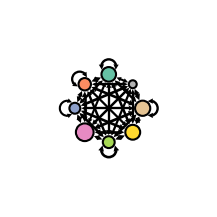

In [110]:
fig, axs = make_network_plots_polygon(m=m, # Number of monomers
                                        n_input=1, # Number of inputs
                                        param_sets=param_sets, # Parameter sets to draw from
                                        univs_to_plot=np.array([0]), # Indicies of param_sets to plot
                                        dimers_of_interest=np.array([[dimer_of_interest]]), # Index of output dimer
                                        input_node_values=np.array([0]), # Abundances to use for input node(s), log scale
                                        ncols = 1, # Number of columns in figure
                                        r_node = 0.225*0.5, # Radius of nodes around center
                                        r_loop = 0.05*0.5, # Radius of loops around nodes 
                                        node_scales = [-3,3,2,6], # Scales for node sizes (lower and upper bounds in log scale, min and max sizes)
                                        K_edge_scales = [-4,3,0.5,0.8], # Scales for edge widths (lower and upper bounds in log scale, min and max widths)
                                        input_cmap='Set2', # Colormap for nodes
                                        fontname='Helvetica', # Font name
                                        fontsize=9, # Font size
                                        non_output_dimer_color='k',
                                        labels=False,
                                        upscale_arrowhead=1.1,
                                        node_edge_width=0.5,
)

fig.set_dpi(400)

if save:
    filename = f'Fig4D_{name}'
    plt.savefig(str(pathlib.Path(out_dir,filename+'.pdf')),bbox_inches='tight',pad_inches=0,transparent=True)
    fig.patch.set_facecolor('white')
    plt.savefig(str(pathlib.Path(out_dir,filename+'.png')),dpi=900,bbox_inches='tight',pad_inches=0)

### Discretization

Panel of Figure 4A showing two functions and how they are discretized

In [7]:
m_list = list(range(2,13))

m = 12
m_i = m_list.index(m)

Run the following if you have access to the full dataset:

In [8]:
# Load, if necessary
S_all_filenames_by_m = np.load(str(pathlib.Path(load_dir,'param_screen_1D','S_all_filenames_by_m.npy')),allow_pickle=True)
all_curves_per_Sall_chunk_by_m = np.load(str(pathlib.Path(load_dir,'param_screen_1D','all_curves_per_Sall_chunk_by_m.npy')),allow_pickle=True)
unfiltered_curves_per_Sall_chunk_by_m = np.load(str(pathlib.Path(load_dir,'param_screen_1D','unfiltered_curves_per_Sall_chunk_by_m.npy')),allow_pickle=True)
nonzero_curves_per_Sall_chunk_by_m = np.load(str(pathlib.Path(load_dir,'param_screen_1D','nonzero_curves_per_Sall_chunk_by_m.npy')),allow_pickle=True)
filtered_curves_per_Sall_chunk_by_m = np.load(str(pathlib.Path(load_dir,'param_screen_1D','filtered_curves_per_Sall_chunk_by_m.npy')),allow_pickle=True)

In [10]:
input_lb = -3 # Lower bound of input space in log scale
input_ub = 3 # Upper bound of input space in log scale
t = 30 # Number of input points
t_voxels = 6 # Number of input points to use for voxel calculation (e.g., 5 input points grouped in each voxel)
points_to_average = int(t//t_voxels) # Number of input points to average over in each voxel

In [11]:
# Define voxels
num_regions_per_inputpoint = 6

boundaries = np.logspace(input_lb,input_ub,num_regions_per_inputpoint+1,endpoint=True)[1:-1]

In [12]:
S_all_filenames = S_all_filenames_by_m[m_i]
num_S_all_chunks = len(S_all_filenames)

S_all_chunk = 0
# Load:
S_all_processed_filtered = np.load(str(pathlib.Path(load_dir,'param_screen_1D',f'{m}M',f'S_all_processed_filtered_{S_all_chunk}.npy')),allow_pickle=True)
unique_voxels = np.load(str(pathlib.Path(load_dir,'param_screen_analysis_1D',f'{m}M_unique_voxels.npy')),allow_pickle=True)
curves_by_voxel = np.load(str(pathlib.Path(load_dir,'param_screen_analysis_1D',f'{m}M_curves_by_voxel.npy')),allow_pickle=True)
voxel_averages = np.load(str(pathlib.Path(load_dir,'param_screen_analysis_1D',f'{m}M_voxel_averages.npy')),allow_pickle=True)

In [13]:
voxel1_to_plot = 52
voxel2_to_plot = 116

curves_to_plot1 = np.array([697005, 7915151])
curves_to_plot2 = np.array([192198, 7424845])

In [14]:
# Retrieve curves from the two unique functions

clustered_responses1 = np.empty((0,t))

# Iterate over chunks of S_all (the responses), which were saved across several files
for S_all_chunk in range(num_S_all_chunks):
    S_all_processed_filtered = np.load(str(pathlib.Path(load_dir,'param_screen_1D',f'{m}M',f'S_all_processed_filtered_{S_all_chunk}.npy')),allow_pickle=True)
    curves_by_voxel_this_chunk = curves_to_plot1[np.where((curves_to_plot1>=np.sum(filtered_curves_per_Sall_chunk_by_m[m_i][:S_all_chunk]))\
                             & (curves_to_plot1<np.sum(filtered_curves_per_Sall_chunk_by_m[m_i][:S_all_chunk+1])))] # Filtered IDs in this chunk
    curves_by_voxel_this_chunk = (curves_by_voxel_this_chunk-np.sum(filtered_curves_per_Sall_chunk_by_m[m_i][:S_all_chunk])).astype(np.int64)  # Filtered IDs in this chunk, starting at 0 in chunk
    clustered_responses_temp = S_all_processed_filtered[curves_by_voxel_this_chunk,:]
    if clustered_responses_temp.shape[0]==0:
        continue
    clustered_responses1 = np.append(clustered_responses1,clustered_responses_temp,axis=0)

In [15]:
clustered_responses2 = np.empty((0,t))

# Iterate over chunks of S_all (the responses), which were saved across several files
for S_all_chunk in range(num_S_all_chunks):
    S_all_processed_filtered = np.load(str(pathlib.Path(load_dir,'param_screen_1D',f'{m}M',f'S_all_processed_filtered_{S_all_chunk}.npy')),allow_pickle=True)
    curves_by_voxel_this_chunk = curves_to_plot2[np.where((curves_to_plot2>=np.sum(filtered_curves_per_Sall_chunk_by_m[m_i][:S_all_chunk]))\
                             & (curves_to_plot2<np.sum(filtered_curves_per_Sall_chunk_by_m[m_i][:S_all_chunk+1])))] # Filtered IDs in this chunk
    curves_by_voxel_this_chunk = (curves_by_voxel_this_chunk-np.sum(filtered_curves_per_Sall_chunk_by_m[m_i][:S_all_chunk])).astype(np.int64)  # Filtered IDs in this chunk, starting at 0 in chunk
    clustered_responses_temp = S_all_processed_filtered[curves_by_voxel_this_chunk,:]
    if clustered_responses_temp.shape[0]==0:
        continue
    clustered_responses2 = np.append(clustered_responses2,clustered_responses_temp,axis=0)

In [16]:
# Calculate which bins each function "hits"
voxel1_bins = unique_voxels[voxel1_to_plot].astype(np.int64)
voxel2_bins = unique_voxels[voxel2_to_plot].astype(np.int64)

Or run the code below to use the values directly

In [19]:
voxel1_bins = np.array([0, 0, 0, 2, 0, 0])
voxel2_bins = np.array([0, 0, 1, 3, 3, 3])

In [24]:
clustered_responses1 = np.array([[0.001     , 0.001     , 0.001     , 0.001     , 0.001     ,
        0.001     , 0.001     , 0.001     , 0.001     , 0.001     ,
        0.001     , 0.001     , 0.001     , 0.001     , 0.04310249,
        0.1562923 , 0.166823  , 0.14331776, 0.10796016, 0.06979905,
        0.03834146, 0.01855415, 0.00844872, 0.00382494, 0.00177508,
        0.001     , 0.001     , 0.001     , 0.001     , 0.001     ],
       [0.00142179, 0.0014227 , 0.00142418, 0.00142661, 0.00143062,
        0.00143737, 0.00144901, 0.00146997, 0.0015103 , 0.00159642,
        0.00181059, 0.00247657, 0.00541493, 0.0177536 , 0.05147143,
        0.12981982, 0.20893806, 0.1872339 , 0.11715888, 0.06539208,
        0.03491006, 0.01721072, 0.00676398, 0.001     , 0.001     ,
        0.001     , 0.001     , 0.001     , 0.001     , 0.001     ]])

In [25]:
clustered_responses2 = np.array([[1.00000000e-03, 1.00000000e-03, 1.00000000e-03, 1.00000000e-03,
    1.00000000e-03, 1.00000000e-03, 1.00000000e-03, 1.00000000e-03,
    1.00000000e-03, 1.00000000e-03, 1.00000000e-03, 1.80961491e-03,
    1.73891888e-02, 1.87735961e-01, 4.82827694e-01, 9.57893132e-01,
    1.71581045e+00, 2.58971488e+00, 2.63613151e+00, 2.64132946e+00,
    2.64314848e+00, 2.64399982e+00, 2.64445202e+00, 2.64470843e+00,
    2.64485925e+00, 2.64494988e+00, 2.64500505e+00, 2.64503890e+00,
    2.64505979e+00, 2.64507274e+00],
    [1.00000000e-03, 1.00000000e-03, 1.00000000e-03, 1.00000000e-03,
    1.00000000e-03, 1.00000000e-03, 1.00000000e-03, 1.00000000e-03,
    1.00000000e-03, 1.00000000e-03, 2.82346567e-03, 4.59657674e-02,
    1.18755153e-01, 2.29561430e-01, 3.92847780e-01, 6.22818435e-01,
    9.26782677e-01, 1.29640017e+00, 1.70424137e+00, 2.11346628e+00,
    2.49410526e+00, 2.83080805e+00, 3.11995512e+00, 3.36402341e+00,
    3.56778311e+00, 3.73650086e+00, 3.87524025e+00, 3.98862466e+00,
    4.08077072e+00, 4.15528230e+00]])

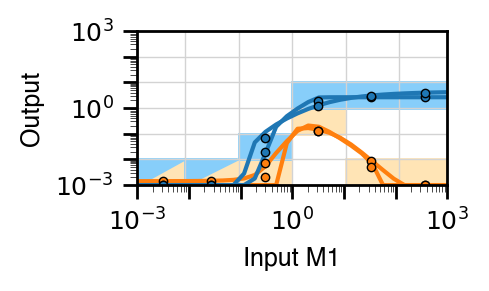

In [26]:
save = False

fig,ax = plt.subplots(figsize=(2,1))

x_points = np.logspace(input_lb,input_ub,t,endpoint=True)

cmap = plt.get_cmap('tab10')
bgcolors = ['moccasin','lightskyblue']
colors = [cmap(1),cmap(0)]

input_log_width = (input_ub-input_lb)/t
voxel_log_width = (input_ub-input_lb)/t_voxels
output_bin_log_width = (input_ub-input_lb)/num_regions_per_inputpoint
x_anchors = 10**np.array([input_lb]+list((np.linspace(input_lb,input_ub+input_log_width,t_voxels+1,endpoint=True)-(input_log_width/2))[1:]))
y_anchors = [input_lb]+list(np.log10(boundaries))
y_anchors = 10**np.array(y_anchors)


# Plot bin boundaries
ax.vlines(x=x_anchors,ymin=1e-3,ymax=1e3,ls='-',lw=0.5,colors=['lightgray'])
ax.hlines(y=boundaries,xmin=1e-3,xmax=1e3,ls='-',lw=0.5,colors=['lightgray'])

# Plot bins hit in voxel
for i,voxel_bins in enumerate([voxel1_bins,voxel2_bins]):
    for voxel_id in range(t_voxels):
        x_anchor = x_anchors[voxel_id]
        x_anchor_log = np.log10(x_anchor)
        y_anchor = y_anchors[voxel_bins[voxel_id]]
        y_anchor_log = np.log10(y_anchor)
        if voxel_id==0 or voxel_id==t-1:
            # If first or last input point, only plot half the width
            width=10**(x_anchor_log+(voxel_log_width/2))-x_anchor
            log_width = voxel_log_width*(((t//t_voxels)-0.5)/(t//t_voxels))
        else:
            width=10**(x_anchor_log+voxel_log_width)-x_anchor
            log_width = voxel_log_width
        if voxel1_bins[voxel_id]==voxel2_bins[voxel_id]:
            # If both functions hit the same voxel
            if i==0:
                # If first function, plot the top triangle of the bin
                ax.add_patch(mpatches.Polygon(xy=np.array([[x_anchor,y_anchor],\
                                                          [10**(x_anchor_log+log_width),y_anchor],\
                                                          [10**(x_anchor_log+log_width),10**(y_anchor_log+output_bin_log_width)]]),color=bgcolors[i]))
            else:
                # If second function, plot the bottom triangle of the bin
                ax.add_patch(mpatches.Polygon(xy=np.array([[x_anchor,y_anchor],\
                                                          [x_anchor,10**(y_anchor_log+output_bin_log_width)],\
                                                          [10**(x_anchor_log+log_width),10**(y_anchor_log+output_bin_log_width)]]),color=bgcolors[i]))
                
        else:
            ax.add_patch(mpatches.Rectangle(xy=(x_anchor,y_anchor),\
                                            width=width,\
                                            height=10**(y_anchor_log+output_bin_log_width)-y_anchor,\
                                           color=bgcolors[i],alpha=1))

# Plot curves directly
ax.plot(x_points, np.array(clustered_responses1).T,marker='',ls='-',lw=1.5,color=colors[0],alpha=1)
ax.plot(x_points, np.array(clustered_responses2).T,marker='',ls='-',lw=1.5,color=colors[1],alpha=1)
for input1 in range(t_voxels):
    for curve in range(clustered_responses1.shape[0]):
        ax.plot(10**(np.log10(x_anchors[input1])+(voxel_log_width/2)),\
                10**np.mean(np.log10(clustered_responses1[curve][(input1*points_to_average):(input1*points_to_average)+points_to_average]),axis=0),\
               marker='.',ls='',markersize=6,color=colors[0],markeredgewidth=0.5,markeredgecolor='black')
    for curve in range(clustered_responses2.shape[0]):
        ax.plot(10**(np.log10(x_anchors[input1])+(voxel_log_width/2)),\
                10**np.mean(np.log10(clustered_responses2[curve][(input1*points_to_average):(input1*points_to_average)+points_to_average]),axis=0),\
               marker='.',ls='',markersize=6,color=colors[1],markeredgewidth=0.5,markeredgecolor='black')

ax.set_xscale('log')
ax.set_yscale('log')

_ = ax.set_xlim([1e-3,1e3])
_ = ax.set_ylim([1e-3,1e3])

ax.xaxis.set_minor_locator(mticker.LogLocator(numticks=999, subs="auto"))
ax.yaxis.set_minor_locator(mticker.LogLocator(numticks=999, subs="auto"))

# Set ticks
set_simple_log_ticks(ax,which='both',log_lowerbound=-3,log_upperbound=3,max_labels=4)

# Customize spines
set_spine_linewidth(ax,1)

# Customize the major ticks
ax.tick_params(axis='both', which='major', length=5, width=1)  # Length and linewidth of major ticks

# Customize the minor ticks
ax.tick_params(axis='both', which='minor', length=2.5, width=0.25)   # Length and linewidth of minor ticks

_ = ax.set_xlabel('Input M1')
_ = ax.set_ylabel('Output')

fig.set_dpi(200)

if save:
    filename = f'Fig4A_example_voxel'
    plt.savefig(str(pathlib.Path(out_dir,filename+'.pdf')),transparent=True,bbox_inches='tight',pad_inches=0)
    fig.patch.set_facecolor('white')
    plt.savefig(str(pathlib.Path(out_dir,filename+'.png')),dpi=900,bbox_inches='tight',pad_inches=0)

## Figure 4B

Panel of Figure 4 showing the overall expressivity of one-input and two-input networks across network sizes (based on the parameter screen) 

In [7]:
m_list = list(range(2,13))

For one input:

In [32]:
num_unique_voxels_by_m = np.load(str(pathlib.Path(load_dir,'param_screen_analysis_1D',f'num_unique_voxels_by_m.npy')),allow_pickle=True)

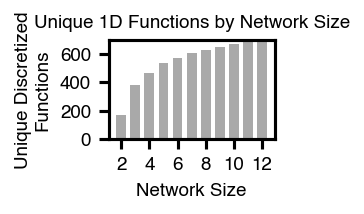

In [45]:
save = True

fig, ax = plt.subplots(figsize=(2,1))

ax.bar(m_list,num_unique_voxels_by_m,width=0.7,color='darkgray')

_ = ax.set_xlabel('Network Size')
_ = ax.set_ylabel('Unique Discretized\nFunctions')
_ = ax.set_title('Unique 1D Functions by Network Size')
_ = ax.set_xticks(np.array(m_list)[::2])
_ = ax.set_xticklabels(np.array(m_list)[::2].astype(str))

_ = ax.set_ylim([0,700])
_ = ax.set_yticks(np.linspace(0,600,4))

# Customize spines
set_spine_linewidth(ax,1)

# Customize the major ticks
ax.tick_params(axis='both', which='major', length=5, width=1)  # Length and linewidth of major ticks

# Customize the minor ticks
ax.tick_params(axis='both', which='minor', length=2.5, width=0.25)   # Length and linewidth of minor ticks

plt.tight_layout()

if save:
    filename = f'Fig4B_num_unique_voxels_by_network_size_1D'
    plt.savefig(str(pathlib.Path(out_dir,filename+'.pdf')),transparent=True,bbox_inches='tight')
    fig.patch.set_facecolor('white')
    plt.savefig(str(pathlib.Path(out_dir,filename+'.png')),dpi=900,bbox_inches='tight')

For two inputs:

In [46]:
num_unique_voxels_by_m = np.load(str(pathlib.Path(load_dir,'param_screen_analysis_2D',f'num_unique_voxels_by_m.npy')),allow_pickle=True)

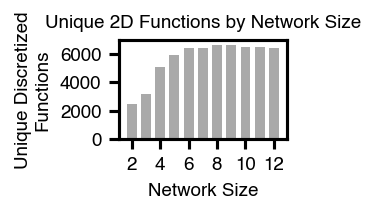

In [51]:
save = True

fig, ax = plt.subplots(figsize=(2.08,1))

ax.bar(m_list,num_unique_voxels_by_m,width=0.7,color='darkgray')

_ = ax.set_xlabel('Network Size')
_ = ax.set_ylabel('Unique Discretized\nFunctions')
_ = ax.set_title('Unique 2D Functions by Network Size')
_ = ax.set_xticks(np.array(m_list)[::2])
_ = ax.set_xticklabels(np.array(m_list)[::2].astype(str))

_ = ax.set_ylim([0,7000])
_ = ax.set_yticks(np.linspace(0,6000,4))

# Customize spines
set_spine_linewidth(ax,1)

# Customize the major ticks
ax.tick_params(axis='both', which='major', length=5, width=1)  # Length and linewidth of major ticks

# Customize the minor ticks
ax.tick_params(axis='both', which='minor', length=2.5, width=0.25)   # Length and linewidth of minor ticks

plt.tight_layout()

if save:
    filename = f'Fig4B_num_unique_voxels_by_network_size_2D'
    plt.savefig(str(pathlib.Path(out_dir,filename+'.pdf')),transparent=True,bbox_inches='tight')
    fig.patch.set_facecolor('white')
    plt.savefig(str(pathlib.Path(out_dir,filename+'.png')),dpi=900,bbox_inches='tight')

## Figure 4C

See `simulate_individual_networks` and Figure S11 (function atlas) for simulations of each function.

### Plot generic schematics

In [115]:
m = 3
num_inputs = 1
param_sets = np.full((1,num_combos_with_replacement(m,2)+(m-num_inputs)),1)
dimer_of_interest = 0
input_node_values=np.array([0])
r_node = 0.15
K_edge_scales = [-4,3,0.5,1.5]

In [144]:
m = 4
num_inputs = 2
param_sets = np.full((1,num_combos_with_replacement(m,2)+(m-num_inputs)),1)
dimer_of_interest = 0
input_node_values=np.array([0,0])
r_node = 0.2
K_edge_scales = [-4,3,0.5,1.5]

In [135]:
m = 5
num_inputs = 2
param_sets = np.full((1,num_combos_with_replacement(m,2)+(m-num_inputs)),1)
dimer_of_interest = 0
input_node_values=np.array([0,0])
r_node = 0.225
K_edge_scales = [-4,3,0.5,1.5]

In [98]:
m = 6
num_inputs = 2
param_sets = np.full((1,num_combos_with_replacement(m,2)+(m-num_inputs)),1)
dimer_of_interest = 0
input_node_values=np.array([0,0])
r_node = 0.225
K_edge_scales = [-4,3,0.5,1.5]

In [99]:
save = True

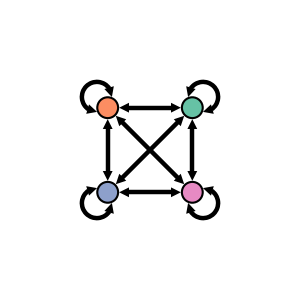

In [145]:
fig, axs = make_network_plots_polygon(m=m, # Number of monomers
                                        n_input=num_inputs, # Number of inputs
                                        param_sets=param_sets, # Parameter sets to draw from
                                        univs_to_plot=np.array([0]), # Indicies of param_sets to plot
                                        dimers_of_interest=np.array([[dimer_of_interest]]), # Index of output dimer
                                        input_node_values=input_node_values, # Abundances to use for input node(s), log scale
                                        ncols = 1, # Number of columns in figure
                                        r_node = r_node, # Radius of nodes around center
                                        r_loop = 0.05, # Radius of loops around nodes 
                                        node_scales = [-3,3,4,7], # Scales for node sizes (lower and upper bounds in log scale, min and max sizes)
                                        K_edge_scales = K_edge_scales, # Scales for edge widths (lower and upper bounds in log scale, min and max widths)
                                        input_cmap='Set2', # Colormap for nodes
                                        fontname='Helvetica', # Font name
                                        fontsize=9, # Font size
                                        non_output_dimer_color='k',
                                        labels=False,
                                        upscale_arrowhead=1.1,
                                        node_edge_width=0.5,
)

fig.set_dpi(300)

if save:
    filename = f'Fig4C_{m}M_generic_schematic'
    plt.savefig(str(pathlib.Path(out_dir,filename+'.pdf')),pad_inches=0,bbox_inches='tight',transparent=True)
    fig.patch.set_facecolor('white')
    plt.savefig(str(pathlib.Path(out_dir,filename+'.png')),dpi=900,pad_inches=0,bbox_inches='tight')

## Figure 4D

Expressivity for one-input and two-input networks across network connectivity (based on parameter screen)

### One-input functions

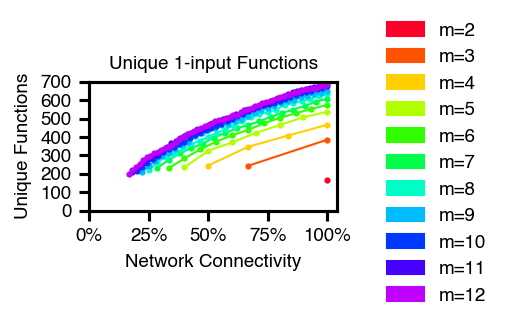

In [17]:
save = True

fig, ax = plt.subplots(figsize=(2.5,1.7))
cmap = plt.get_cmap('gist_rainbow')

m_list = list(range(2,13))

for m_i,m in enumerate(m_list):
    hetero_edges_list = np.load(str(pathlib.Path(load_dir,'param_screen_analysis_1D',f'{m}M_hetero_edges_list.npy')),allow_pickle=True)
    num_unique_voxels_by_hetero_edges = np.load(str(pathlib.Path(load_dir,'param_screen_analysis_1D',f'{m}M_num_cumulative_unique_voxels_by_hetero_edges.npy')),allow_pickle=True)
    max_hetero_edges = num_combos(m,r=2)
    min_hetero_edges = m-1
    graph_density = [x/(max_hetero_edges) for x in list(range(min_hetero_edges,max_hetero_edges+1))]
    ax.plot(graph_density,num_unique_voxels_by_hetero_edges,\
            marker='.',linestyle='-',markersize=6,linewidth=1,markeredgewidth=0,color=cmap((m_i/(len(m_list)))),alpha=1)

_ = ax.set_xlabel('Network Connectivity')
_ = ax.set_ylabel('Unique Functions')
_ = ax.set_title(f'Unique 1-input Functions')

ymax = 100*math.ceil(max(list(itertools.chain.from_iterable(num_unique_voxels_by_hetero_edges)))/100)
_ = ax.set_ylim([0,ymax])

_ = ax.set_yticks(np.arange(0,ymax+100,100))

# Customize spines
set_spine_linewidth(ax,1)

# Customize the major ticks
ax.tick_params(axis='both', which='major', length=5, width=1)  # Length and linewidth of major ticks

_ = ax.set_xticks(np.linspace(0,1,5,endpoint=True))
_ = ax.set_xticklabels([f'{x:.0%}' for x in np.linspace(0,1,5,endpoint=True)])


patches={}
for m_i,m in enumerate(m_list):
    patches[f'm={m}'] = mpatches.Patch(color=cmap(m_i/(len(m_list))),label=f'm={m}')

leg = fig.legend(bbox_to_anchor=(1, 0.5), loc='center left',facecolor='none',\
    handles=list(patches.values()),\
    edgecolor='none')

plt.tight_layout()

if save:
    filename = f'Fig4D_num_unique_voxels_by_fraction_hetero_edges_1D'
    plt.savefig(str(pathlib.Path(out_dir,filename+'.pdf')),transparent=True,bbox_inches='tight')
    fig.patch.set_facecolor('white')
    plt.savefig(str(pathlib.Path(out_dir,filename+'.png')),dpi=900,bbox_inches='tight')

### Two-input functions

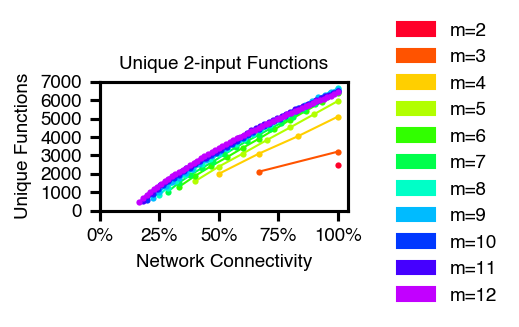

In [16]:
save = True

fig, ax = plt.subplots(figsize=(2.57,1.7))
cmap = plt.get_cmap('gist_rainbow')

m_list = list(range(2,13))

for m_i,m in enumerate(m_list):
    hetero_edges_list = np.load(str(pathlib.Path(load_dir,'param_screen_analysis_2D',f'{m}M_hetero_edges_list.npy')),allow_pickle=True)
    num_unique_voxels_by_hetero_edges = np.load(str(pathlib.Path(load_dir,'param_screen_analysis_2D',f'{m}M_num_cumulative_unique_voxels_by_hetero_edges.npy')),allow_pickle=True)
    max_hetero_edges = num_combos(m,r=2)
    min_hetero_edges = m-1
    graph_density = [x/(max_hetero_edges) for x in list(range(min_hetero_edges,max_hetero_edges+1))]
    ax.plot(graph_density,num_unique_voxels_by_hetero_edges,\
            marker='.',linestyle='-',markersize=6,linewidth=1,markeredgewidth=0,color=cmap(m_i/(len(m_list))),alpha=1)

_ = ax.set_xlabel('Network Connectivity')
_ = ax.set_ylabel('Unique Functions')
_ = ax.set_title(f'Unique 2-input Functions')

round_to = 1000
ymax = round_to*math.ceil(max(list(itertools.chain.from_iterable(num_unique_voxels_by_hetero_edges)))/round_to)
_ = ax.set_ylim([0,ymax])

_ = ax.set_yticks(np.arange(0,ymax+round_to,round_to))

# Customize spines
set_spine_linewidth(ax,1)

# Customize the major ticks
ax.tick_params(axis='both', which='major', length=5, width=1)  # Length and linewidth of major ticks

_ = ax.set_xticks(np.linspace(0,1,5,endpoint=True))
_ = ax.set_xticklabels([f'{x:.0%}' for x in np.linspace(0,1,5,endpoint=True)])

_ = ax.set_xticks(np.linspace(0,1,5,endpoint=True))
_ = ax.set_xticklabels([f'{x:.0%}' for x in np.linspace(0,1,5,endpoint=True)])

patches={}
for m_i,m in enumerate(m_list):
    patches[f'm={m}'] = mpatches.Patch(color=cmap(m_i/(len(m_list))),label=f'm={m}')

leg = fig.legend(bbox_to_anchor=(1, 0.5), loc='center left',facecolor='none',\
    handles=list(patches.values()),\
    edgecolor='none')

plt.tight_layout()

if save:
    filename = f'Fig4D_num_unique_voxels_by_hetero_edges_2D'
    plt.savefig(str(pathlib.Path(out_dir,filename+'.pdf')),transparent=True,bbox_inches='tight')
    fig.patch.set_facecolor('white')
    plt.savefig(str(pathlib.Path(out_dir,filename+'.png')),dpi=900,bbox_inches='tight')

## Figure S3A: Local Extrema by Network Size

In [15]:
m_list = list(range(2,13))
number_local_extrema_by_network_size = np.load(str(pathlib.Path(load_dir,'param_screen_analysis_1D',f'number_local_extrema_by_network_size.npy')),allow_pickle=True)
local_max_positions_by_numextrema_by_m = np.load(str(pathlib.Path(load_dir,'param_screen_analysis_1D',f'local_max_positions_by_numextrema_by_m.npy')),allow_pickle=True)
local_min_positions_by_numextrema_by_m = np.load(str(pathlib.Path(load_dir,'param_screen_analysis_1D',f'local_min_positions_by_numextrema_by_m.npy')),allow_pickle=True)

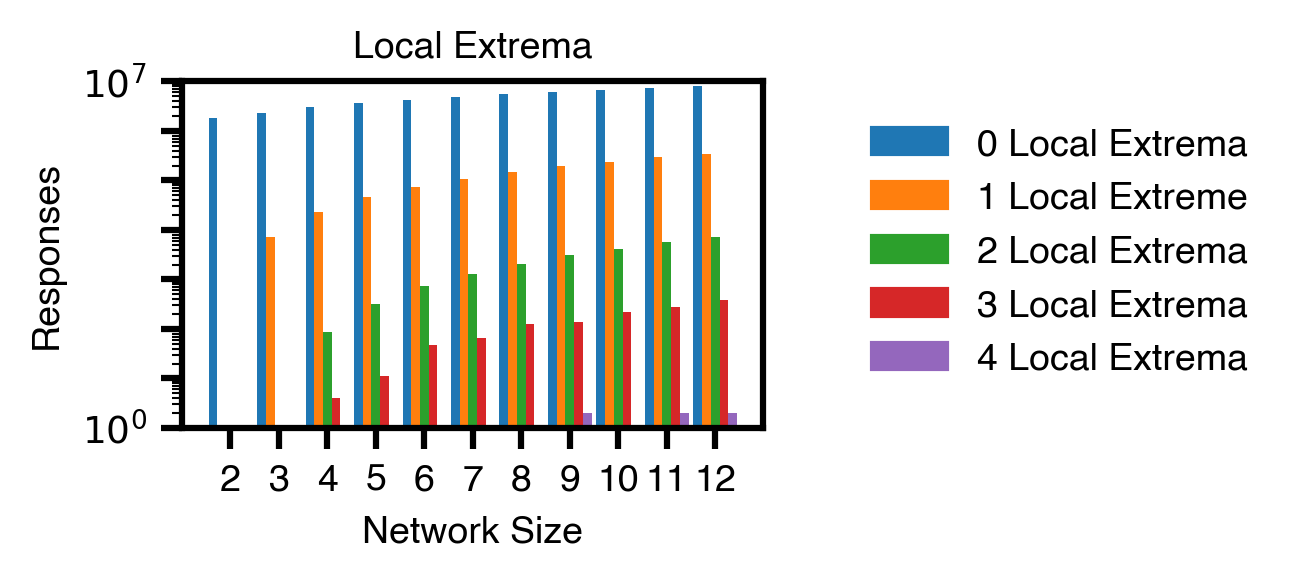

In [19]:
save = False

fig, ax = plt.subplots(figsize=(2.5,1))
rng = np.random.default_rng(seed=42)
cmap = plt.get_cmap('tab10')

num_curves_with_max_extrema_by_m = [0 for x in m_list]
max_num_extrema = int(max([np.max(number_local_extrema_by_network_size[m_i]) for m_i in range(len(m_list))]))
width_per_bar = 0.9/(max_num_extrema+1)
middle_bar = np.median(list(range(max_num_extrema+1)))

for m_i, m in enumerate(m_list):
    number_local_extrema = number_local_extrema_by_network_size[m_i]
    num_curves_with_max_extrema_by_m[m_i] = [np.where(number_local_extrema==num_extrema)[0].shape[0] \
                                   for num_extrema in range(max_num_extrema+1)]

for num_extrema in range(max_num_extrema+1):
    offset = (num_extrema-middle_bar)*width_per_bar
    ax.bar(np.array(m_list)+offset, [num_curves_with_max_extrema_by_m[m_i][num_extrema] for m_i in range(len(m_list))], \
               width=width_per_bar,color=cmap(num_extrema),log=True)

_ = ax.set_xlabel('Network Size')
_ = ax.set_ylabel('Responses')
_ = ax.set_title(f'Local Extrema')
_ = ax.set_xticks(m_list)
_ = ax.set_xticklabels([str(m) for m in m_list])
_ = ax.yaxis.set_minor_locator(mticker.LogLocator(numticks=999, subs="auto"))

# Set ticks
ax.set_ylim([1,1e7])
set_simple_log_ticks(ax,which='y',log_lowerbound=0,log_upperbound=7,max_labels=4)

# Customize spines
set_spine_linewidth(ax,1)

# Customize the major ticks
ax.tick_params(axis='both', which='major', length=5, width=1)  # Length and linewidth of major ticks

# Customize the minor ticks
ax.tick_params(axis='both', which='minor', length=2.5, width=0.25)   # Length and linewidth of minor ticks

patches={}
for num_extrema in range(max_num_extrema+1):
    if num_extrema==1:
        noun = 'Extreme'
    else:
        noun = 'Extrema'
    patches[f'{num_extrema}'] = \
        mpatches.Patch(color=cmap(num_extrema),label=f'{num_extrema} Local {noun}')

leg = fig.legend(bbox_to_anchor=(1, 0.5), loc='center left',facecolor='none',\
    handles=list(patches.values()),\
    edgecolor='none')

fig.set_dpi(300)

if save:
    filename = f'Fig4Unpublished_num_extrema_by_network_size'
    plt.savefig(str(pathlib.Path(out_dir,filename+'.pdf')),transparent=True,bbox_inches='tight')
    fig.patch.set_facecolor('white')
    plt.savefig(str(pathlib.Path(out_dir,filename+'.png')),dpi=900,bbox_inches='tight')

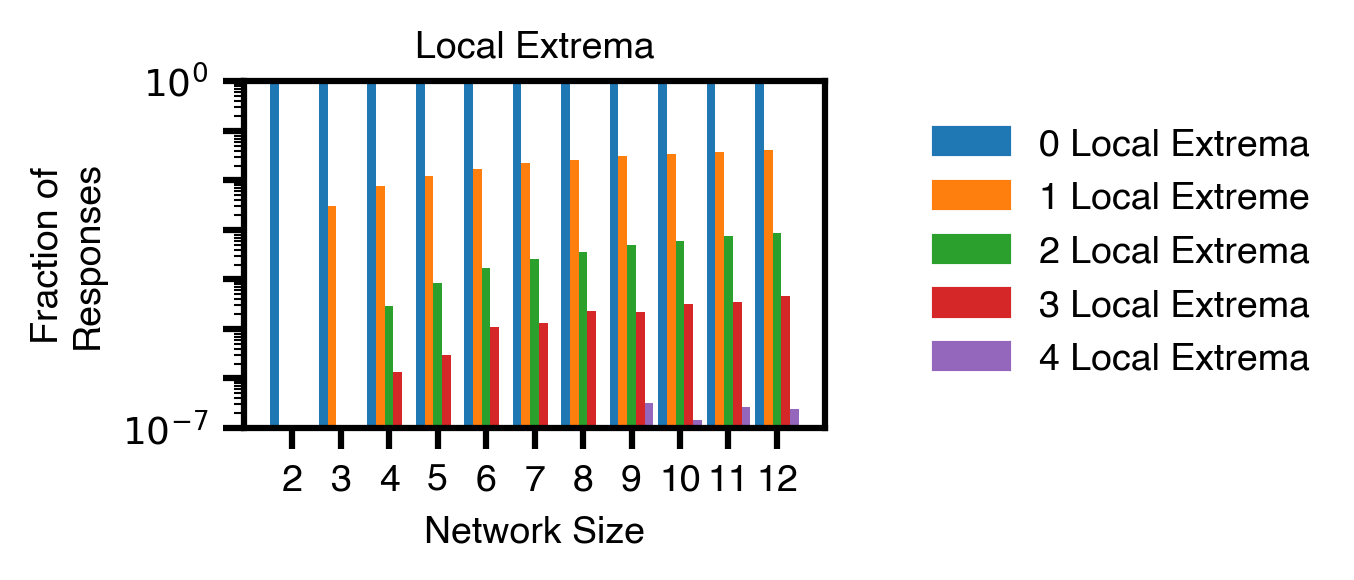

In [17]:
save = True

fig, ax = plt.subplots(figsize=(2.5,1))
rng = np.random.default_rng(seed=42)
cmap = plt.get_cmap('tab10')

fraction_curves_with_max_extrema_by_m = [0 for x in m_list]
max_num_extrema = int(max([np.max(number_local_extrema_by_network_size[m_i]) for m_i in range(len(m_list))]))
width_per_bar = 0.9/(max_num_extrema+1)
middle_bar = np.median(list(range(max_num_extrema+1)))

for m_i, m in enumerate(m_list):
    curves_by_voxel = np.load(str(pathlib.Path(load_dir,'param_screen_analysis_1D',f'{m}M_curves_by_voxel.npy')),allow_pickle=True)
    total_num_curves = np.sum([x.shape[0] for x in curves_by_voxel])
    number_local_extrema = number_local_extrema_by_network_size[m_i]
    fraction_curves_with_max_extrema_by_m[m_i] = [np.where(number_local_extrema==num_extrema)[0].shape[0]/\
                                    total_num_curves for num_extrema in range(max_num_extrema+1)]

for num_extrema in range(max_num_extrema+1):
    offset = (num_extrema-middle_bar)*width_per_bar
    ax.bar(np.array(m_list)+offset, [fraction_curves_with_max_extrema_by_m[m_i][num_extrema] for m_i in range(len(m_list))], \
               width=width_per_bar,color=cmap(num_extrema),log=True)

_ = ax.set_xlabel('Network Size')
_ = ax.set_ylabel('Fraction of\nResponses')
_ = ax.set_title(f'Local Extrema')
_ = ax.set_xticks(m_list)
_ = ax.set_xticklabels([str(m) for m in m_list])
_ = ax.yaxis.set_minor_locator(mticker.LogLocator(numticks=999, subs="auto"))
_ = ax.set_ylim([1e-7,1e0])

# Set ticks
set_simple_log_ticks(ax,which='y',log_lowerbound=-7,log_upperbound=0,max_labels=4)

# Customize spines
set_spine_linewidth(ax,1)

# Customize the major ticks
ax.tick_params(axis='both', which='major', length=5, width=1)  # Length and linewidth of major ticks

# Customize the minor ticks
ax.tick_params(axis='both', which='minor', length=2.5, width=0.25)   # Length and linewidth of minor ticks

patches={}
for num_extrema in range(max_num_extrema+1):
    if num_extrema==1:
        noun = 'Extreme'
    else:
        noun = 'Extrema'
    patches[f'{num_extrema}'] = \
        mpatches.Patch(color=cmap(num_extrema),label=f'{num_extrema} Local {noun}')

leg = fig.legend(bbox_to_anchor=(1, 0.5), loc='center left',facecolor='none',\
    handles=list(patches.values()),\
    edgecolor='none')

fig.set_dpi(300)

if save:
    filename = f'FigS3A_num_extrema_by_network_size_norm'
    plt.savefig(str(pathlib.Path(out_dir,filename+'.pdf')),transparent=True,bbox_inches='tight')
    fig.patch.set_facecolor('white')
    plt.savefig(str(pathlib.Path(out_dir,filename+'.png')),dpi=900,bbox_inches='tight')

## Figure S3E: Propagation of Concentration Changes

In [14]:
m_list = list(range(2,13))

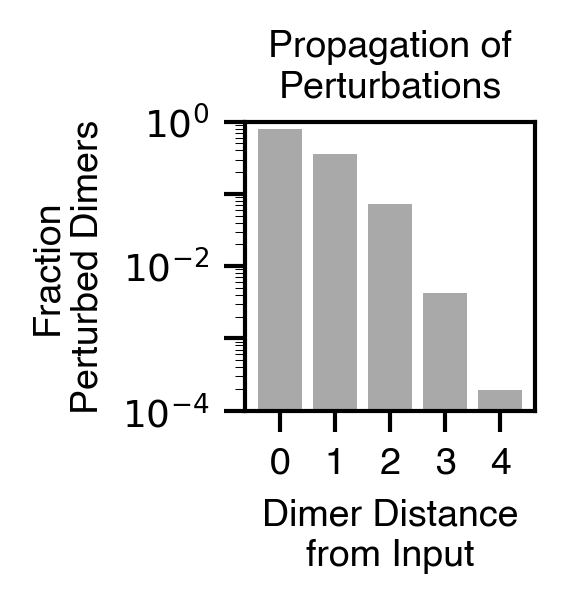

In [15]:
save = True

fig, ax = plt.subplots(figsize=(1.25,1.25))
cmap = plt.get_cmap('gist_rainbow')

dist_list = list(range(m_list[-1]))
fraction_perturbed_by_dist_from_input_allm = np.load(str(pathlib.Path(load_dir,'param_screen_analysis_1D',f'fraction_perturbed_by_dist_from_input_allm.npy')),allow_pickle=True)

# Cut off at 4
dist_list = dist_list[:5]
fraction_perturbed_by_dist_from_input_allm = fraction_perturbed_by_dist_from_input_allm[:5]

ax.bar(dist_list,fraction_perturbed_by_dist_from_input_allm,width=0.8,color='darkgray')

_ = ax.set_xlabel('Dimer Distance\nfrom Input')
_ = ax.set_ylabel('Fraction\nPerturbed Dimers')
_ = ax.set_title('Propagation of\nPerturbations')
_ = ax.set_xticks(dist_list)
_ = ax.set_xticklabels([str(dist) for dist in dist_list])

ax.set_ylim([1e-4,1])
ax.set_yscale('log')

# Set ticks
set_simple_log_ticks(ax,which='y',log_lowerbound=-4,log_upperbound=0,max_labels=4)

# Customize spines
set_spine_linewidth(ax,1)

# Customize the major ticks
ax.tick_params(axis='both', which='major', length=5, width=1)  # Length and linewidth of major ticks

# Customize the minor ticks
ax.tick_params(axis='both', which='minor', length=2.5, width=0.25)   # Length and linewidth of minor ticks

fig.set_dpi(300)

if save:
    filename = f'FigS3E_fraction_passed_filter_by_dist_from_input'
    plt.savefig(str(pathlib.Path(out_dir,filename+'.pdf')),transparent=True,bbox_inches='tight')
    fig.patch.set_facecolor('white')
    plt.savefig(str(pathlib.Path(out_dir,filename+'.png')),dpi=900,bbox_inches='tight')

## Unpublished: Locations of Local Extrema

In [45]:
number_local_extrema_by_network_size = np.load(str(pathlib.Path(load_dir,'param_screen_analysis_1D',f'number_local_extrema_by_network_size.npy')),allow_pickle=True)
local_max_positions_by_numextrema_by_m = np.load(str(pathlib.Path(load_dir,'param_screen_analysis_1D',f'local_max_positions_by_numextrema_by_m.npy')),allow_pickle=True)
local_min_positions_by_numextrema_by_m = np.load(str(pathlib.Path(load_dir,'param_screen_analysis_1D',f'local_min_positions_by_numextrema_by_m.npy')),allow_pickle=True)

In [46]:
input_lb = -3 # Lower bound of input space in log scale
input_ub = 3 # Upper bound of input space in log scale
t = 30 # Number of input points

In [58]:
all_local_extrema_positions_by_m = [[] for m_i in m_list]

x_points = np.logspace(input_lb,input_ub,t,endpoint=True)
extrema_position_bins = np.log10(x_points)-((input_ub-input_lb)/(2*t))
extrema_position_bins = np.array(list(extrema_position_bins)+[input_ub+((input_ub-input_lb)/(2*t))])
cmap = plt.get_cmap('gist_rainbow')

for num_local_extrema in range(1,4):
    for m_i, m in enumerate(m_list):
        if m_i<len(local_min_positions_by_numextrema_by_m[num_local_extrema]):
            all_local_extrema_positions_by_m[m_i].extend(local_min_positions_by_numextrema_by_m[num_local_extrema][m_i])
        if m_i<len(local_max_positions_by_numextrema_by_m[num_local_extrema]):
            all_local_extrema_positions_by_m[m_i].extend(local_max_positions_by_numextrema_by_m[num_local_extrema][m_i])

C:\Users\jacob\AppData\Local\Temp\ipykernel_21476\2028642697.py:13: RuntimeWarning: invalid value encountered in true_divide
  hist = hist / np.sum(hist)


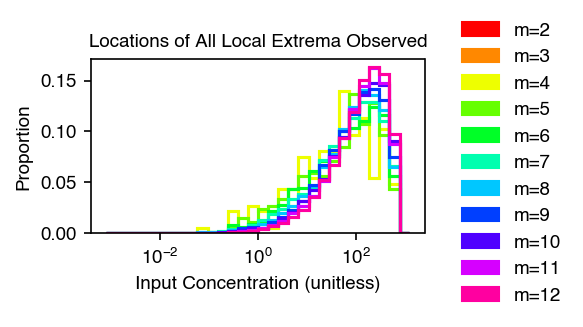

In [65]:
save = True

x_points = np.logspace(input_lb,input_ub,t,endpoint=True)
extrema_position_bins = np.log10(x_points)-((input_ub-input_lb)/(2*t))
extrema_position_bins = np.array(list(extrema_position_bins)+[input_ub+((input_ub-input_lb)/(2*t))])
cmap = plt.get_cmap('gist_rainbow')

fig, ax = plt.subplots(figsize=(3,2))
for m in m_list:
    m_i = m_list.index(m)
    hist,_ = np.histogram(np.log10(x_points[all_local_extrema_positions_by_m[m_i]]),\
                      bins =  extrema_position_bins,density=False) 
    hist = hist / np.sum(hist)
    ax.stairs(hist,10**extrema_position_bins,color=cmap(m_i/len(m_list)),linewidth=1.5,alpha=1)

_ = ax.set_xlabel('Input Concentration (unitless)')
_ = ax.set_ylabel('Proportion')
_ = ax.set_title(f'Locations of All Local Extrema Observed')
    
ax.set_xscale('log')
patches={}
for m_i,m in enumerate(m_list):
    patches[f'm={m}'] = mpatches.Patch(color=cmap(m_i/len(m_list)),label=f'm={m}')

leg = fig.legend(bbox_to_anchor=(1, 0.5), loc='center left',facecolor='none',\
    handles=list(patches.values()),\
    edgecolor='none')

if save:
    filename = f'Fig4Unpublished_all_extrema_locations'
    #
    plt.savefig(str(pathlib.Path(out_dir,filename+'.pdf')),transparent=True,bbox_inches='tight')
    fig.patch.set_facecolor('white')
    plt.savefig(str(pathlib.Path(out_dir,filename+'.png')),dpi=900,bbox_inches='tight')

## Figure S3C, Figure S3D: Bootstrapped Networks

### One input functions

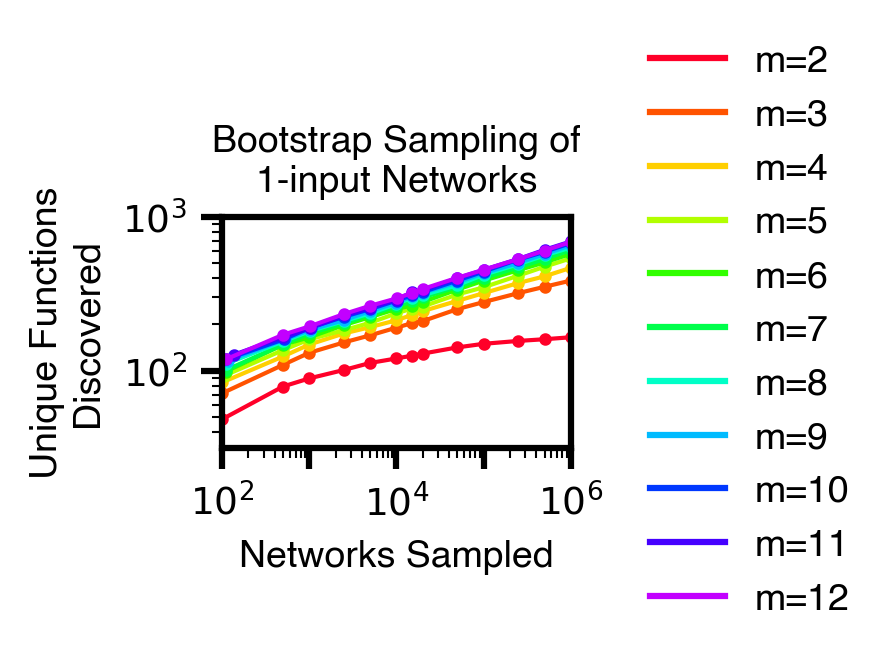

In [33]:
save = True

fig, ax = plt.subplots(figsize=(1.5,1))
cmap = plt.get_cmap('gist_rainbow')

num_replicates = 5

for m_i,m in enumerate(m_list):
    num_networks_bootstrapped = np.load(str(pathlib.Path(load_dir,'param_screen_analysis_1D','bootstrap_validation',f'{m}M',f'num_networks_bootstrapped.npy')), allow_pickle=True)
    num_unique_voxels_bootstrapped = np.load(str(pathlib.Path(load_dir,'param_screen_analysis_1D','bootstrap_validation',f'{m}M',f'num_unique_voxels_bootstrapped.npy')), allow_pickle=True)
    # ax.plot(num_networks_bootstrapped,num_unique_voxels_bootstrapped,ls='', marker='.',ms=12,markeredgewidth=0,color='blueviolet',alpha=0.7)
    unique_num_networks = np.unique(num_networks_bootstrapped)
    avg_num_unique_voxels = [np.mean(np.array(num_unique_voxels_bootstrapped)\
                                [np.where(np.array(num_networks_bootstrapped)==size)])\
                                for size in unique_num_networks]
    ax.plot(unique_num_networks,avg_num_unique_voxels,ls='-', marker='.',ms=4,lw=1,color=cmap(m_i/len(m_list)))

_ = ax.set_xlabel('Networks Sampled')
_ = ax.set_ylabel('Unique Functions\nDiscovered')
_ = ax.set_title(f'Bootstrap Sampling of\n1-input Networks')

ax.set_xscale('log')
ax.set_yscale('log')
_ = ax.set_xlim([1e2,1e6])
_ = ax.set_ylim([10**1.5,1e3])
ax.xaxis.set_minor_locator(mticker.LogLocator(numticks=999, subs="auto"))
ax.yaxis.set_minor_locator(mticker.LogLocator(numticks=999, subs="auto"))

# Set ticks
set_simple_log_ticks(ax,which='x',log_lowerbound=2,log_upperbound=6,max_labels=4)
set_simple_log_ticks(ax,which='y',log_lowerbound=2,log_upperbound=3,max_labels=2)

# Customize spines
set_spine_linewidth(ax,1)

# Customize the major ticks
ax.tick_params(axis='both', which='major', length=5, width=1)  # Length and linewidth of major ticks

# Customize the minor ticks
ax.tick_params(axis='both', which='minor', length=2.5, width=0.25)   # Length and linewidth of minor ticks

patches = {}
for m_i, m in enumerate(m_list):
    patches[f'{m}'] = mlines.Line2D([],[],ls='-',color=cmap(m_i/len(m_list)),\
                                            label=f'm={m}')
leg = fig.legend(bbox_to_anchor=(1, 0.5), loc='center left',facecolor='none',\
        handles=list(patches.values()),\
        edgecolor='none')

fig.set_dpi(300)

if save:
    filename = f'FigS3C_num_unique_voxels_by_num_networks_all_1D'
    plt.savefig(str(pathlib.Path(out_dir,filename+'.pdf')),transparent=True,bbox_inches='tight')
    fig.patch.set_facecolor('white')
    plt.savefig(str(pathlib.Path(out_dir,filename+'.png')),dpi=900,bbox_inches='tight')

### Two input functions

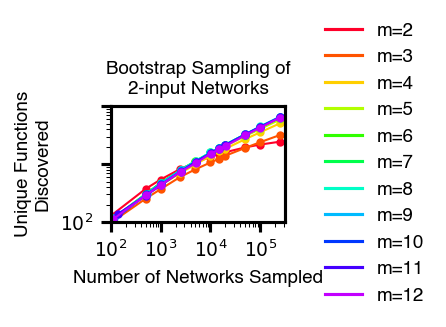

In [34]:
save = True

fig, ax = plt.subplots(figsize=(1.5,1))
cmap = plt.get_cmap('gist_rainbow')
for m_i,m in enumerate(m_list):
    num_networks_bootstrapped = np.load(str(pathlib.Path(load_dir,'param_screen_analysis_2D','bootstrap_validation',f'{m}M',f'num_networks_bootstrapped.npy')), allow_pickle=True)
    num_unique_voxels_bootstrapped = np.load(str(pathlib.Path(load_dir,'param_screen_analysis_2D','bootstrap_validation',f'{m}M',f'num_unique_voxels_bootstrapped.npy')), allow_pickle=True)
    # ax.plot(num_networks_bootstrapped,num_unique_voxels_bootstrapped,ls='', marker='.',ms=12,markeredgewidth=0,color='blueviolet',alpha=0.7)
    unique_num_networks = np.unique(num_networks_bootstrapped)
    avg_num_unique_voxels = [np.mean(np.array(num_unique_voxels_bootstrapped)\
                                [np.where(np.array(num_networks_bootstrapped)==size)])\
                                for size in unique_num_networks]
    ax.plot(unique_num_networks,avg_num_unique_voxels,ls='-', marker='.',ms=6,lw=1,color=cmap(m_i/len(m_list)))

_ = ax.set_xlabel('Number of Networks Sampled')
_ = ax.set_ylabel('Unique Functions\nDiscovered')
_ = ax.set_title(f'Bootstrap Sampling of\n2-input Networks')

ax.set_xscale('log')
ax.set_yscale('log')
_ = ax.set_xlim([1e2,10**5.5])
_ = ax.set_ylim([1e2,1e4])
ax.xaxis.set_minor_locator(mticker.LogLocator(numticks=999, subs="auto"))
ax.yaxis.set_minor_locator(mticker.LogLocator(numticks=999, subs="auto"))

# Set ticks
set_simple_log_ticks(ax,which='x',log_lowerbound=2,log_upperbound=5,max_labels=4)
set_simple_log_ticks(ax,which='y',log_lowerbound=2,log_upperbound=4,max_labels=4)

# Customize spines
set_spine_linewidth(ax,1)

# Customize the major ticks
ax.tick_params(axis='both', which='major', length=5, width=1)  # Length and linewidth of major ticks

# Customize the minor ticks
ax.tick_params(axis='both', which='minor', length=2.5, width=0.25)   # Length and linewidth of minor ticks

patches = {}
for m_i, m in enumerate(m_list):
    patches[f'{m}'] = mlines.Line2D([],[],ls='-',color=cmap(m_i/len(m_list)),\
                                            label=f'm={m}')
leg = fig.legend(bbox_to_anchor=(1, 0.5), loc='center left',facecolor='none',\
        handles=list(patches.values()),\
        edgecolor='none')

if save:
    filename = f'FigS3D_num_unique_voxels_by_num_networks_all_2D'
    plt.savefig(str(pathlib.Path(out_dir,filename+'.pdf')),transparent=True,bbox_inches='tight')
    fig.patch.set_facecolor('white')
    plt.savefig(str(pathlib.Path(out_dir,filename+'.png')),dpi=900,bbox_inches='tight')

## Unpublished: Unique Functions with Limited Parameter  Range

In [99]:
load_from_original = str(pathlib.Path(load_dir,'param_screen_analysis_1D'))
load_from_limited = str(pathlib.Path(load_dir,'param_screen_analysis_1D_limited_param_range'))

In [103]:
unique_voxels_limited = np.load(str(pathlib.Path(load_from_limited,f'{m}M_unique_voxels.npy')),allow_pickle=True)

unique_voxels_original = np.load(str(pathlib.Path(load_from_original,f'{m}M_unique_voxels.npy')),allow_pickle=True)

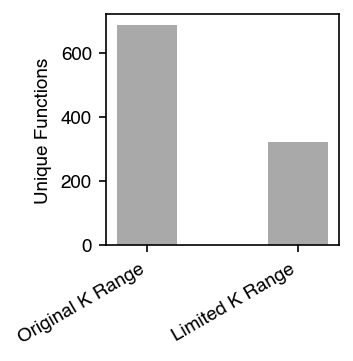

In [108]:
save = False

fig, ax = plt.subplots(figsize=(2,2))

ax.bar([0,1],[unique_voxels_original.shape[0],unique_voxels_limited.shape[0]],width=0.4,color='darkgray')

_ = ax.set_ylabel('Unique Functions')
_ = ax.set_xticks([0,1],labels = ['Original K Range','Limited K Range'],rotation = 30,horizontalalignment='right')


if save:
    filename = f'num_unique_voxels_comparison'
    #
    plt.savefig(str(pathlib.Path(out_dir,filename+'.pdf')),transparent=True,bbox_inches='tight')
    fig.patch.set_facecolor('white')
    plt.savefig(str(pathlib.Path(out_dir,filename+'.png')),dpi=900,bbox_inches='tight')

## Figure S3F: Local Extrema with Limited Parameter Range

In [49]:
load_from_original_data = str(pathlib.Path(load_dir,'param_screen_1D'))
load_from_original_analysis = str(pathlib.Path(load_dir,'param_screen_analysis_1D'))
load_from_limited_data = str(pathlib.Path(load_dir,'param_screen_1D_limited_param_range'))
load_from_limited_analysis = str(pathlib.Path(load_dir,'param_screen_analysis_1D_limited_param_range'))

In [51]:
m = 12

limited_number_local_extrema = np.load(str(pathlib.Path(load_from_limited_data,f'{m}M',f'number_local_extrema.npy')),allow_pickle=True)

limited_filtered_curves_per_Sall_chunk = np.load(str(pathlib.Path(load_from_limited_data,f'{m}M',f'filtered_curves_per_Sall_chunk.npy')),allow_pickle=True)

original_number_local_extrema_by_network_size = np.load(str(pathlib.Path(load_from_original_analysis,'number_local_extrema_by_network_size.npy')),allow_pickle=True)
original_number_local_extrema = original_number_local_extrema_by_network_size[m_list.index(m)]

original_filtered_curves_per_Sall_chunk = np.load(str(pathlib.Path(load_from_original_data,'filtered_curves_per_Sall_chunk_by_m.npy')),allow_pickle=True)
original_filtered_curves_per_Sall_chunk = original_filtered_curves_per_Sall_chunk[m_list.index(m)]

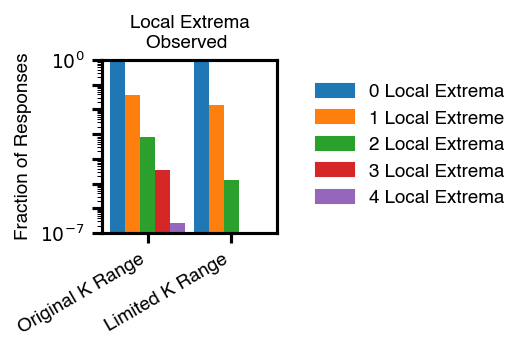

In [55]:
save = True

fig, ax = plt.subplots(figsize=(1.5,1))
rng = np.random.default_rng(seed=42)
cmap = plt.get_cmap('tab10')

max_num_extrema = int(np.max([np.max(limited_number_local_extrema),np.max(original_number_local_extrema)]))
width_per_bar = 0.9/(max_num_extrema+1)
middle_bar = np.median(list(range(max_num_extrema+1)))

# For original data
original_fraction_curves_with_max_extrema = [np.where(original_number_local_extrema==num_extrema)[0].shape[0]\
                                             /np.sum(original_filtered_curves_per_Sall_chunk)\
                               for num_extrema in range(max_num_extrema+1)]

for num_extrema in range(max_num_extrema+1):
    offset = (num_extrema-middle_bar)*width_per_bar
    ax.bar(0+offset, [original_fraction_curves_with_max_extrema[num_extrema] for m_i in range(len(m_list))], \
               width=width_per_bar,color=cmap(num_extrema),log=True)

# For new data (reasonable K range)
fraction_curves_with_max_extrema = [np.where(limited_number_local_extrema==num_extrema)[0].shape[0]\
                                             /np.sum(limited_filtered_curves_per_Sall_chunk) \
                               for num_extrema in range(max_num_extrema+1)]

for num_extrema in range(max_num_extrema+1):
    offset = (num_extrema-middle_bar)*width_per_bar
    ax.bar(1+offset, [fraction_curves_with_max_extrema[num_extrema] for m_i in range(len(m_list))], \
               width=width_per_bar,color=cmap(num_extrema),log=True)

_ = ax.set_ylabel('Fraction of Responses')
_ = ax.set_title(f'Local Extrema\nObserved ')
_ = ax.set_xticks([0,1],labels = ['Original K Range','Limited K Range'],rotation = 30,horizontalalignment='right')
_ = ax.yaxis.set_minor_locator(mticker.LogLocator(numticks=999, subs="auto"))

# Set ticks
ax.set_ylim([1e-7,1])
set_simple_log_ticks(ax,which='y',log_lowerbound=-7,log_upperbound=0,max_labels=4)

# Customize spines
set_spine_linewidth(ax,1)

# Customize the major ticks
ax.tick_params(axis='both', which='major', length=5, width=1)  # Length and linewidth of major ticks

# Customize the minor ticks
ax.tick_params(axis='both', which='minor', length=2.5, width=0.25)   # Length and linewidth of minor ticks

patches={}
for num_extrema in range(max_num_extrema+1):
    if num_extrema==1:
        noun = 'Extreme'
    else:
        noun = 'Extrema'
    patches[f'{num_extrema}'] = \
        mpatches.Patch(color=cmap(num_extrema),label=f'{num_extrema} Local {noun}')

leg = fig.legend(bbox_to_anchor=(1, 0.5), loc='center left',facecolor='none',\
    handles=list(patches.values()),\
    edgecolor='none')

if save:
    filename = f'FigS3F_num_extrema_comparison_norm'
    plt.savefig(str(pathlib.Path(out_dir,filename+'.pdf')),transparent=True,bbox_inches='tight')
    fig.patch.set_facecolor('white')
    plt.savefig(str(pathlib.Path(out_dir,filename+'.png')),dpi=900,bbox_inches='tight')

## Figure S3G: One-input, Two-output functions

In [15]:
m_list = list(range(2,13)) # Network sizes to analyze

In [19]:
combos_counted_by_m = np.load(str(pathlib.Path(load_dir,'param_screen_analysis_1D','1input_2output_functions',f'combos_counted_by_m.npy')),allow_pickle=True)
num_unique_voxels_2output_by_m = np.load(str(pathlib.Path(load_dir,'param_screen_analysis_1D','1input_2output_functions',f'num_unique_voxels_2output_by_m.npy')),allow_pickle=True)
num_unique_voxels_2output_scrambled_by_m = np.load(str(pathlib.Path(load_dir,'param_screen_analysis_1D','1input_2output_functions',f'num_unique_voxels_2output_scrambled_by_m.npy')),allow_pickle=True)

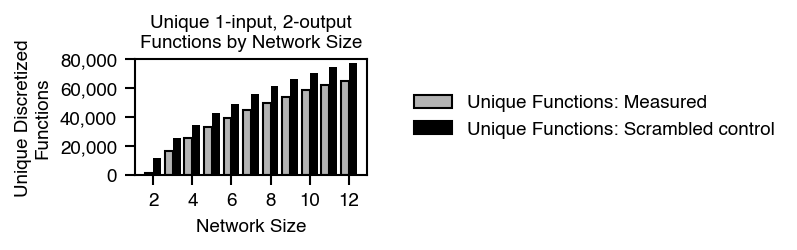

In [20]:
save = True

fig, ax = plt.subplots(figsize=(2,1))

bar_width  = 0.4
# Real
ax.bar(np.array(m_list)-(bar_width/2),num_unique_voxels_2output_by_m,width=bar_width,facecolor=(0.7,0.7,0.7),edgecolor='k')
# Scrambled
ax.bar(np.array(m_list)+(bar_width/2),num_unique_voxels_2output_scrambled_by_m,width=bar_width,color='k')
# Total
# ax.bar(np.array(m_list),combos_counted_by_m,width=bar_width,color='k')

_ = ax.set_xlabel('Network Size')
_ = ax.set_ylabel('Unique Discretized\nFunctions')
_ = ax.set_title('Unique 1-input, 2-output\nFunctions by Network Size')
_ = ax.set_xticks(np.array(m_list)[::2])
_ = ax.set_xticklabels(np.array(m_list)[::2].astype(str))

# _ = ax.set_yscale('log')
# _ = ax.set_ylim([1,10000])
# _ = ax.set_yticks(np.logspace(0,4,4))
# set_simple_log_ticks(ax,which='y',log_lowerbound=0,log_upperbound=4,max_labels=4)

_ = ax.set_ylim([0,8e4])
_ = ax.set_yticks(np.linspace(0,8e4,5),labels=[f'{int(x):,}' for x in np.linspace(0,8e4,5)])

# Customize spines
set_spine_linewidth(ax,1)

# Customize the major ticks
ax.tick_params(axis='both', which='major', length=5, width=1)  # Length and linewidth of major ticks

# Customize the minor ticks
ax.tick_params(axis='both', which='minor', length=2.5, width=0.25)   # Length and linewidth of minor ticks

# Make legend
patches={}
patches[f'light'] = mpatches.Patch(facecolor=(0.7,0.7,0.7),edgecolor='k',label=f'Unique Functions: Measured')
patches[f'dark'] = mpatches.Patch(facecolor='k',edgecolor='k',label=f'Unique Functions: Scrambled control')
# patches[f'black'] = mpatches.Patch(color='k',edgecolor='none',label=f'All 2-output functions observed')

leg = fig.legend(bbox_to_anchor=(1, 0.5), loc='center left',facecolor='none',\
    handles=list(patches.values()),\
    edgecolor='none')

# plt.tight_layout()

if save:
    filename = f'FigS3G_num_unique_voxels_1input_2output_by_network_size'
    plt.savefig(str(pathlib.Path(out_dir,filename+'.pdf')),transparent=True,bbox_inches='tight')
    fig.patch.set_facecolor('white')
    plt.savefig(str(pathlib.Path(out_dir,filename+'.png')),dpi=900,bbox_inches='tight')

## Figure S3H: Two-input, Two-output functions

In [21]:
m_list = list(range(2,13)) # Network sizes to analyze

In [22]:
combos_counted_by_m = np.load(str(pathlib.Path(load_dir,'param_screen_analysis_2D','2input_2output_functions',f'combos_counted_by_m.npy')),allow_pickle=True)
num_unique_voxels_2output_by_m = np.load(str(pathlib.Path(load_dir,'param_screen_analysis_2D','2input_2output_functions',f'num_unique_voxels_2output_by_m.npy')),allow_pickle=True)
num_unique_voxels_2output_scrambled_by_m = np.load(str(pathlib.Path(load_dir,'param_screen_analysis_2D','2input_2output_functions',f'num_unique_voxels_2output_scrambled_by_m.npy')),allow_pickle=True)

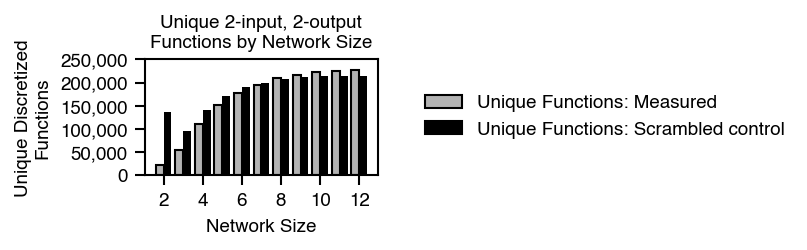

In [23]:
save = True

fig, ax = plt.subplots(figsize=(2,1))

bar_width  = 0.4
# Real
ax.bar(np.array(m_list)-(bar_width/2),num_unique_voxels_2output_by_m,width=bar_width,facecolor=(0.7,0.7,0.7),edgecolor='k')
# Scrambled
ax.bar(np.array(m_list)+(bar_width/2),num_unique_voxels_2output_scrambled_by_m,width=bar_width,color='k')
# Total
# ax.bar(np.array(m_list),combos_counted_by_m,width=bar_width,color='k')

_ = ax.set_xlabel('Network Size')
_ = ax.set_ylabel('Unique Discretized\nFunctions')
_ = ax.set_title('Unique 2-input, 2-output\nFunctions by Network Size')
_ = ax.set_xticks(np.array(m_list)[::2])
_ = ax.set_xticklabels(np.array(m_list)[::2].astype(str))

# _ = ax.set_yscale('log')
# _ = ax.set_ylim([1,10000])
# _ = ax.set_yticks(np.logspace(0,4,4))
# set_simple_log_ticks(ax,which='y',log_lowerbound=0,log_upperbound=4,max_labels=4)

_ = ax.set_ylim([0,2.5e5])
_ = ax.set_yticks(np.linspace(0,2.5e5,6),labels=[f'{int(x):,}' for x in np.linspace(0,2.5e5,6)])

# Customize spines
set_spine_linewidth(ax,1)

# Customize the major ticks
ax.tick_params(axis='both', which='major', length=5, width=1)  # Length and linewidth of major ticks

# Customize the minor ticks
ax.tick_params(axis='both', which='minor', length=2.5, width=0.25)   # Length and linewidth of minor ticks

# Make legend
patches={}
patches[f'light'] = mpatches.Patch(facecolor=(0.7,0.7,0.7),edgecolor='k',label=f'Unique Functions: Measured')
patches[f'dark'] = mpatches.Patch(facecolor='k',edgecolor='k',label=f'Unique Functions: Scrambled control')
# patches[f'black'] = mpatches.Patch(color='k',edgecolor='none',label=f'All 2-output functions observed')

leg = fig.legend(bbox_to_anchor=(1, 0.5), loc='center left',facecolor='none',\
    handles=list(patches.values()),\
    edgecolor='none')

# plt.tight_layout()

if save:
    filename = f'FigS3H_num_unique_voxels_1input_2output_by_network_size'
    plt.savefig(str(pathlib.Path(out_dir,filename+'.pdf')),transparent=True,bbox_inches='tight')
    fig.patch.set_facecolor('white')
    plt.savefig(str(pathlib.Path(out_dir,filename+'.png')),dpi=900,bbox_inches='tight')

## Unpublished: Distribution of Responses Among Unique Functions

### One-input functions

In [77]:
num_curves_by_meta_voxel_sorted = np.load(str(pathlib.Path(load_dir,'param_screen_analysis_1D',f'num_curves_by_meta_voxel_sorted.npy')),allow_pickle=True)

Plot overall:

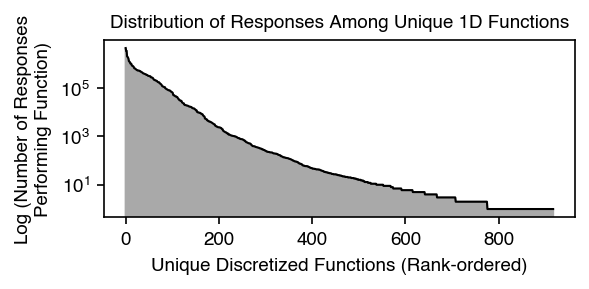

In [92]:
save = True

fig, ax = plt.subplots(figsize=(4,2))

ax.plot(list(range(num_curves_by_meta_voxel_sorted.shape[0])),num_curves_by_meta_voxel_sorted,linewidth=1,color='k')
ax.fill_between(list(range(num_curves_by_meta_voxel_sorted.shape[0])),num_curves_by_meta_voxel_sorted,color='darkgray')

_ = ax.set_xlabel(f'Unique Discretized Functions (Rank-ordered)')
_ = ax.set_ylabel('Log (Number of Responses\nPerforming Function)')
_ = ax.set_title('Distribution of Responses Among Unique 1D Functions')

ax.set_yscale('log')

if save:
    filename = f'Fig4Unpublished_voxel_size_distribution_1D'
    #
    plt.savefig(str(pathlib.Path(out_dir,filename+'.pdf')),transparent=True,bbox_inches='tight')
    fig.patch.set_facecolor('white')
    plt.savefig(str(pathlib.Path(out_dir,filename+'.png')),dpi=900,bbox_inches='tight')

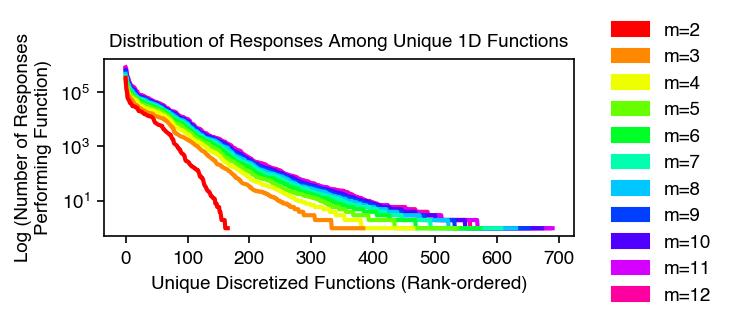

In [95]:
save = True

fig, ax = plt.subplots(figsize=(4,2))
cmap = plt.get_cmap('gist_rainbow')

for m in reversed(m_list):
    m_i = m_list.index(m)
    num_curves_by_voxel_sorted = np.load(str(pathlib.Path(load_dir,'param_screen_analysis_1D',f'{m}M_num_curves_by_voxel_sorted.npy')),allow_pickle=True)
    ax.plot(list(range(num_curves_by_voxel_sorted.shape[0])),num_curves_by_voxel_sorted,linewidth=2,color=cmap(m_i/len(m_list)))

_ = ax.set_xlabel(f'Unique Discretized Functions (Rank-ordered)')
_ = ax.set_ylabel('Log (Number of Responses\nPerforming Function)')
_ = ax.set_title('Distribution of Responses Among Unique 1D Functions')

ax.set_yscale('log')

patches={}
for m_i,m in enumerate(m_list):
    patches[f'm={m}'] = mpatches.Patch(color=cmap(m_i/len(m_list)),label=f'm={m}')

leg = fig.legend(bbox_to_anchor=(1, 0.5), loc='center left',facecolor='none',\
    handles=list(patches.values()),\
    edgecolor='none')


if save:
    filename = f'Fig4Unpublished_voxel_size_distribution_by_network_size_1D'
    #
    plt.savefig(str(pathlib.Path(out_dir,filename+'.pdf')),transparent=True,bbox_inches='tight')
    fig.patch.set_facecolor('white')
    plt.savefig(str(pathlib.Path(out_dir,filename+'.png')),dpi=900,bbox_inches='tight')

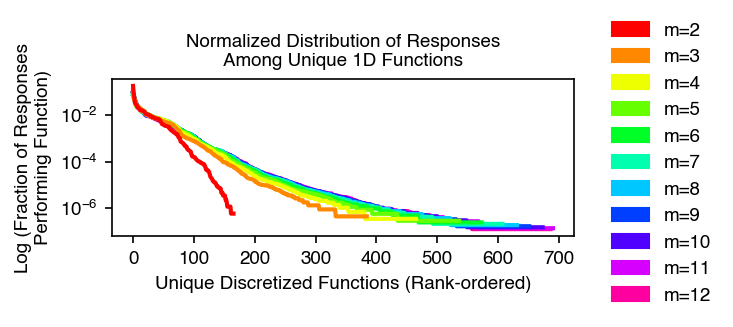

In [102]:
save = True

fig, ax = plt.subplots(figsize=(4,2))
cmap = plt.get_cmap('gist_rainbow')

for m in reversed(m_list):
    m_i = m_list.index(m)
    curves_by_voxel = np.load(str(pathlib.Path(load_dir,'param_screen_analysis_1D',f'{m}M_curves_by_voxel.npy')),allow_pickle=True)
    total_num_curves = np.sum([x.shape[0] for x in curves_by_voxel])
    num_curves_by_voxel_sorted = np.load(str(pathlib.Path(load_dir,'param_screen_analysis_1D',f'{m}M_num_curves_by_voxel_sorted.npy')),allow_pickle=True)
    ax.plot(list(range(num_curves_by_voxel_sorted.shape[0])),[x/total_num_curves for x in num_curves_by_voxel_sorted],\
            linewidth=2,color=cmap(m_i/len(m_list)))

_ = ax.set_xlabel(f'Unique Discretized Functions (Rank-ordered)')
_ = ax.set_ylabel('Log (Fraction of Responses\nPerforming Function)')
_ = ax.set_title('Normalized Distribution of Responses\nAmong Unique 1D Functions')

ax.set_yscale('log')

patches={}
for m_i,m in enumerate(m_list):
    patches[f'm={m}'] = mpatches.Patch(color=cmap(m_i/len(m_list)),label=f'm={m}')

leg = fig.legend(bbox_to_anchor=(1, 0.5), loc='center left',facecolor='none',\
    handles=list(patches.values()),\
    edgecolor='none')

if save:
    filename = f'Fig4Unpublished_voxel_size_distribution_by_network_size_norm_1D'
    #
    plt.savefig(str(pathlib.Path(out_dir,filename+'.pdf')),transparent=True,bbox_inches='tight')
    fig.patch.set_facecolor('white')
    plt.savefig(str(pathlib.Path(out_dir,filename+'.png')),dpi=900,bbox_inches='tight')

### Two-input functions

In [143]:
num_curves_by_meta_voxel_sorted = np.load(str(pathlib.Path(load_dir,'param_screen_analysis_2D',f'num_curves_by_meta_voxel_sorted.npy')),allow_pickle=True)

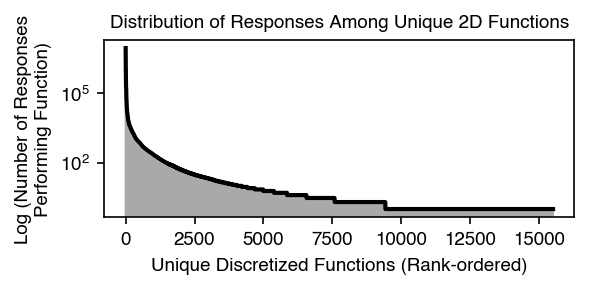

In [144]:
save = True

fig, ax = plt.subplots(figsize=(4,2))

ax.plot(list(range(num_curves_by_meta_voxel_sorted.shape[0])),num_curves_by_meta_voxel_sorted,linewidth=2,color='k')
ax.fill_between(list(range(num_curves_by_meta_voxel_sorted.shape[0])),num_curves_by_meta_voxel_sorted,color='darkgray')

_ = ax.set_xlabel(f'Unique Discretized Functions (Rank-ordered)')
_ = ax.set_ylabel('Log (Number of Responses\nPerforming Function)')
_ = ax.set_title('Distribution of Responses Among Unique 2D Functions')

ax.set_yscale('log')

if save:
    filename = f'Fig4Unpublished_voxel_size_distribution_2D'
    #
    plt.savefig(str(pathlib.Path(out_dir,filename+'.pdf')),transparent=True,bbox_inches='tight')
    fig.patch.set_facecolor('white')
    plt.savefig(str(pathlib.Path(out_dir,filename+'.png')),dpi=900,bbox_inches='tight')

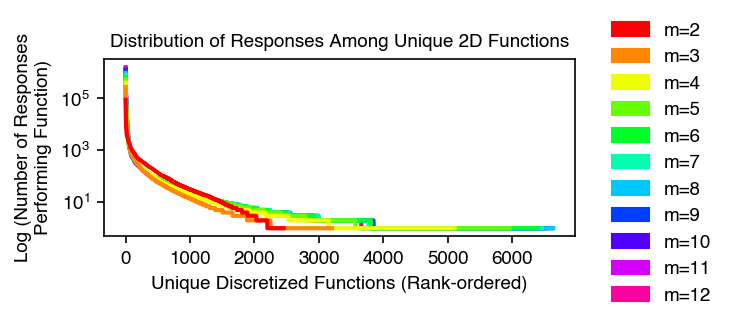

In [150]:
save = True

fig, ax = plt.subplots(figsize=(4,2))
cmap = plt.get_cmap('gist_rainbow')

for m in reversed(m_list):
    m_i = m_list.index(m)
    num_curves_by_voxel_sorted = np.load(str(pathlib.Path(load_dir,'param_screen_analysis_2D',f'{m}M_num_curves_by_voxel_sorted.npy')),allow_pickle=True)
    ax.plot(list(range(num_curves_by_voxel_sorted.shape[0])),num_curves_by_voxel_sorted,linewidth=2,color=cmap(m_i/len(m_list)))

_ = ax.set_xlabel(f'Unique Discretized Functions (Rank-ordered)')
_ = ax.set_ylabel('Log (Number of Responses\nPerforming Function)')
_ = ax.set_title('Distribution of Responses Among Unique 2D Functions')

ax.set_yscale('log')

patches={}
for m_i,m in enumerate(m_list):
    patches[f'm={m}'] = mpatches.Patch(color=cmap(m_i/len(m_list)),label=f'm={m}')

leg = fig.legend(bbox_to_anchor=(1, 0.5), loc='center left',facecolor='none',\
    handles=list(patches.values()),\
    edgecolor='none')

if save:
    filename = f'Fig4Unpublished_voxel_size_distribution_by_network_size_2D'
    #
    plt.savefig(str(pathlib.Path(out_dir,filename+'.pdf')),transparent=True,bbox_inches='tight')
    fig.patch.set_facecolor('white')
    plt.savefig(str(pathlib.Path(out_dir,filename+'.png')),dpi=900,bbox_inches='tight')

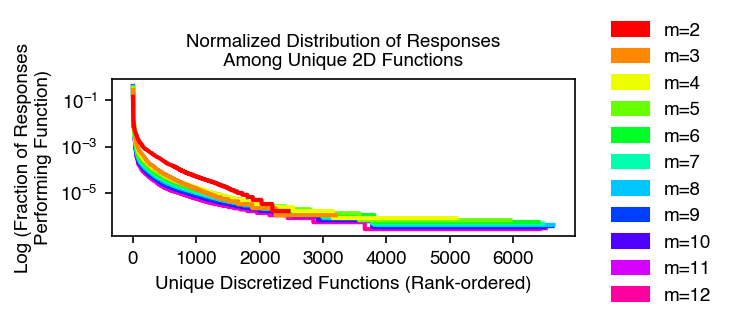

In [151]:
save = True

fig, ax = plt.subplots(figsize=(4,2))
cmap = plt.get_cmap('gist_rainbow')

for m in reversed(m_list):
    m_i = m_list.index(m)
    curves_by_voxel = np.load(str(pathlib.Path(load_dir,'param_screen_analysis_2D',f'{m}M_curves_by_voxel.npy')),allow_pickle=True)
    total_num_curves = np.sum([x.shape[0] for x in curves_by_voxel])
    num_curves_by_voxel_sorted = np.load(str(pathlib.Path(load_dir,'param_screen_analysis_2D',f'{m}M_num_curves_by_voxel_sorted.npy')),allow_pickle=True)
    ax.plot(list(range(num_curves_by_voxel_sorted.shape[0])),[x/total_num_curves for x in num_curves_by_voxel_sorted],\
            linewidth=2,color=cmap(m_i/len(m_list)))

_ = ax.set_xlabel(f'Unique Discretized Functions (Rank-ordered)')
_ = ax.set_ylabel('Log (Fraction of Responses\nPerforming Function)')
_ = ax.set_title('Normalized Distribution of Responses\nAmong Unique 2D Functions')

ax.set_yscale('log')

patches={}
for m_i,m in enumerate(m_list):
    patches[f'm={m}'] = mpatches.Patch(color=cmap(m_i/len(m_list)),label=f'm={m}')

leg = fig.legend(bbox_to_anchor=(1, 0.5), loc='center left',facecolor='none',\
    handles=list(patches.values()),\
    edgecolor='none')

if save:
    filename = f'Fig4Unpublished_voxel_size_distribution_by_network_size_norm_2D'
    #
    plt.savefig(str(pathlib.Path(out_dir,filename+'.pdf')),transparent=True,bbox_inches='tight')
    fig.patch.set_facecolor('white')
    plt.savefig(str(pathlib.Path(out_dir,filename+'.png')),dpi=900,bbox_inches='tight')

## Unpublished: Unique Function Overlaps Among Network Sizes

### One-input Functions

In [107]:
voxel_overlaps = np.load(str(pathlib.Path(load_dir,'param_screen_analysis_1D',f'network_size_voxel_overlaps.npy')),allow_pickle=True)
voxel_overlap_fractions = np.load(str(pathlib.Path(load_dir,'param_screen_analysis_1D',f'network_size_voxel_overlap_fractions.npy')),allow_pickle=True)

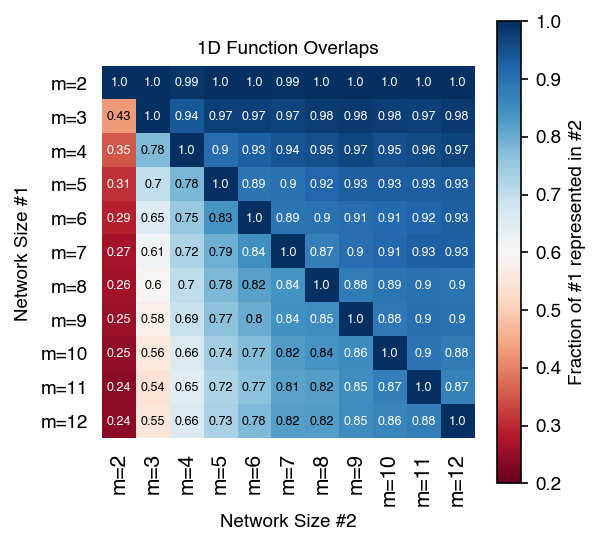

In [112]:
save = True

fig, ax = plt.subplots(figsize=(4,4))

cmap = plt.get_cmap('RdBu').copy()

vmin = 0.05*(np.min(voxel_overlap_fractions)//0.05)
vmax = 1
matrix = ax.matshow(voxel_overlap_fractions,cmap = cmap,vmin=vmin,vmax=vmax)

for (j,i),label in np.ndenumerate(voxel_overlap_fractions):
    if label>(vmin+(0.2*(vmax-vmin))) and label<(vmin+(0.8*(vmax-vmin))):
        color='black'
    else:
        color='white'
    ax.text(i,j,round(label,2),ha='center',va='center',fontsize=6,color=color)

labels = [f'm={m}' for m in m_list]

ax.set_xticks(list(range(len(m_list))))
ax.set_xticklabels(labels,fontsize=10,rotation=90)
ax.xaxis.set_ticks_position("bottom")

ax.set_yticks(list(range(len(m_list))))
ax.set_yticklabels(labels)

plt.tick_params(
    axis='both',          
    which='both',      
    bottom=False,      
    top=False,         
    right=False,
    left=False
 )
ax.spines.right.set_visible(False)
ax.spines.left.set_visible(False)
ax.spines.bottom.set_visible(False)
ax.spines.top.set_visible(False)

fig.colorbar(matrix, ax=ax,label='Fraction of #1 represented in #2')

_ = ax.set_xlabel('Network Size #2')
_ = ax.set_ylabel('Network Size #1')
_ = ax.set_title(f'1D Function Overlaps')

if save:
    filename = f'Fig4Unpublished_network_size_voxel_overlaps_1D'
    plt.savefig(str(pathlib.Path(out_dir,filename+'.pdf')),transparent=True,bbox_inches='tight')
    fig.patch.set_facecolor('white')
    plt.savefig(str(pathlib.Path(out_dir,filename+'.png')),dpi=900,bbox_inches='tight')

### Two-input Functions

In [113]:
voxel_overlaps = np.load(str(pathlib.Path(load_dir,'param_screen_analysis_2D',f'network_size_voxel_overlaps.npy')),allow_pickle=True)
voxel_overlap_fractions = np.load(str(pathlib.Path(load_dir,'param_screen_analysis_2D',f'network_size_voxel_overlap_fractions.npy')),allow_pickle=True)

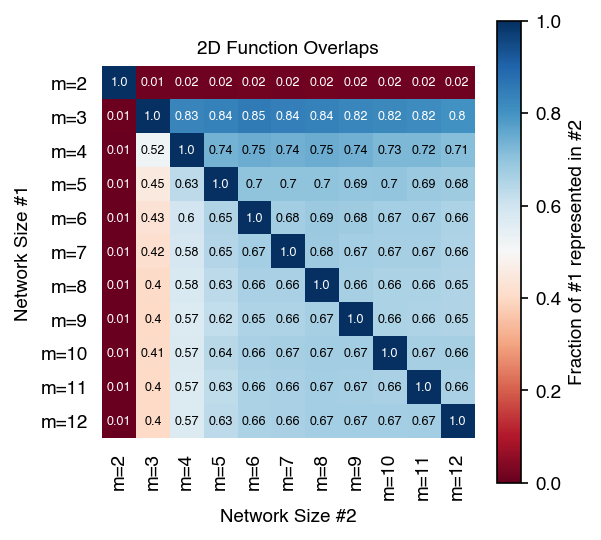

In [115]:
save = True

fig, ax = plt.subplots(figsize=(4,4))

cmap = plt.get_cmap('RdBu').copy()

vmin = 0.05*(np.min(voxel_overlap_fractions)//0.05)
vmax = 1
matrix = ax.matshow(voxel_overlap_fractions,cmap = cmap,vmin=vmin,vmax=vmax)

for (j,i),label in np.ndenumerate(voxel_overlap_fractions):
    if label>(vmin+(0.2*(vmax-vmin))) and label<(vmin+(0.8*(vmax-vmin))):
        color='black'
    else:
        color='white'
    ax.text(i,j,round(label,2),ha='center',va='center',fontsize=6,color=color)

labels = [f'm={m}' for m in m_list]

ax.set_xticks(list(range(len(m_list))))
ax.set_xticklabels(labels,rotation=90)
ax.xaxis.set_ticks_position("bottom")

ax.set_yticks(list(range(len(m_list))))
ax.set_yticklabels(labels)

plt.tick_params(
    axis='both',          
    which='both',      
    bottom=False,      
    top=False,         
    right=False,
    left=False
 )
ax.spines.right.set_visible(False)
ax.spines.left.set_visible(False)
ax.spines.bottom.set_visible(False)
ax.spines.top.set_visible(False)

fig.colorbar(matrix, ax=ax,label='Fraction of #1 represented in #2')

_ = ax.set_xlabel('Network Size #2')
_ = ax.set_ylabel('Network Size #1')
_ = ax.set_title(f'2D Function Overlaps')

if save:
    filename = f'Fig4Unpublished_network_size_voxel_overlaps_2D'
    plt.savefig(str(pathlib.Path(out_dir,filename+'.pdf')),transparent=True,bbox_inches='tight')
    fig.patch.set_facecolor('white')
    plt.savefig(str(pathlib.Path(out_dir,filename+'.png')),dpi=900,bbox_inches='tight')

## Figure S3B, Unpublished: One-input Expressivity Statistics by Network Size

In [19]:
m_list = list(range(2,13))

In [20]:
num_unique_voxels_by_m = np.load(str(pathlib.Path(load_dir,'param_screen_analysis_1D',f'num_unique_voxels_by_m.npy')),allow_pickle=True)

In [21]:
# Load, if necessary
S_all_filenames_by_m = np.load(str(pathlib.Path(load_dir,'param_screen_1D','S_all_filenames_by_m.npy')),allow_pickle=True)
all_curves_per_Sall_chunk_by_m = np.load(str(pathlib.Path(load_dir,'param_screen_1D','all_curves_per_Sall_chunk_by_m.npy')),allow_pickle=True)
unfiltered_curves_per_Sall_chunk_by_m = np.load(str(pathlib.Path(load_dir,'param_screen_1D','unfiltered_curves_per_Sall_chunk_by_m.npy')),allow_pickle=True)
nonzero_curves_per_Sall_chunk_by_m = np.load(str(pathlib.Path(load_dir,'param_screen_1D','nonzero_curves_per_Sall_chunk_by_m.npy')),allow_pickle=True)
filtered_curves_per_Sall_chunk_by_m = np.load(str(pathlib.Path(load_dir,'param_screen_1D','filtered_curves_per_Sall_chunk_by_m.npy')),allow_pickle=True)

num_unique_voxels_by_species_type_by_m = np.load(str(pathlib.Path(load_dir,'param_screen_analysis_1D',f'num_unique_voxels_by_species_type_by_m.npy')),allow_pickle=True)
num_unfiltered_curves_by_species_type_by_m = np.load(str(pathlib.Path(load_dir,'param_screen_analysis_1D',f'num_unfiltered_curves_by_species_type_by_m.npy')),allow_pickle=True)
num_filtered_curves_by_species_type_by_m = np.load(str(pathlib.Path(load_dir,'param_screen_analysis_1D',f'num_filtered_curves_by_species_type_by_m.npy')),allow_pickle=True)
fraction_passed_filter_by_species_type_by_m = np.load(str(pathlib.Path(load_dir,'param_screen_analysis_1D',f'fraction_passed_filter_by_species_type_by_m.npy')),allow_pickle=True)

num_unfiltered_curves_by_m = [np.sum(unfiltered_curves_per_Sall_chunk_by_m[m_i]) for m_i, m in enumerate(m_list)]
num_nonzero_curves_by_m = [np.sum(nonzero_curves_per_Sall_chunk_by_m[m_i]) for m_i, m in enumerate(m_list)]
num_filtered_curves_by_m = [np.sum(filtered_curves_per_Sall_chunk_by_m[m_i]) for m_i, m in enumerate(m_list)]

fraction_passed_filtering_by_m = np.divide(num_filtered_curves_by_m,num_unfiltered_curves_by_m)
fraction_nonzero = np.divide(num_nonzero_curves_by_m,num_unfiltered_curves_by_m)
fraction_nonzero_constant = np.divide(np.array(num_nonzero_curves_by_m)-np.array(num_filtered_curves_by_m),num_unfiltered_curves_by_m)

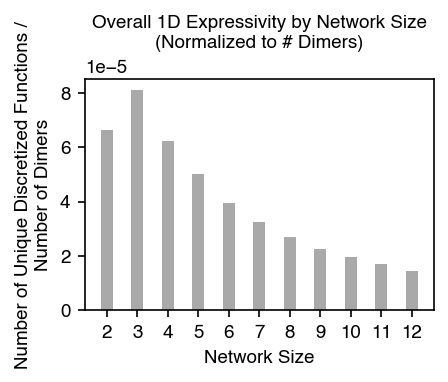

In [159]:
save = False

fig, ax = plt.subplots(figsize=(3,2))

ax.bar(m_list,[num_unique_voxels_by_m[m_i]/num_unfiltered_curves_by_m[m_i]\
               for m_i in range(len(m_list))],width=0.4,color='darkgray')

_ = ax.set_xlabel('Network Size')
_ = ax.set_ylabel('Number of Unique Discretized Functions /\nNumber of Dimers')
_ = ax.set_title('Overall 1D Expressivity by Network Size\n(Normalized to # Dimers)')
_ = ax.set_xticks(m_list)
_ = ax.set_xticklabels([str(m) for m in m_list])

if save:
    filename = f'Fig4Unpublished_num_unique_voxels_by_network_size_unfilt_normalized_1D'
    #
    plt.savefig(str(pathlib.Path(out_dir,filename+'.pdf')),transparent=True,bbox_inches='tight')
    fig.patch.set_facecolor('white')
    plt.savefig(str(pathlib.Path(out_dir,filename+'.png')),dpi=900,bbox_inches='tight')

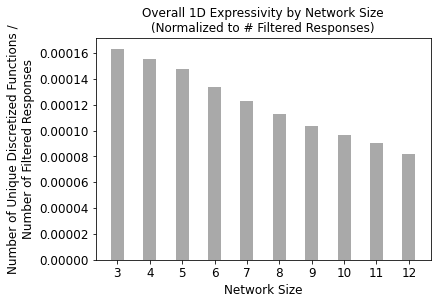

In [60]:
save = False

fig, ax = plt.subplots(figsize=(3,2))

ax.bar(m_list,[num_unique_voxels_by_m[m_i]/num_filtered_curves_by_m[m_i]\
               for m_i in range(len(m_list))],width=0.4,color='darkgray')

_ = ax.set_xlabel('Network Size')
_ = ax.set_ylabel('Number of Unique Discretized Functions /\nNumber of Filtered Responses')
_ = ax.set_title('Overall 1D Expressivity by Network Size\n(Normalized to # Filtered Responses)')
_ = ax.set_xticks(m_list)
_ = ax.set_xticklabels([str(m) for m in m_list])

if save:
    filename = f'Fig4Unpublished_num_unique_voxels_by_network_size_filt_normalized_1D'
    #
    plt.savefig(str(pathlib.Path(out_dir,filename+'.pdf')),transparent=True,bbox_inches='tight')
    fig.patch.set_facecolor('white')
    plt.savefig(str(pathlib.Path(out_dir,filename+'.png')),dpi=900,bbox_inches='tight')

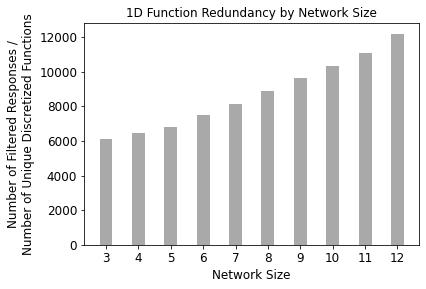

In [61]:
save = False

fig, ax = plt.subplots(figsize=(3,2))

ax.bar(m_list,[num_filtered_curves_by_m[m_i]/num_unique_voxels_by_m[m_i]\
               for m_i in range(len(m_list))],width=0.4,color='darkgray')

_ = ax.set_xlabel('Network Size')
_ = ax.set_ylabel('Number of Filtered Responses /\nNumber of Unique Discretized Functions')
_ = ax.set_title('1D Function Redundancy by Network Size')
_ = ax.set_xticks(m_list)
_ = ax.set_xticklabels([str(m) for m in m_list])

if save:
    filename = f'Fig4Unpublished_redundancy_by_network_size_1D'
    #
    plt.savefig(str(pathlib.Path(out_dir,filename+'.pdf')),transparent=True,bbox_inches='tight')
    fig.patch.set_facecolor('white')
    plt.savefig(str(pathlib.Path(out_dir,filename+'.png')),dpi=900,bbox_inches='tight')

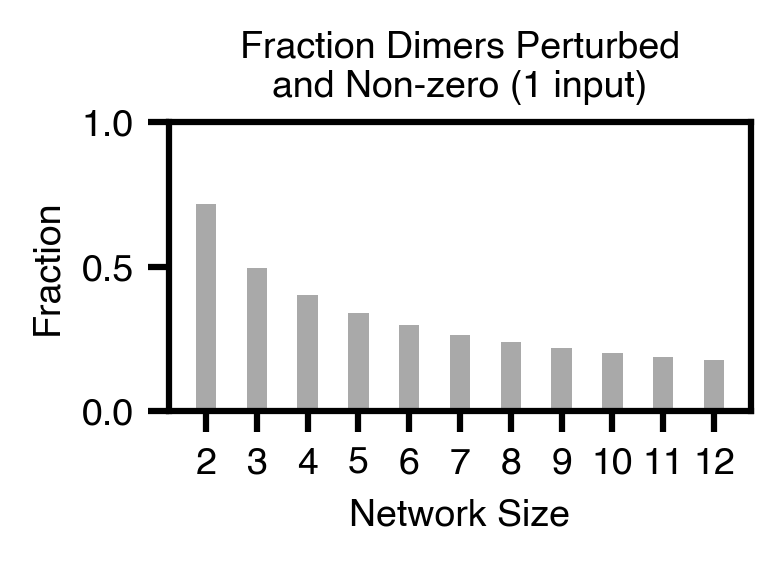

In [26]:
save = True

fig, ax = plt.subplots(figsize=(2.5,1.25))

ax.bar(m_list,fraction_passed_filtering_by_m,width=0.4,color='darkgray')

_ = ax.set_xlabel('Network Size')
_ = ax.set_ylabel('Fraction')
_ = ax.set_title('Fraction Dimers Perturbed\nand Non-zero (1 input)')
_ = ax.set_xticks(m_list)
_ = ax.set_xticklabels([str(m) for m in m_list])

_ = ax.set_ylim(0,1)

# Customize spines
set_spine_linewidth(ax,1)

# Customize the major ticks
ax.tick_params(axis='both', which='major', length=5, width=1)  # Length and linewidth of major ticks

fig.set_dpi(300)

if save:
    filename = f'FigS3B_fraction_passed_filter_by_network_size_1D'
    plt.savefig(str(pathlib.Path(out_dir,filename+'.pdf')),transparent=True,bbox_inches='tight')
    fig.patch.set_facecolor('white')
    plt.savefig(str(pathlib.Path(out_dir,filename+'.png')),dpi=900,bbox_inches='tight')

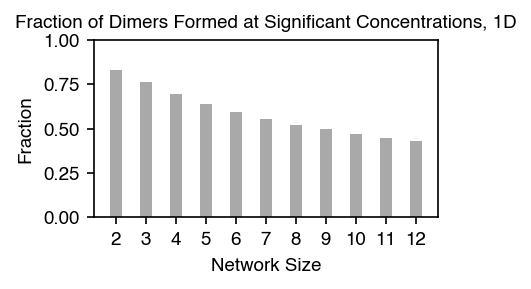

In [161]:
save = True

fig, ax = plt.subplots(figsize=(3,2))

ax.bar(m_list,fraction_nonzero,width=0.4,color='darkgray')

_ = ax.set_xlabel('Network Size')
_ = ax.set_ylabel('Fraction')
_ = ax.set_title('Fraction of Dimers Formed at Significant Concentrations, 1D')
_ = ax.set_xticks(m_list)
_ = ax.set_xticklabels([str(m) for m in m_list])
_ = ax.set_ylim([0,1])

if save:
    filename = f'Fig4Unpublished_fraction_nonzero_by_network_size_1D'
    #
    plt.savefig(str(pathlib.Path(out_dir,filename+'.pdf')),transparent=True,bbox_inches='tight')
    fig.patch.set_facecolor('white')
    plt.savefig(str(pathlib.Path(out_dir,filename+'.png')),dpi=900,bbox_inches='tight')

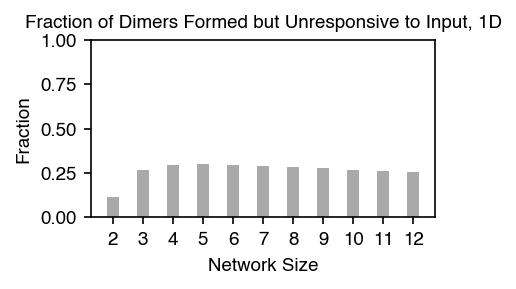

In [162]:
save = True

fig, ax = plt.subplots(figsize=(3,2))

ax.bar(m_list,fraction_nonzero_constant,width=0.4,color='darkgray')

_ = ax.set_xlabel('Network Size')
_ = ax.set_ylabel('Fraction')
_ = ax.set_title('Fraction of Dimers Formed but Unresponsive to Input, 1D')
_ = ax.set_xticks(m_list)
_ = ax.set_xticklabels([str(m) for m in m_list])
_ = ax.set_ylim([0,1])

if save:
    filename = f'Fig4Unpublished_fraction_nonzero_constant_by_network_size_1D'
    #
    plt.savefig(str(pathlib.Path(out_dir,filename+'.pdf')),transparent=True,bbox_inches='tight')
    fig.patch.set_facecolor('white')
    plt.savefig(str(pathlib.Path(out_dir,filename+'.png')),dpi=900,bbox_inches='tight')

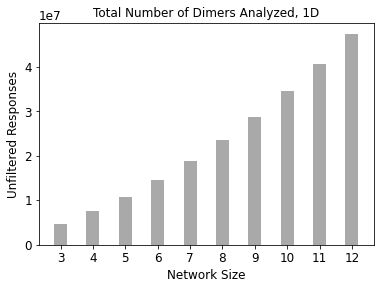

In [65]:
save = False

fig, ax = plt.subplots(figsize=(3,2))

ax.bar(m_list,num_unfiltered_curves_by_m,width=0.4,color='darkgray')

_ = ax.set_xlabel('Network Size')
_ = ax.set_ylabel('Unfiltered Responses')
_ = ax.set_title('Total Number of Dimers Analyzed, 1D')
_ = ax.set_xticks(m_list)
_ = ax.set_xticklabels([str(m) for m in m_list])

if save:
    filename = f'Fig4Unpublished_num_unfiltered_curves_by_network_size_1D'
    #
    plt.savefig(str(pathlib.Path(out_dir,filename+'.pdf')),transparent=True,bbox_inches='tight')
    fig.patch.set_facecolor('white')
    plt.savefig(str(pathlib.Path(out_dir,filename+'.png')),dpi=900,bbox_inches='tight')

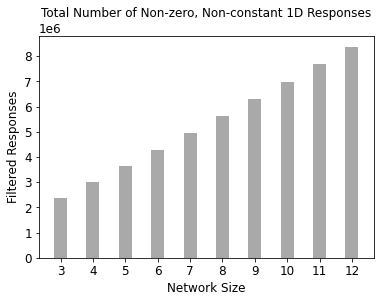

In [66]:
save = False

fig, ax = plt.subplots(figsize=(3,2))

ax.bar(m_list,num_filtered_curves_by_m,width=0.4,color='darkgray')

_ = ax.set_xlabel('Network Size')
_ = ax.set_ylabel('Filtered Responses')
_ = ax.set_title('Total Number of Non-zero, Non-constant 1D Responses')
_ = ax.set_xticks(m_list)
_ = ax.set_xticklabels([str(m) for m in m_list])

if save:
    filename = f'Fig4Unpublished_num_filtered_curves_by_network_size_1D'
    #
    plt.savefig(str(pathlib.Path(out_dir,filename+'.pdf')),transparent=True,bbox_inches='tight')
    fig.patch.set_facecolor('white')
    plt.savefig(str(pathlib.Path(out_dir,filename+'.png')),dpi=900,bbox_inches='tight')

Now, data disaggregated by species type:

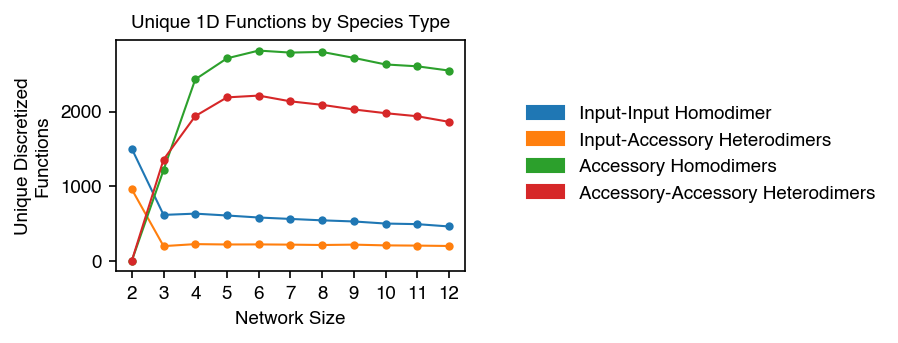

In [204]:
save = False

fig, ax = plt.subplots(figsize=(3,2))
cmap = plt.get_cmap('tab10')

for species_type_i in range(4):
    ax.plot(m_list,num_unique_voxels_by_species_type_by_m[species_type_i],\
                marker='.',linestyle='-',markersize=8,linewidth=1,markeredgewidth=0,color=cmap(species_type_i),alpha=1)

_ = ax.set_xlabel('Network Size')
_ = ax.set_ylabel('Unique Discretized\nFunctions')
_ = ax.set_title(f'Unique 1D Functions by Species Type')
_ = ax.set_xticks(m_list)
_ = ax.set_xticklabels([str(x) for x in m_list])

patches={}
patches['input_input_homodimer'] = mpatches.Patch(color=cmap(0),label=f'Input-Input Homodimer')
patches['input_acc_heterodimers'] = mpatches.Patch(color=cmap(1),label=f'Input-Accessory Heterodimers')
patches['acc_acc_homodimers'] = mpatches.Patch(color=cmap(2),label=f'Accessory Homodimers')
patches['acc_acc_heterodimers'] = mpatches.Patch(color=cmap(3),label=f'Accessory-Accessory Heterodimers')

leg = fig.legend(bbox_to_anchor=(1, 0.5), loc='center left',facecolor='none',\
    handles=list(patches.values()),\
    edgecolor='none')

if save:
    filename = f'num_unique_voxels_by_species_type_1D'
    #
    plt.savefig(str(pathlib.Path(out_dir,filename+'.pdf')),transparent=True,bbox_inches='tight')
    fig.patch.set_facecolor('white')
    plt.savefig(str(pathlib.Path(out_dir,filename+'.png')),dpi=900,bbox_inches='tight')

C:\Users\jacob\AppData\Local\Temp\ipykernel_21476\329424963.py:7: RuntimeWarning: invalid value encountered in true_divide
  ax.plot(m_list,np.divide(num_filtered_curves_by_species_type_by_m[species_type_i],num_unique_voxels_by_species_type_by_m[species_type_i]),\


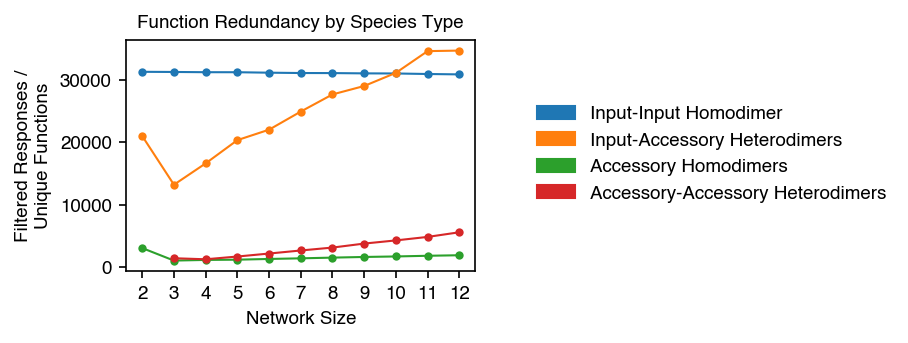

In [171]:
save = False

fig, ax = plt.subplots(figsize=(3,2))
cmap = plt.get_cmap('tab10')

for species_type_i in range(4):
    ax.plot(m_list,np.divide(num_filtered_curves_by_species_type_by_m[species_type_i],num_unique_voxels_by_species_type_by_m[species_type_i]),\
                marker='.',linestyle='-',markersize=8,linewidth=1,markeredgewidth=0,color=cmap(species_type_i),alpha=1)

_ = ax.set_xlabel('Network Size')
_ = ax.set_ylabel('Filtered Responses /\nUnique Functions')
_ = ax.set_title(f'Function Redundancy by Species Type')
_ = ax.set_xticks(m_list)
_ = ax.set_xticklabels([str(x) for x in m_list])

patches={}
patches['input_input_homodimer'] = mpatches.Patch(color=cmap(0),label=f'Input-Input Homodimer')
patches['input_acc_heterodimers'] = mpatches.Patch(color=cmap(1),label=f'Input-Accessory Heterodimers')
patches['acc_acc_homodimers'] = mpatches.Patch(color=cmap(2),label=f'Accessory Homodimers')
patches['acc_acc_heterodimers'] = mpatches.Patch(color=cmap(3),label=f'Accessory-Accessory Heterodimers')

leg = fig.legend(bbox_to_anchor=(1, 0.5), loc='center left',facecolor='none',\
    handles=list(patches.values()),\
    edgecolor='none')

if save:
    filename = f'redundancy_by_species_type_1D'
    #
    plt.savefig(str(pathlib.Path(out_dir,filename+'.pdf')),transparent=True,bbox_inches='tight')
    fig.patch.set_facecolor('white')
    plt.savefig(str(pathlib.Path(out_dir,filename+'.png')),dpi=900,bbox_inches='tight')

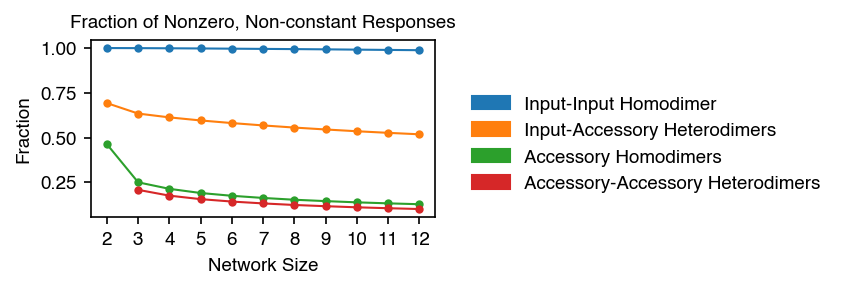

In [177]:
save = True

fig, ax = plt.subplots(figsize=(3,2))
cmap = plt.get_cmap('tab10')

for species_type_i in range(4):
    ax.plot(m_list,fraction_passed_filter_by_species_type_by_m[species_type_i],\
                marker='.',linestyle='-',markersize=8,linewidth=1,markeredgewidth=0,color=cmap(species_type_i),alpha=1)

_ = ax.set_xlabel('Network Size')
_ = ax.set_ylabel('Fraction')
_ = ax.set_title('Fraction of Nonzero, Non-constant Responses')
_ = ax.set_xticks(m_list)
_ = ax.set_xticklabels([str(x) for x in m_list])

patches={}
patches['input_input_homodimer'] = mpatches.Patch(color=cmap(0),label=f'Input-Input Homodimer')
patches['input_acc_heterodimers'] = mpatches.Patch(color=cmap(1),label=f'Input-Accessory Heterodimers')
patches['acc_acc_homodimers'] = mpatches.Patch(color=cmap(2),label=f'Accessory Homodimers')
patches['acc_acc_heterodimers'] = mpatches.Patch(color=cmap(3),label=f'Accessory-Accessory Heterodimers')

leg = fig.legend(bbox_to_anchor=(1, 0.5), loc='center left',facecolor='none',\
    handles=list(patches.values()),\
    edgecolor='none')

if save:
    filename = f'fraction_passed_filter_by_species_type_1D'
    #
    plt.savefig(str(pathlib.Path(out_dir,filename+'.pdf')),transparent=True,bbox_inches='tight')
    fig.patch.set_facecolor('white')
    plt.savefig(str(pathlib.Path(out_dir,filename+'.png')),dpi=900,bbox_inches='tight')

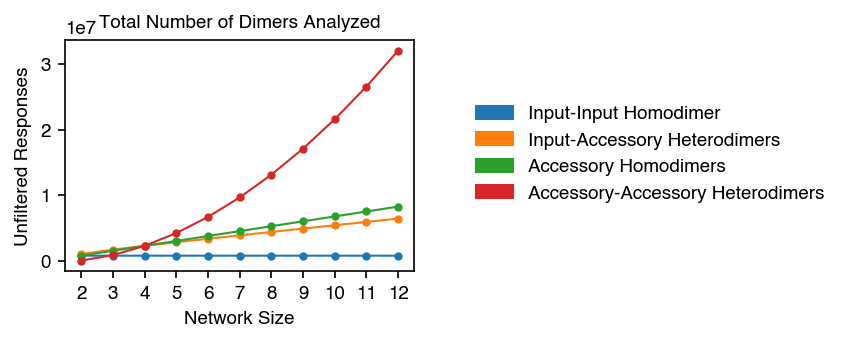

In [175]:
save = False

fig, ax = plt.subplots(figsize=(3,2))
cmap = plt.get_cmap('tab10')

for species_type_i in range(4):
    ax.plot(m_list,num_unfiltered_curves_by_species_type_by_m[species_type_i],\
                marker='.',linestyle='-',markersize=8,linewidth=1,markeredgewidth=0,color=cmap(species_type_i),alpha=1)

_ = ax.set_xlabel('Network Size')
_ = ax.set_ylabel('Unfiltered Responses')
_ = ax.set_title(f'Total Number of Dimers Analyzed')
_ = ax.set_xticks(m_list)
_ = ax.set_xticklabels([str(x) for x in m_list])

patches={}
patches['input_input_homodimer'] = mpatches.Patch(color=cmap(0),label=f'Input-Input Homodimer')
patches['input_acc_heterodimers'] = mpatches.Patch(color=cmap(1),label=f'Input-Accessory Heterodimers')
patches['acc_acc_homodimers'] = mpatches.Patch(color=cmap(2),label=f'Accessory Homodimers')
patches['acc_acc_heterodimers'] = mpatches.Patch(color=cmap(3),label=f'Accessory-Accessory Heterodimers')

leg = fig.legend(bbox_to_anchor=(1, 0.5), loc='center left',facecolor='none',\
    handles=list(patches.values()),\
    edgecolor='none')

if save:
    filename = f'num_unfiltered_curves_by_species_type_1D'
    #
    plt.savefig(str(pathlib.Path(out_dir,filename+'.pdf')),transparent=True,bbox_inches='tight')
    fig.patch.set_facecolor('white')
    plt.savefig(str(pathlib.Path(out_dir,filename+'.png')),dpi=900,bbox_inches='tight')

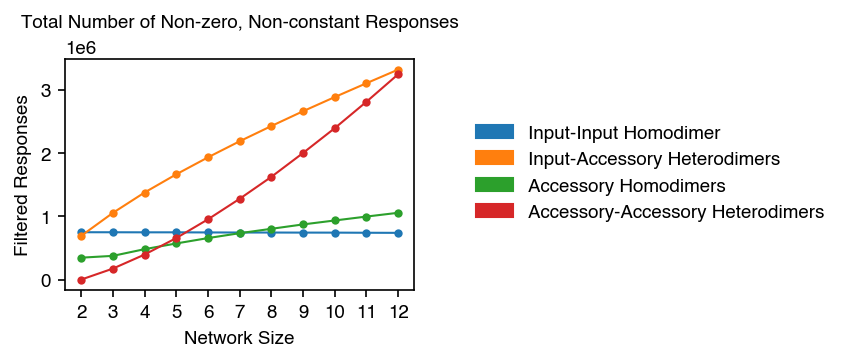

In [176]:
save = False

fig, ax = plt.subplots(figsize=(3,2))
cmap = plt.get_cmap('tab10')

for species_type_i in range(4):
    ax.plot(m_list,num_filtered_curves_by_species_type_by_m[species_type_i],\
                marker='.',linestyle='-',markersize=8,linewidth=1,markeredgewidth=0,color=cmap(species_type_i),alpha=1)

_ = ax.set_xlabel('Network Size')
_ = ax.set_ylabel('Filtered Responses')
_ = ax.set_title(f'Total Number of Non-zero, Non-constant Responses')
_ = ax.set_xticks(m_list)
_ = ax.set_xticklabels([str(x) for x in m_list])

patches={}
patches['input_input_homodimer'] = mpatches.Patch(color=cmap(0),label=f'Input-Input Homodimer')
patches['input_acc_heterodimers'] = mpatches.Patch(color=cmap(1),label=f'Input-Accessory Heterodimers')
patches['acc_acc_homodimers'] = mpatches.Patch(color=cmap(2),label=f'Accessory Homodimers')
patches['acc_acc_heterodimers'] = mpatches.Patch(color=cmap(3),label=f'Accessory-Accessory Heterodimers')

leg = fig.legend(bbox_to_anchor=(1, 0.5), loc='center left',facecolor='none',\
    handles=list(patches.values()),\
    edgecolor='none')

if save:
    filename = f'num_filtered_curves_by_species_type_1D'
    #
    plt.savefig(str(pathlib.Path(out_dir,filename+'.pdf')),transparent=True,bbox_inches='tight')
    fig.patch.set_facecolor('white')
    plt.savefig(str(pathlib.Path(out_dir,filename+'.png')),dpi=900,bbox_inches='tight')

## Unpublished: Two-input Expressivity Statistics by Network Size

In [178]:
num_unique_voxels_by_m = np.load(str(pathlib.Path(load_dir,'param_screen_analysis_2D',f'num_unique_voxels_by_m.npy')),allow_pickle=True)

In [186]:
# Load, if necessary
S_all_filenames_by_m = np.load(str(pathlib.Path(load_dir,'param_screen_2D','S_all_filenames_by_m.npy')),allow_pickle=True)
all_curves_per_Sall_chunk_by_m = np.load(str(pathlib.Path(load_dir,'param_screen_2D','all_curves_per_Sall_chunk_by_m.npy')),allow_pickle=True)
unfiltered_curves_per_Sall_chunk_by_m = np.load(str(pathlib.Path(load_dir,'param_screen_2D','unfiltered_curves_per_Sall_chunk_by_m.npy')),allow_pickle=True)
nonzero_curves_per_Sall_chunk_by_m = np.load(str(pathlib.Path(load_dir,'param_screen_2D','nonzero_curves_per_Sall_chunk_by_m.npy')),allow_pickle=True)
filtered_curves_per_Sall_chunk_by_m = np.load(str(pathlib.Path(load_dir,'param_screen_2D','filtered_curves_per_Sall_chunk_by_m.npy')),allow_pickle=True)

num_unique_voxels_by_species_type_by_m = np.load(str(pathlib.Path(load_dir,'param_screen_analysis_2D',f'num_unique_voxels_by_species_type_by_m.npy')),allow_pickle=True)
num_unfiltered_curves_by_species_type_by_m = np.load(str(pathlib.Path(load_dir,'param_screen_analysis_2D',f'num_unfiltered_curves_by_species_type_by_m.npy')),allow_pickle=True)
num_filtered_curves_by_species_type_by_m = np.load(str(pathlib.Path(load_dir,'param_screen_analysis_2D',f'num_filtered_curves_by_species_type_by_m.npy')),allow_pickle=True)
fraction_passed_filter_by_species_type_by_m = np.load(str(pathlib.Path(load_dir,'param_screen_analysis_2D',f'fraction_passed_filter_by_species_type_by_m.npy')),allow_pickle=True)

num_unfiltered_curves_by_m = [np.sum(unfiltered_curves_per_Sall_chunk_by_m[m_i]) for m_i, m in enumerate(m_list)]
num_nonzero_curves_by_m = [np.sum(nonzero_curves_per_Sall_chunk_by_m[m_i]) for m_i, m in enumerate(m_list)]
num_filtered_curves_by_m = [np.sum(filtered_curves_per_Sall_chunk_by_m[m_i]) for m_i, m in enumerate(m_list)]

fraction_passed_filtering_by_m = np.divide(num_filtered_curves_by_m,num_unfiltered_curves_by_m)
fraction_nonzero = np.divide(num_nonzero_curves_by_m,num_unfiltered_curves_by_m)
fraction_nonzero_constant = np.divide(np.array(num_nonzero_curves_by_m)-np.array(num_filtered_curves_by_m),num_unfiltered_curves_by_m)

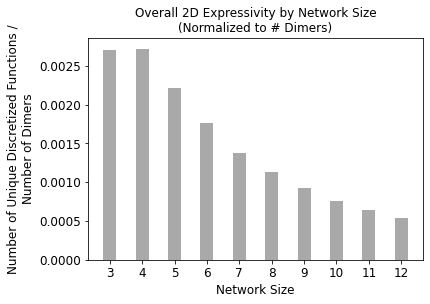

In [69]:
save = False

fig, ax = plt.subplots(figsize=(3,2))

ax.bar(m_list,[num_unique_voxels_by_m[m_i]/num_unfiltered_curves_by_m[m_i]\
               for m_i in range(len(m_list))],width=0.4,color='darkgray')

_ = ax.set_xlabel('Network Size')
_ = ax.set_ylabel('Number of Unique Discretized Functions /\nNumber of Dimers')
_ = ax.set_title('Overall 2D Expressivity by Network Size\n(Normalized to # Dimers)')
_ = ax.set_xticks(m_list)
_ = ax.set_xticklabels([str(m) for m in m_list])

if save:
    filename = f'Fig4Unpublished_num_unique_voxels_by_network_size_unfilt_normalized_2D'
    #
    plt.savefig(str(pathlib.Path(out_dir,filename+'.pdf')),transparent=True,bbox_inches='tight')
    fig.patch.set_facecolor('white')
    plt.savefig(str(pathlib.Path(out_dir,filename+'.png')),dpi=900,bbox_inches='tight')

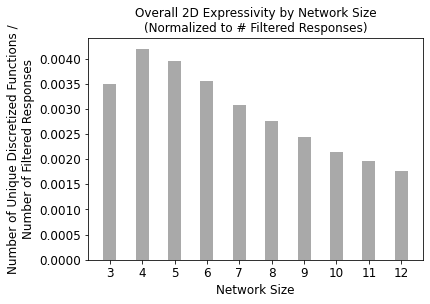

In [70]:
save = False

fig, ax = plt.subplots(figsize=(3,2))

ax.bar(m_list,[num_unique_voxels_by_m[m_i]/num_filtered_curves_by_m[m_i]\
               for m_i in range(len(m_list))],width=0.4,color='darkgray')

_ = ax.set_xlabel('Network Size')
_ = ax.set_ylabel('Number of Unique Discretized Functions /\nNumber of Filtered Responses')
_ = ax.set_title('Overall 2D Expressivity by Network Size\n(Normalized to # Filtered Responses)')
_ = ax.set_xticks(m_list)
_ = ax.set_xticklabels([str(m) for m in m_list])

if save:
    filename = f'Fig4Unpublished_num_unique_voxels_by_network_size_filt_normalized_2D'
    #
    plt.savefig(str(pathlib.Path(out_dir,filename+'.pdf')),transparent=True,bbox_inches='tight')
    fig.patch.set_facecolor('white')
    plt.savefig(str(pathlib.Path(out_dir,filename+'.png')),dpi=900,bbox_inches='tight')

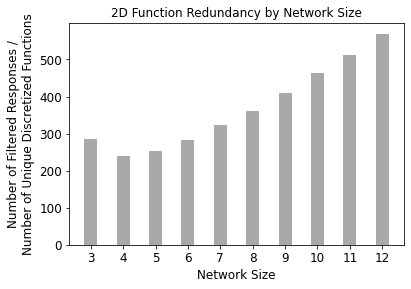

In [71]:
save = False

fig, ax = plt.subplots(figsize=(3,2))

ax.bar(m_list,[num_filtered_curves_by_m[m_i]/num_unique_voxels_by_m[m_i]\
               for m_i in range(len(m_list))],width=0.4,color='darkgray')

_ = ax.set_xlabel('Network Size')
_ = ax.set_ylabel('Number of Filtered Responses /\nNumber of Unique Discretized Functions')
_ = ax.set_title('2D Function Redundancy by Network Size')
_ = ax.set_xticks(m_list)
_ = ax.set_xticklabels([str(m) for m in m_list])

if save:
    filename = f'Fig4Unpublished_redundancy_by_network_size_2D'
    #
    plt.savefig(str(pathlib.Path(out_dir,filename+'.pdf')),transparent=True,bbox_inches='tight')
    fig.patch.set_facecolor('white')
    plt.savefig(str(pathlib.Path(out_dir,filename+'.png')),dpi=900,bbox_inches='tight')

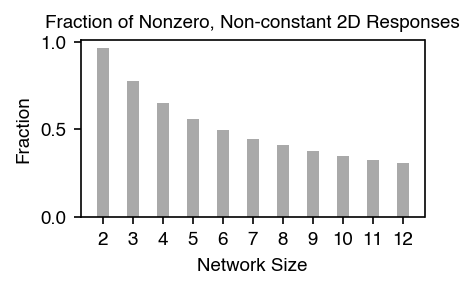

In [182]:
save = True

fig, ax = plt.subplots(figsize=(3,2))

ax.bar(m_list,fraction_passed_filtering_by_m,width=0.4,color='darkgray')

_ = ax.set_xlabel('Network Size')
_ = ax.set_ylabel('Fraction')
_ = ax.set_title('Fraction of Nonzero, Non-constant 2D Responses')
_ = ax.set_xticks(m_list)
_ = ax.set_xticklabels([str(m) for m in m_list])

if save:
    filename = f'Fig4Unpublished_fraction_passed_filter_by_network_size_2D'
    #
    plt.savefig(str(pathlib.Path(out_dir,filename+'.pdf')),transparent=True,bbox_inches='tight')
    fig.patch.set_facecolor('white')
    plt.savefig(str(pathlib.Path(out_dir,filename+'.png')),dpi=900,bbox_inches='tight')

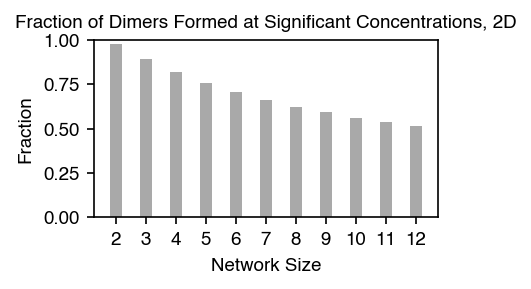

In [185]:
save = True

fig, ax = plt.subplots(figsize=(3,2))

ax.bar(m_list,fraction_nonzero,width=0.4,color='darkgray')

_ = ax.set_xlabel('Network Size')
_ = ax.set_ylabel('Fraction')
_ = ax.set_title('Fraction of Dimers Formed at Significant Concentrations, 2D')
_ = ax.set_xticks(m_list)
_ = ax.set_xticklabels([str(m) for m in m_list])
_ = ax.set_ylim([0,1])

if save:
    filename = f'Fig4Unpublished_fraction_nonzero_by_network_size_2D'
    #
    plt.savefig(str(pathlib.Path(out_dir,filename+'.pdf')),transparent=True,bbox_inches='tight')
    fig.patch.set_facecolor('white')
    plt.savefig(str(pathlib.Path(out_dir,filename+'.png')),dpi=900,bbox_inches='tight')

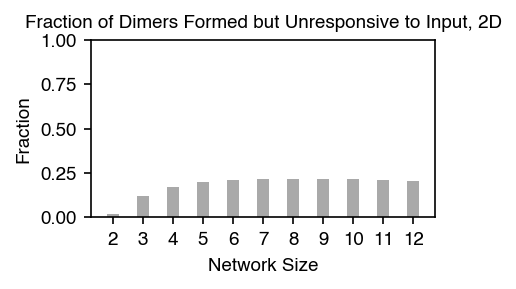

In [183]:
save = True

fig, ax = plt.subplots(figsize=(3,2))

ax.bar(m_list,fraction_nonzero_constant,width=0.4,color='darkgray')

_ = ax.set_xlabel('Network Size')
_ = ax.set_ylabel('Fraction')
_ = ax.set_title('Fraction of Dimers Formed but Unresponsive to Input, 2D')
_ = ax.set_xticks(m_list)
_ = ax.set_xticklabels([str(m) for m in m_list])
_ = ax.set_ylim([0,1])

if save:
    filename = f'Fig4Unpublished_fraction_nonzero_constant_by_network_size_2D'
    #
    plt.savefig(str(pathlib.Path(out_dir,filename+'.pdf')),transparent=True,bbox_inches='tight')
    fig.patch.set_facecolor('white')
    plt.savefig(str(pathlib.Path(out_dir,filename+'.png')),dpi=900,bbox_inches='tight')

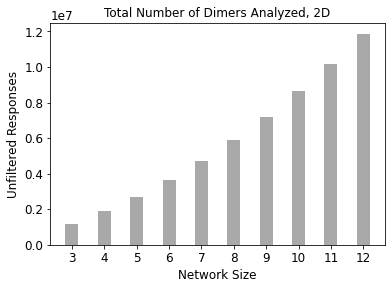

In [75]:
save = False

fig, ax = plt.subplots(figsize=(3,2))

ax.bar(m_list,num_unfiltered_curves_by_m,width=0.4,color='darkgray')

_ = ax.set_xlabel('Network Size')
_ = ax.set_ylabel('Unfiltered Responses')
_ = ax.set_title('Total Number of Dimers Analyzed, 2D')
_ = ax.set_xticks(m_list)
_ = ax.set_xticklabels([str(m) for m in m_list])

if save:
    filename = f'Fig4Unpublished_num_unfiltered_curves_by_network_size_2D'
    #
    plt.savefig(str(pathlib.Path(out_dir,filename+'.pdf')),transparent=True,bbox_inches='tight')
    fig.patch.set_facecolor('white')
    plt.savefig(str(pathlib.Path(out_dir,filename+'.png')),dpi=900,bbox_inches='tight')

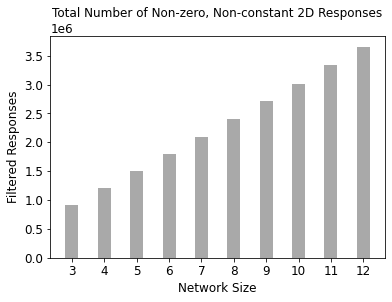

In [76]:
save = False

fig, ax = plt.subplots(figsize=(3,2))

ax.bar(m_list,num_filtered_curves_by_m,width=0.4,color='darkgray')

_ = ax.set_xlabel('Network Size')
_ = ax.set_ylabel('Filtered Responses')
_ = ax.set_title('Total Number of Non-zero, Non-constant 2D Responses')
_ = ax.set_xticks(m_list)
_ = ax.set_xticklabels([str(m) for m in m_list])

if save:
    filename = f'Fig4Unpublished_num_filtered_curves_by_network_size_2D'
    #
    plt.savefig(str(pathlib.Path(out_dir,filename+'.pdf')),transparent=True,bbox_inches='tight')
    fig.patch.set_facecolor('white')
    plt.savefig(str(pathlib.Path(out_dir,filename+'.png')),dpi=900,bbox_inches='tight')

Now, data disaggregated by species type:

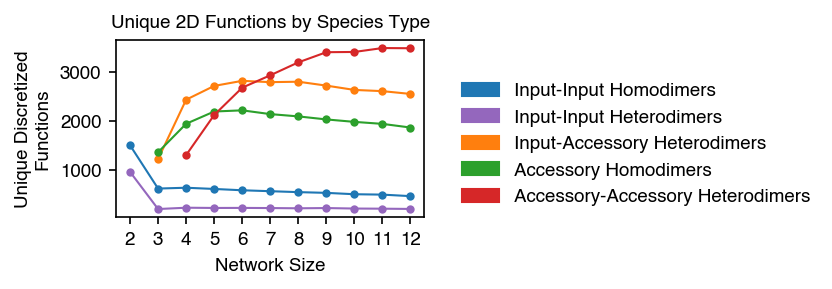

In [199]:
save = True

fig, ax = plt.subplots(figsize=(3,2))
cmap = plt.get_cmap('tab10')
cmap = mcolors.ListedColormap([cmap(0),cmap(4),cmap(1),cmap(2),cmap(3)])

for species_type_i in range(5):
    where_not_zero = np.where(num_unique_voxels_by_species_type_by_m[species_type_i]!=0)[0]
    ax.plot(np.array(m_list)[where_not_zero],\
            num_unique_voxels_by_species_type_by_m[species_type_i][where_not_zero],\
                marker='.',linestyle='-',markersize=8,linewidth=1,markeredgewidth=0,color=cmap(species_type_i),alpha=1)

_ = ax.set_xlabel('Network Size')
_ = ax.set_ylabel('Unique Discretized\nFunctions')
_ = ax.set_title(f'Unique 2D Functions by Species Type')
_ = ax.set_xticks(m_list)
_ = ax.set_xticklabels([str(x) for x in m_list])

patches={}
patches['input_input_homodimers'] = mpatches.Patch(color=cmap(0),label=f'Input-Input Homodimers')
patches['input_input_heterodimers'] = mpatches.Patch(color=cmap(1),label=f'Input-Input Heterodimers')
patches['input_acc_heterodimers'] = mpatches.Patch(color=cmap(2),label=f'Input-Accessory Heterodimers')
patches['acc_acc_homodimers'] = mpatches.Patch(color=cmap(3),label=f'Accessory Homodimers')
patches['acc_acc_heterodimers'] = mpatches.Patch(color=cmap(4),label=f'Accessory-Accessory Heterodimers')

leg = fig.legend(bbox_to_anchor=(1, 0.5), loc='center left',facecolor='none',\
    handles=list(patches.values()),\
    edgecolor='none')

if save:
    filename = f'num_unique_voxels_by_species_type_2D'
    #
    plt.savefig(str(pathlib.Path(out_dir,filename+'.pdf')),transparent=True,bbox_inches='tight')
    fig.patch.set_facecolor('white')
    plt.savefig(str(pathlib.Path(out_dir,filename+'.png')),dpi=900,bbox_inches='tight')

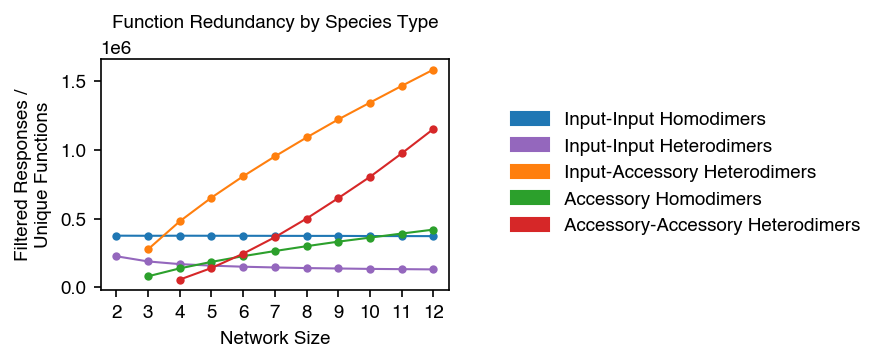

In [200]:
save = False

fig, ax = plt.subplots(figsize=(3,2))
cmap = plt.get_cmap('tab10')
cmap = mcolors.ListedColormap([cmap(0),cmap(4),cmap(1),cmap(2),cmap(3)])

for species_type_i in range(5):
    where_not_zero = np.where(num_filtered_curves_by_species_type_by_m[species_type_i]!=0)[0]
    ax.plot(np.array(m_list)[where_not_zero],\
            num_filtered_curves_by_species_type_by_m[species_type_i][where_not_zero],\
                marker='.',linestyle='-',markersize=8,linewidth=1,markeredgewidth=0,color=cmap(species_type_i),alpha=1)

_ = ax.set_xlabel('Network Size')
_ = ax.set_ylabel('Filtered Responses /\nUnique Functions')
_ = ax.set_title(f'Function Redundancy by Species Type')
_ = ax.set_xticks(m_list)
_ = ax.set_xticklabels([str(x) for x in m_list])

patches={}
patches['input_input_homodimers'] = mpatches.Patch(color=cmap(0),label=f'Input-Input Homodimers')
patches['input_input_heterodimers'] = mpatches.Patch(color=cmap(1),label=f'Input-Input Heterodimers')
patches['input_acc_heterodimers'] = mpatches.Patch(color=cmap(2),label=f'Input-Accessory Heterodimers')
patches['acc_acc_homodimers'] = mpatches.Patch(color=cmap(3),label=f'Accessory Homodimers')
patches['acc_acc_heterodimers'] = mpatches.Patch(color=cmap(4),label=f'Accessory-Accessory Heterodimers')

leg = fig.legend(bbox_to_anchor=(1, 0.5), loc='center left',facecolor='none',\
    handles=list(patches.values()),\
    edgecolor='none')

if save:
    filename = f'redundancy_by_species_type_2D'
    #
    plt.savefig(str(pathlib.Path(out_dir,filename+'.pdf')),transparent=True,bbox_inches='tight')
    fig.patch.set_facecolor('white')
    plt.savefig(str(pathlib.Path(out_dir,filename+'.png')),dpi=900,bbox_inches='tight')

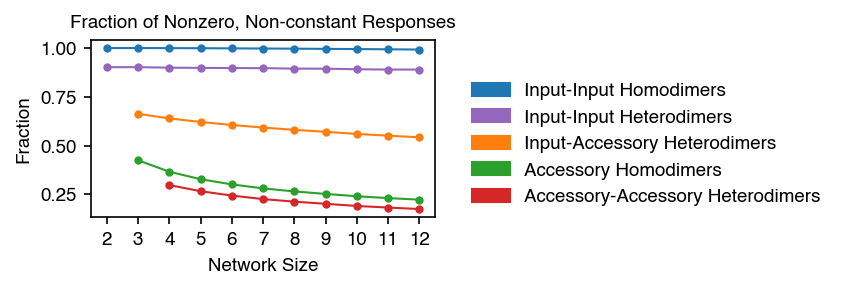

In [201]:
save = True

fig, ax = plt.subplots(figsize=(3,2))
cmap = plt.get_cmap('tab10')
cmap = mcolors.ListedColormap([cmap(0),cmap(4),cmap(1),cmap(2),cmap(3)])

for species_type_i in range(5):
    where_not_zero = np.where(fraction_passed_filter_by_species_type_by_m[species_type_i]!=0)[0]
    ax.plot(np.array(m_list)[where_not_zero],\
            fraction_passed_filter_by_species_type_by_m[species_type_i][where_not_zero],\
                marker='.',linestyle='-',markersize=8,linewidth=1,markeredgewidth=0,color=cmap(species_type_i),alpha=1)

_ = ax.set_xlabel('Network Size')
_ = ax.set_ylabel('Fraction')
_ = ax.set_title('Fraction of Nonzero, Non-constant Responses')
_ = ax.set_xticks(m_list)
_ = ax.set_xticklabels([str(x) for x in m_list])

patches={}
patches['input_input_homodimers'] = mpatches.Patch(color=cmap(0),label=f'Input-Input Homodimers')
patches['input_input_heterodimers'] = mpatches.Patch(color=cmap(1),label=f'Input-Input Heterodimers')
patches['input_acc_heterodimers'] = mpatches.Patch(color=cmap(2),label=f'Input-Accessory Heterodimers')
patches['acc_acc_homodimers'] = mpatches.Patch(color=cmap(3),label=f'Accessory Homodimers')
patches['acc_acc_heterodimers'] = mpatches.Patch(color=cmap(4),label=f'Accessory-Accessory Heterodimers')

leg = fig.legend(bbox_to_anchor=(1, 0.5), loc='center left',facecolor='none',\
    handles=list(patches.values()),\
    edgecolor='none')

if save:
    filename = f'fraction_passed_filter_by_species_type_2D'
    #
    plt.savefig(str(pathlib.Path(out_dir,filename+'.pdf')),transparent=True,bbox_inches='tight')
    fig.patch.set_facecolor('white')
    plt.savefig(str(pathlib.Path(out_dir,filename+'.png')),dpi=900,bbox_inches='tight')

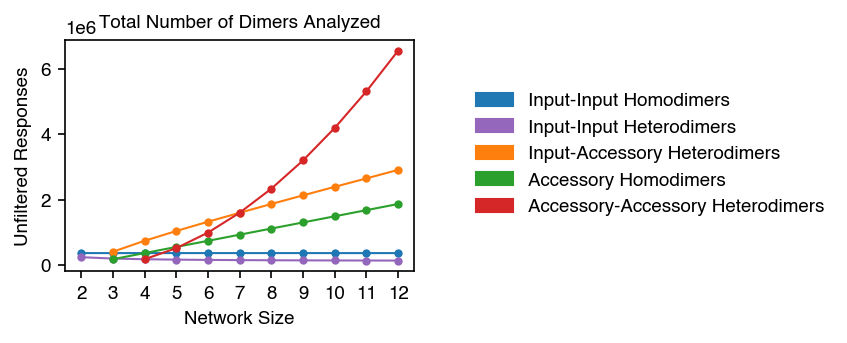

In [202]:
save = False

fig, ax = plt.subplots(figsize=(3,2))
cmap = plt.get_cmap('tab10')
cmap = mcolors.ListedColormap([cmap(0),cmap(4),cmap(1),cmap(2),cmap(3)])

for species_type_i in range(5):
    where_not_zero = np.where(num_unfiltered_curves_by_species_type_by_m[species_type_i]!=0)[0]
    ax.plot(np.array(m_list)[where_not_zero],\
            num_unfiltered_curves_by_species_type_by_m[species_type_i][where_not_zero],\
                marker='.',linestyle='-',markersize=8,linewidth=1,markeredgewidth=0,color=cmap(species_type_i),alpha=1)

_ = ax.set_xlabel('Network Size')
_ = ax.set_ylabel('Unfiltered Responses')
_ = ax.set_title(f'Total Number of Dimers Analyzed')
_ = ax.set_xticks(m_list)
_ = ax.set_xticklabels([str(x) for x in m_list])

patches={}
patches['input_input_homodimers'] = mpatches.Patch(color=cmap(0),label=f'Input-Input Homodimers')
patches['input_input_heterodimers'] = mpatches.Patch(color=cmap(1),label=f'Input-Input Heterodimers')
patches['input_acc_heterodimers'] = mpatches.Patch(color=cmap(2),label=f'Input-Accessory Heterodimers')
patches['acc_acc_homodimers'] = mpatches.Patch(color=cmap(3),label=f'Accessory Homodimers')
patches['acc_acc_heterodimers'] = mpatches.Patch(color=cmap(4),label=f'Accessory-Accessory Heterodimers')

leg = fig.legend(bbox_to_anchor=(1, 0.5), loc='center left',facecolor='none',\
    handles=list(patches.values()),\
    edgecolor='none')

if save:
    filename = f'num_unfiltered_curves_by_species_type_2D'
    #
    plt.savefig(str(pathlib.Path(out_dir,filename+'.pdf')),transparent=True,bbox_inches='tight')
    fig.patch.set_facecolor('white')
    plt.savefig(str(pathlib.Path(out_dir,filename+'.png')),dpi=900,bbox_inches='tight')

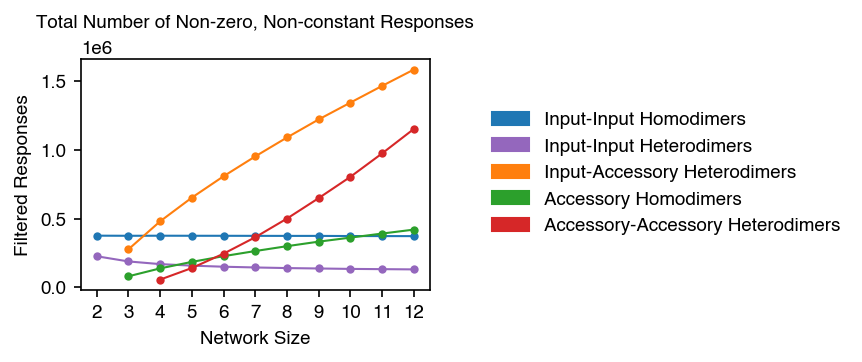

In [203]:
save = False

fig, ax = plt.subplots(figsize=(3,2))
cmap = plt.get_cmap('tab10')
cmap = mcolors.ListedColormap([cmap(0),cmap(4),cmap(1),cmap(2),cmap(3)])

for species_type_i in range(5):
    where_not_zero = np.where(num_filtered_curves_by_species_type_by_m[species_type_i]!=0)[0]
    ax.plot(np.array(m_list)[where_not_zero],\
            num_filtered_curves_by_species_type_by_m[species_type_i][where_not_zero],\
                marker='.',linestyle='-',markersize=8,linewidth=1,markeredgewidth=0,color=cmap(species_type_i),alpha=1)

_ = ax.set_xlabel('Network Size')
_ = ax.set_ylabel('Filtered Responses')
_ = ax.set_title(f'Total Number of Non-zero, Non-constant Responses')
_ = ax.set_xticks(m_list)
_ = ax.set_xticklabels([str(x) for x in m_list])

patches={}
patches['input_input_homodimers'] = mpatches.Patch(color=cmap(0),label=f'Input-Input Homodimers')
patches['input_input_heterodimers'] = mpatches.Patch(color=cmap(1),label=f'Input-Input Heterodimers')
patches['input_acc_heterodimers'] = mpatches.Patch(color=cmap(2),label=f'Input-Accessory Heterodimers')
patches['acc_acc_homodimers'] = mpatches.Patch(color=cmap(3),label=f'Accessory Homodimers')
patches['acc_acc_heterodimers'] = mpatches.Patch(color=cmap(4),label=f'Accessory-Accessory Heterodimers')

leg = fig.legend(bbox_to_anchor=(1, 0.5), loc='center left',facecolor='none',\
    handles=list(patches.values()),\
    edgecolor='none')

if save:
    filename = f'num_filtered_curves_by_species_type_2D'
    #
    plt.savefig(str(pathlib.Path(out_dir,filename+'.pdf')),transparent=True,bbox_inches='tight')
    fig.patch.set_facecolor('white')
    plt.savefig(str(pathlib.Path(out_dir,filename+'.png')),dpi=900,bbox_inches='tight')

## Unpublished: One-input Expressivity Statistics by Network Connectivity

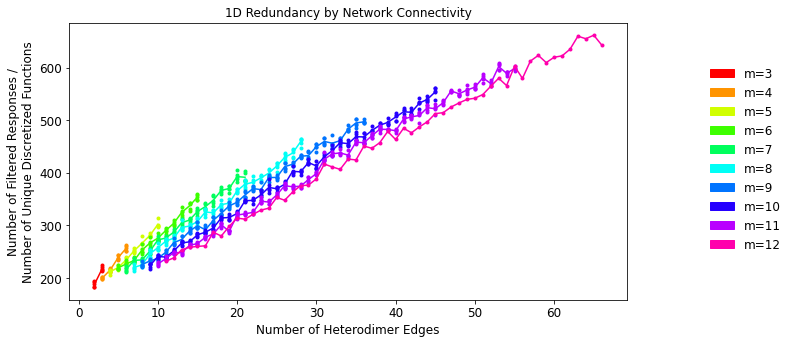

In [ ]:
save = False

fig, ax = plt.subplots(figsize=(10,5))
cmap = plt.get_cmap('gist_rainbow')

for m_i,m in enumerate(m_list):
    hetero_edges_list = np.load(str(pathlib.Path(load_dir,'param_screen_analysis_1D',f'{m}M_hetero_edges_list.npy')),allow_pickle=True)
    redundancy_by_hetero_edges = np.load(str(pathlib.Path(load_dir,'param_screen_analysis_1D',f'{m}M_redundancy_by_hetero_edges.npy')),allow_pickle=True)
    if m == m_list[-1]:
        num_bootstrap_samples_temp = 1
    else:
        num_bootstrap_samples_temp = num_bootstrap_samples
    x_vals = list(itertools.chain.from_iterable([[x for i in range(num_bootstrap_samples_temp)] for x in hetero_edges_list]))
    y_val_means = [np.mean(x) for x in redundancy_by_hetero_edges]
    ax.plot(x_vals,list(itertools.chain.from_iterable(redundancy_by_hetero_edges)),\
            marker='.',linestyle='',markersize=8,markeredgewidth=0,color=cmap(m_i/(len(m_list))),alpha=1)
    ax.plot(hetero_edges_list,y_val_means,\
            marker='',linestyle='-',color=cmap(m_i/(len(m_list))),alpha=1)

_ = ax.set_xlabel('Number of Heterodimer Edges')
_ = ax.set_ylabel('Number of Filtered Responses /\nNumber of Unique Discretized Functions')
_ = ax.set_title(f'1D Redundancy by Network Connectivity')

patches={}
for m_i,m in enumerate(m_list):
    patches[f'm={m}'] = mpatches.Patch(color=cmap(m_i/(len(m_list))),label=f'm={m}')

leg = fig.legend(bbox_to_anchor=(1, 0.5), loc='center left',facecolor='none',\
    handles=list(patches.values()),\
    edgecolor='none')

if save:
    filename = f'Fig4Unpublished_redundancy_by_hetero_edges_1D'
    #
    plt.savefig(str(pathlib.Path(out_dir,filename+'.pdf')),transparent=True,bbox_inches='tight')
    fig.patch.set_facecolor('white')
    plt.savefig(str(pathlib.Path(out_dir,filename+'.png')),dpi=900,bbox_inches='tight')

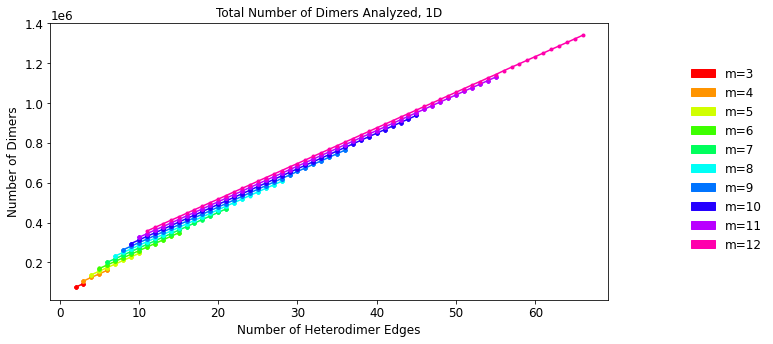

In [ ]:
save = False

fig, ax = plt.subplots(figsize=(10,5))
cmap = plt.get_cmap('gist_rainbow')

for m_i,m in enumerate(m_list):
    hetero_edges_list = np.load(str(pathlib.Path(load_dir,'param_screen_analysis_1D',f'{m}M_hetero_edges_list.npy')),allow_pickle=True)
    num_unfiltered_curves_by_hetero_edges = np.load(str(pathlib.Path(load_dir,'param_screen_analysis_1D',f'{m}M_unfiltered_curves_by_hetero_edges.npy')),allow_pickle=True)
    if m == m_list[-1]:
        num_bootstrap_samples_temp = 1
    else:
        num_bootstrap_samples_temp = num_bootstrap_samples
    x_vals = list(itertools.chain.from_iterable([[x for i in range(num_bootstrap_samples_temp)] for x in hetero_edges_list]))
    y_val_means = [np.mean(x) for x in num_unfiltered_curves_by_hetero_edges]
    ax.plot(x_vals,list(itertools.chain.from_iterable(num_unfiltered_curves_by_hetero_edges)),\
            marker='.',linestyle='',markersize=8,markeredgewidth=0,color=cmap(m_i/(len(m_list))),alpha=1)
    ax.plot(hetero_edges_list,y_val_means,\
            marker='',linestyle='-',color=cmap(m_i/(len(m_list))),alpha=1)

_ = ax.set_xlabel('Number of Heterodimer Edges')
_ = ax.set_ylabel('Number of Dimers')
_ = ax.set_title(f'Total Number of Dimers Analyzed, 1D')

patches={}
for m_i,m in enumerate(m_list):
    patches[f'm={m}'] = mpatches.Patch(color=cmap(m_i/(len(m_list))),label=f'm={m}')

leg = fig.legend(bbox_to_anchor=(1, 0.5), loc='center left',facecolor='none',\
    handles=list(patches.values()),\
    edgecolor='none')

if save:
    filename = f'Fig4Unpublished_num_unfiltered_curves_by_hetero_edges_1D'
    #
    plt.savefig(str(pathlib.Path(out_dir,filename+'.pdf')),transparent=True,bbox_inches='tight')
    fig.patch.set_facecolor('white')
    plt.savefig(str(pathlib.Path(out_dir,filename+'.png')),dpi=900,bbox_inches='tight')

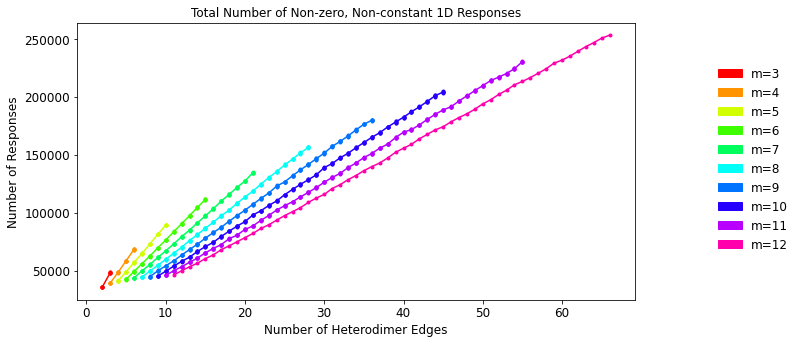

In [ ]:
save = False

fig, ax = plt.subplots(figsize=(10,5))
cmap = plt.get_cmap('gist_rainbow')

for m_i,m in enumerate(m_list):
    hetero_edges_list = np.load(str(pathlib.Path(load_dir,'param_screen_analysis_1D',f'{m}M_hetero_edges_list.npy')),allow_pickle=True)
    num_filtered_curves_by_hetero_edges = np.load(str(pathlib.Path(load_dir,'param_screen_analysis_1D',f'{m}M_filtered_curves_by_hetero_edges.npy')),allow_pickle=True)
    if m == m_list[-1]:
        num_bootstrap_samples_temp = 1
    else:
        num_bootstrap_samples_temp = num_bootstrap_samples
    x_vals = list(itertools.chain.from_iterable([[x for i in range(num_bootstrap_samples_temp)] for x in hetero_edges_list]))
    y_val_means = [np.mean(x) for x in num_filtered_curves_by_hetero_edges]
    ax.plot(x_vals,list(itertools.chain.from_iterable(num_filtered_curves_by_hetero_edges)),\
            marker='.',linestyle='',markersize=8,markeredgewidth=0,color=cmap(m_i/(len(m_list))),alpha=1)
    ax.plot(hetero_edges_list,y_val_means,\
            marker='',linestyle='-',color=cmap(m_i/(len(m_list))),alpha=1)

_ = ax.set_xlabel('Number of Heterodimer Edges')
_ = ax.set_ylabel('Number of Responses')
_ = ax.set_title(f'Total Number of Non-zero, Non-constant 1D Responses')

patches={}
for m_i,m in enumerate(m_list):
    patches[f'm={m}'] = mpatches.Patch(color=cmap(m_i/(len(m_list))),label=f'm={m}')

leg = fig.legend(bbox_to_anchor=(1, 0.5), loc='center left',facecolor='none',\
    handles=list(patches.values()),\
    edgecolor='none')

if save:
    filename = f'Fig4Unpublished_num_filtered_curves_by_hetero_edges_1D'
    #
    plt.savefig(str(pathlib.Path(out_dir,filename+'.pdf')),transparent=True,bbox_inches='tight')
    fig.patch.set_facecolor('white')
    plt.savefig(str(pathlib.Path(out_dir,filename+'.png')),dpi=900,bbox_inches='tight')

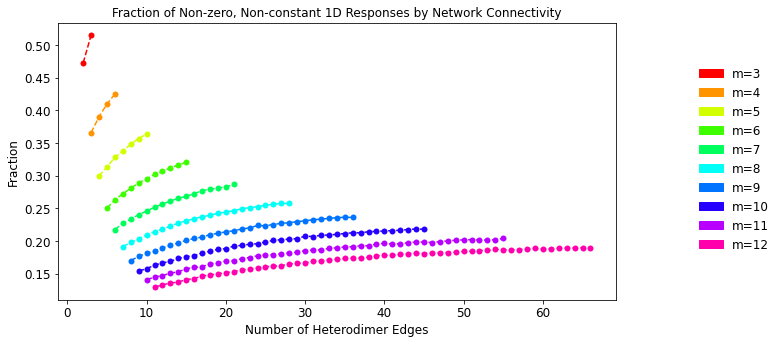

In [ ]:
save = False

fig, ax = plt.subplots(figsize=(10,5))
cmap = plt.get_cmap('gist_rainbow')

for m_i,m in enumerate(m_list):
    hetero_edges_list = np.load(str(pathlib.Path(load_dir,'param_screen_analysis_1D',f'{m}M_hetero_edges_list.npy')),allow_pickle=True)
    fraction_passed_filter_by_hetero_edges = np.load(str(pathlib.Path(load_dir,'param_screen_analysis_1D',f'{m}M_fraction_passed_filter_by_hetero_edges.npy')),allow_pickle=True)
    ax.plot(hetero_edges_list,fraction_passed_filter_by_hetero_edges,\
            marker='.',linestyle='--',markersize=12,markeredgewidth=0,color=cmap(m_i/(len(m_list))),alpha=1)

_ = ax.set_xlabel('Number of Heterodimer Edges')
_ = ax.set_ylabel('Fraction')
_ = ax.set_title('Fraction of Non-zero, Non-constant 1D Responses by Network Connectivity')

patches={}
for m_i,m in enumerate(m_list):
    patches[f'm={m}'] = mpatches.Patch(color=cmap(m_i/(len(m_list))),label=f'm={m}')

leg = fig.legend(bbox_to_anchor=(1, 0.5), loc='center left',facecolor='none',\
    handles=list(patches.values()),\
    edgecolor='none')

if save:
    filename = f'Fig4Unpublished_fraction_passed_filter_by_hetero_edges_1D'
    #
    plt.savefig(str(pathlib.Path(out_dir,filename+'.pdf')),transparent=True,bbox_inches='tight')
    fig.patch.set_facecolor('white')
    plt.savefig(str(pathlib.Path(out_dir,filename+'.png')),dpi=900,bbox_inches='tight')

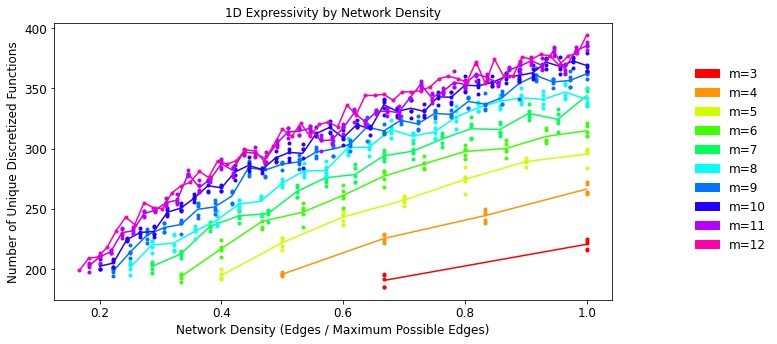

In [ ]:
save = False

fig, ax = plt.subplots(figsize=(3.5,1.75))
cmap = plt.get_cmap('gist_rainbow')

for m_i,m in enumerate(m_list):
    hetero_edges_list = np.load(str(pathlib.Path(load_dir,'param_screen_analysis_1D',f'{m}M_hetero_edges_list.npy')),allow_pickle=True)
    num_unique_voxels_by_hetero_edges = np.load(str(pathlib.Path(load_dir,'param_screen_analysis_1D',f'{m}M_num_unique_voxels_by_hetero_edges.npy')),allow_pickle=True)
    max_hetero_edges = num_combos(m,r=2)
    min_hetero_edges = m-1
    graph_density = [x/(max_hetero_edges) \
                               for x in list(range(min_hetero_edges,max_hetero_edges+1))]
    if m == m_list[-1]:
        num_bootstrap_samples_temp = 1
    else:
        num_bootstrap_samples_temp = num_bootstrap_samples
    x_vals = list(itertools.chain.from_iterable([[x for i in range(num_bootstrap_samples_temp)] for x in graph_density]))
    y_val_means = [np.mean(x) for x in num_unique_voxels_by_hetero_edges]
    ax.plot(x_vals,list(itertools.chain.from_iterable(num_unique_voxels_by_hetero_edges)),\
            marker='.',linestyle='',markersize=8,markeredgewidth=0,color=cmap(m_i/(len(m_list))),alpha=1)
    ax.plot(graph_density,y_val_means,\
            marker='',linestyle='-',color=cmap(m_i/(len(m_list))),alpha=1)

_ = ax.set_xlabel('Network Density (Edges / Maximum Possible Edges)')
_ = ax.set_ylabel('Number of Unique Discretized Functions')
_ = ax.set_title(f'1D Expressivity by Network Density')

patches={}
for m_i,m in enumerate(m_list):
    patches[f'm={m}'] = mpatches.Patch(color=cmap(m_i/(len(m_list))),label=f'm={m}')

leg = fig.legend(bbox_to_anchor=(1, 0.5), loc='center left',facecolor='none',\
    handles=list(patches.values()),\
    edgecolor='none')

if save:
    filename = f'Fig4Unpublished_num_unique_voxels_by_fraction_hetero_edges_1D'
    #
    plt.savefig(str(pathlib.Path(out_dir,filename+'.pdf')),transparent=True,bbox_inches='tight')
    fig.patch.set_facecolor('white')
    plt.savefig(str(pathlib.Path(out_dir,filename+'.png')),dpi=900,bbox_inches='tight')

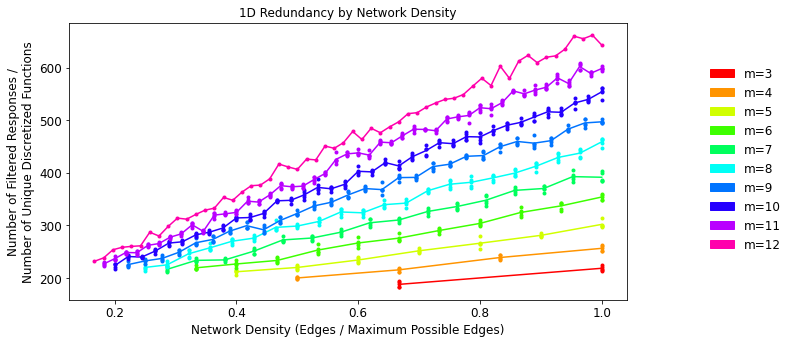

In [ ]:
save = False

fig, ax = plt.subplots(figsize=(10,5))
cmap = plt.get_cmap('gist_rainbow')

for m_i,m in enumerate(m_list):
    hetero_edges_list = np.load(str(pathlib.Path(load_dir,'param_screen_analysis_1D',f'{m}M_hetero_edges_list.npy')),allow_pickle=True)
    redundancy_by_hetero_edges = np.load(str(pathlib.Path(load_dir,'param_screen_analysis_1D',f'{m}M_redundancy_by_hetero_edges.npy')),allow_pickle=True)
    max_hetero_edges = num_combos(m,r=2)
    min_hetero_edges = m-1
    graph_density = [x/(max_hetero_edges) \
                               for x in list(range(min_hetero_edges,max_hetero_edges+1))]
    if m == m_list[-1]:
        num_bootstrap_samples_temp = 1
    else:
        num_bootstrap_samples_temp = num_bootstrap_samples
    x_vals = list(itertools.chain.from_iterable([[x for i in range(num_bootstrap_samples_temp)] for x in graph_density]))
    y_val_means = [np.mean(x) for x in redundancy_by_hetero_edges]
    ax.plot(x_vals,list(itertools.chain.from_iterable(redundancy_by_hetero_edges)),\
            marker='.',linestyle='',markersize=8,markeredgewidth=0,color=cmap(m_i/(len(m_list))),alpha=1)
    ax.plot(graph_density,y_val_means,\
            marker='',linestyle='-',color=cmap(m_i/(len(m_list))),alpha=1)

_ = ax.set_xlabel('Network Density (Edges / Maximum Possible Edges)')
_ = ax.set_ylabel('Number of Filtered Responses /\nNumber of Unique Discretized Functions')
_ = ax.set_title(f'1D Redundancy by Network Density')

patches={}
for m_i,m in enumerate(m_list):
    patches[f'm={m}'] = mpatches.Patch(color=cmap(m_i/(len(m_list))),label=f'm={m}')

leg = fig.legend(bbox_to_anchor=(1, 0.5), loc='center left',facecolor='none',\
    handles=list(patches.values()),\
    edgecolor='none')

if save:
    filename = f'Fig4Unpublished_redundancy_by_fraction_hetero_edges_1D'
    #
    plt.savefig(str(pathlib.Path(out_dir,filename+'.pdf')),transparent=True,bbox_inches='tight')
    fig.patch.set_facecolor('white')
    plt.savefig(str(pathlib.Path(out_dir,filename+'.png')),dpi=900,bbox_inches='tight')

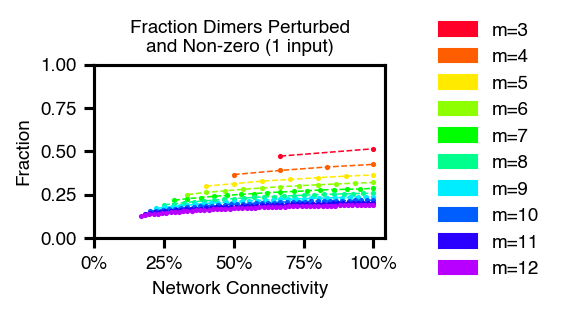

In [43]:
save = True

fig, ax = plt.subplots(figsize=(2.5,1))
cmap = plt.get_cmap('gist_rainbow')

for m_i,m in enumerate(m_list):
    hetero_edges_list = np.load(str(pathlib.Path(load_dir,'param_screen_analysis_1D',f'{m}M_hetero_edges_list.npy')),allow_pickle=True)
    fraction_passed_filter_by_hetero_edges = np.load(str(pathlib.Path(load_dir,'param_screen_analysis_1D',f'{m}M_fraction_passed_filter_by_hetero_edges.npy')),allow_pickle=True)
    max_hetero_edges = num_combos(m,r=2)
    min_hetero_edges = m -1
    graph_density = [x/(max_hetero_edges) \
                               for x in list(range(min_hetero_edges,max_hetero_edges+1))]
    ax.plot(graph_density,fraction_passed_filter_by_hetero_edges,\
            marker='.',linestyle='--',markersize=5,linewidth=0.75,markeredgewidth=0,color=cmap(m_i/(len(m_list))),alpha=1)

_ = ax.set_xlabel('Network Connectivity')
_ = ax.set_ylabel('Fraction')
_ = ax.set_title('Fraction Dimers Perturbed\nand Non-zero (1 input)')

xticks = np.linspace(0,1,5,endpoint=True)
_ = ax.set_xticks(xticks)
_ = ax.set_xticklabels([f'{x:.0%}' for x in xticks])

_ = ax.set_ylim([0,1])

# Customize spines
set_spine_linewidth(ax,1)

# Customize the major ticks
ax.tick_params(axis='both', which='major', length=5, width=1)  # Length and linewidth of major ticks

patches={}
for m_i,m in enumerate(m_list):
    patches[f'm={m}'] = mpatches.Patch(color=cmap(m_i/(len(m_list))),label=f'm={m}')

leg = fig.legend(bbox_to_anchor=(1, 0.5), loc='center left',facecolor='none',\
    handles=list(patches.values()),\
    edgecolor='none')

if save:
    filename = f'FigS4Unpublished_fraction_passed_filter_by_fraction_hetero_edges_1D'
    plt.savefig(str(pathlib.Path(out_dir,filename+'.pdf')),transparent=True,bbox_inches='tight')
    fig.patch.set_facecolor('white')
    plt.savefig(str(pathlib.Path(out_dir,filename+'.png')),dpi=900,bbox_inches='tight')

## Unpublished: Two-input Expressivity Statistics by Network Connectivity

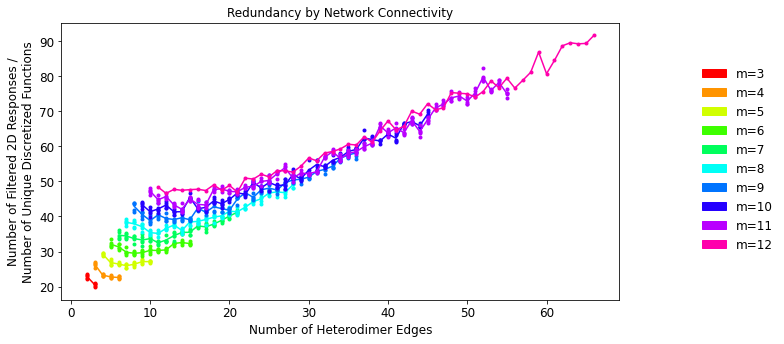

In [ ]:
save = False

fig, ax = plt.subplots(figsize=(10,5))
cmap = plt.get_cmap('gist_rainbow')

for m_i,m in enumerate(m_list):
    hetero_edges_list = np.load(str(pathlib.Path(load_dir,'param_screen_analysis_2D',f'{m}M_hetero_edges_list.npy')),allow_pickle=True)
    redundancy_by_hetero_edges = np.load(str(pathlib.Path(load_dir,'param_screen_analysis_2D',f'{m}M_redundancy_by_hetero_edges.npy')),allow_pickle=True)
    if m == m_list[-1]:
        num_bootstrap_samples_temp = 1
    else:
        num_bootstrap_samples_temp = num_bootstrap_samples
    x_vals = list(itertools.chain.from_iterable([[x for i in range(num_bootstrap_samples_temp)] for x in hetero_edges_list]))
    y_val_means = [np.mean(x) for x in redundancy_by_hetero_edges]
    ax.plot(x_vals,list(itertools.chain.from_iterable(redundancy_by_hetero_edges)),\
            marker='.',linestyle='',markersize=8,markeredgewidth=0,color=cmap(m_i/(len(m_list))),alpha=1)
    ax.plot(hetero_edges_list,y_val_means,\
            marker='',linestyle='-',color=cmap(m_i/(len(m_list))),alpha=1)

_ = ax.set_xlabel('Number of Heterodimer Edges')
_ = ax.set_ylabel('Number of Filtered 2D Responses /\nNumber of Unique Discretized Functions')
_ = ax.set_title(f'Redundancy by Network Connectivity')

patches={}
for m_i,m in enumerate(m_list):
    patches[f'm={m}'] = mpatches.Patch(color=cmap(m_i/(len(m_list))),label=f'm={m}')

leg = fig.legend(bbox_to_anchor=(1, 0.5), loc='center left',facecolor='none',\
    handles=list(patches.values()),\
    edgecolor='none')

if save:
    filename = f'Fig4Unpublished_redundancy_by_hetero_edges_2D'
    #
    plt.savefig(str(pathlib.Path(out_dir,filename+'.pdf')),transparent=True,bbox_inches='tight')
    fig.patch.set_facecolor('white')
    plt.savefig(str(pathlib.Path(out_dir,filename+'.png')),dpi=900,bbox_inches='tight')

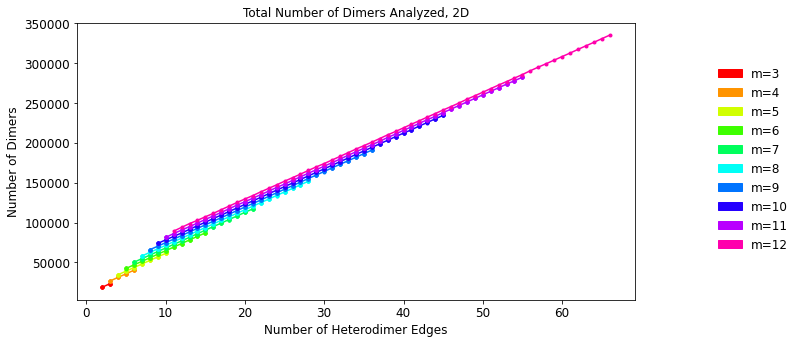

In [ ]:
save = False

fig, ax = plt.subplots(figsize=(10,5))
cmap = plt.get_cmap('gist_rainbow')

for m_i,m in enumerate(m_list):
    hetero_edges_list = np.load(str(pathlib.Path(load_dir,'param_screen_analysis_2D',f'{m}M_hetero_edges_list.npy')),allow_pickle=True)
    num_unfiltered_curves_by_hetero_edges = np.load(str(pathlib.Path(load_dir,'param_screen_analysis_2D',f'{m}M_unfiltered_curves_by_hetero_edges.npy')),allow_pickle=True)
    if m == m_list[-1]:
        num_bootstrap_samples_temp = 1
    else:
        num_bootstrap_samples_temp = num_bootstrap_samples
    x_vals = list(itertools.chain.from_iterable([[x for i in range(num_bootstrap_samples_temp)] for x in hetero_edges_list]))
    y_val_means = [np.mean(x) for x in num_unfiltered_curves_by_hetero_edges]
    ax.plot(x_vals,list(itertools.chain.from_iterable(num_unfiltered_curves_by_hetero_edges)),\
            marker='.',linestyle='',markersize=8,markeredgewidth=0,color=cmap(m_i/(len(m_list))),alpha=1)
    ax.plot(hetero_edges_list,y_val_means,\
            marker='',linestyle='-',color=cmap(m_i/(len(m_list))),alpha=1)

_ = ax.set_xlabel('Number of Heterodimer Edges')
_ = ax.set_ylabel('Number of Dimers')
_ = ax.set_title(f'Total Number of Dimers Analyzed, 2D')

patches={}
for m_i,m in enumerate(m_list):
    patches[f'm={m}'] = mpatches.Patch(color=cmap(m_i/(len(m_list))),label=f'm={m}')

leg = fig.legend(bbox_to_anchor=(1, 0.5), loc='center left',facecolor='none',\
    handles=list(patches.values()),\
    edgecolor='none')

if save:
    filename = f'Fig4Unpublished_num_unfiltered_curves_by_hetero_edges_2D'
    #
    plt.savefig(str(pathlib.Path(out_dir,filename+'.pdf')),transparent=True,bbox_inches='tight')
    fig.patch.set_facecolor('white')
    plt.savefig(str(pathlib.Path(out_dir,filename+'.png')),dpi=900,bbox_inches='tight')

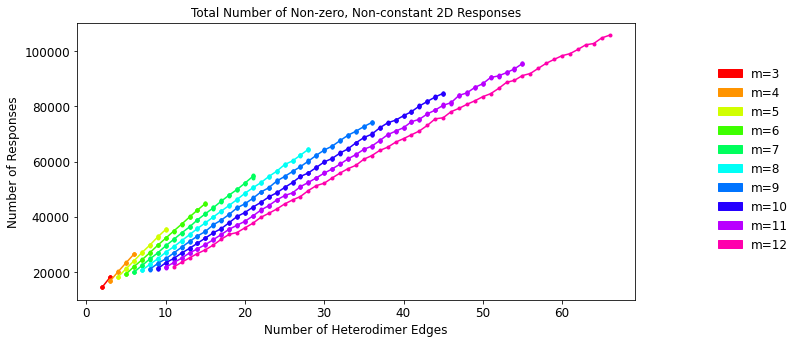

In [ ]:
save = False

fig, ax = plt.subplots(figsize=(10,5))
cmap = plt.get_cmap('gist_rainbow')

for m_i,m in enumerate(m_list):
    hetero_edges_list = np.load(str(pathlib.Path(load_dir,'param_screen_analysis_2D',f'{m}M_hetero_edges_list.npy')),allow_pickle=True)
    num_filtered_curves_by_hetero_edges = np.load(str(pathlib.Path(load_dir,'param_screen_analysis_2D',f'{m}M_filtered_curves_by_hetero_edges.npy')),allow_pickle=True)
    if m == m_list[-1]:
        num_bootstrap_samples_temp = 1
    else:
        num_bootstrap_samples_temp = num_bootstrap_samples
    x_vals = list(itertools.chain.from_iterable([[x for i in range(num_bootstrap_samples_temp)] for x in hetero_edges_list]))
    y_val_means = [np.mean(x) for x in num_filtered_curves_by_hetero_edges]
    ax.plot(x_vals,list(itertools.chain.from_iterable(num_filtered_curves_by_hetero_edges)),\
            marker='.',linestyle='',markersize=8,markeredgewidth=0,color=cmap(m_i/(len(m_list))),alpha=1)
    ax.plot(hetero_edges_list,y_val_means,\
            marker='',linestyle='-',color=cmap(m_i/(len(m_list))),alpha=1)

_ = ax.set_xlabel('Number of Heterodimer Edges')
_ = ax.set_ylabel('Number of Responses')
_ = ax.set_title(f'Total Number of Non-zero, Non-constant 2D Responses')

patches={}
for m_i,m in enumerate(m_list):
    patches[f'm={m}'] = mpatches.Patch(color=cmap(m_i/(len(m_list))),label=f'm={m}')

leg = fig.legend(bbox_to_anchor=(1, 0.5), loc='center left',facecolor='none',\
    handles=list(patches.values()),\
    edgecolor='none')

if save:
    filename = f'Fig4Unpublished_num_filtered_curves_by_hetero_edges_2D'
    #
    plt.savefig(str(pathlib.Path(out_dir,filename+'.pdf')),transparent=True,bbox_inches='tight')
    fig.patch.set_facecolor('white')
    plt.savefig(str(pathlib.Path(out_dir,filename+'.png')),dpi=900,bbox_inches='tight')

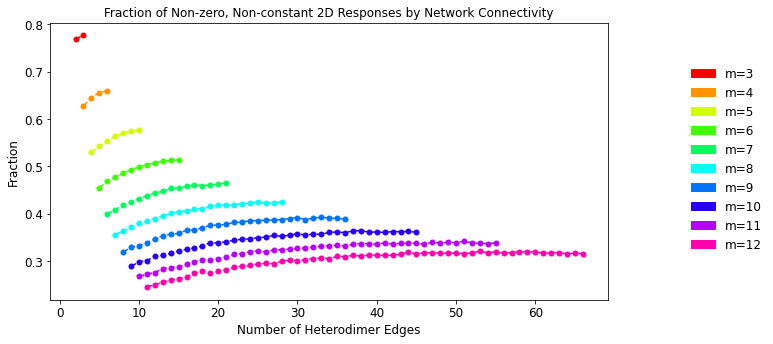

In [ ]:
save = False

fig, ax = plt.subplots(figsize=(10,5))
cmap = plt.get_cmap('gist_rainbow')

for m_i,m in enumerate(m_list):
    hetero_edges_list = np.load(str(pathlib.Path(load_dir,'param_screen_analysis_2D',f'{m}M_hetero_edges_list.npy')),allow_pickle=True)
    fraction_passed_filter_by_hetero_edges = np.load(str(pathlib.Path(load_dir,'param_screen_analysis_2D',f'{m}M_fraction_passed_filter_by_hetero_edges.npy')),allow_pickle=True)
    ax.plot(hetero_edges_list,fraction_passed_filter_by_hetero_edges,\
            marker='.',linestyle='--',markersize=12,markeredgewidth=0,color=cmap(m_i/(len(m_list))),alpha=1)

_ = ax.set_xlabel('Number of Heterodimer Edges')
_ = ax.set_ylabel('Fraction')
_ = ax.set_title('Fraction of Non-zero, Non-constant 2D Responses by Network Connectivity')

patches={}
for m_i,m in enumerate(m_list):
    patches[f'm={m}'] = mpatches.Patch(color=cmap(m_i/(len(m_list))),label=f'm={m}')

leg = fig.legend(bbox_to_anchor=(1, 0.5), loc='center left',facecolor='none',\
    handles=list(patches.values()),\
    edgecolor='none')

if save:
    filename = f'Fig4Unpublished_fraction_passed_filter_by_hetero_edges_2D'
    #
    plt.savefig(str(pathlib.Path(out_dir,filename+'.pdf')),transparent=True,bbox_inches='tight')
    fig.patch.set_facecolor('white')
    plt.savefig(str(pathlib.Path(out_dir,filename+'.png')),dpi=900,bbox_inches='tight')

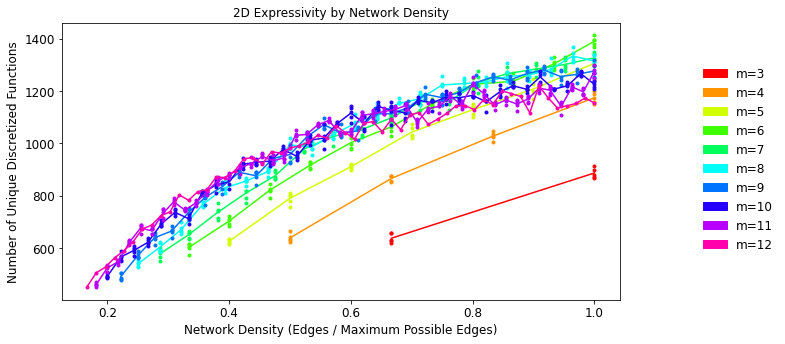

In [ ]:
save = False

fig, ax = plt.subplots(figsize=(10,5))
cmap = plt.get_cmap('gist_rainbow')

for m_i,m in enumerate(m_list):
    hetero_edges_list = np.load(str(pathlib.Path(load_dir,'param_screen_analysis_2D',f'{m}M_hetero_edges_list.npy')),allow_pickle=True)
    num_unique_voxels_by_hetero_edges = np.load(str(pathlib.Path(load_dir,'param_screen_analysis_2D',f'{m}M_num_unique_voxels_by_hetero_edges.npy')),allow_pickle=True)
    max_hetero_edges = num_combos(m,r=2)
    min_hetero_edges = m-1
    graph_density = [x/(max_hetero_edges) \
                               for x in list(range(min_hetero_edges,max_hetero_edges+1))]
    if m == m_list[-1]:
        num_bootstrap_samples_temp = 1
    else:
        num_bootstrap_samples_temp = num_bootstrap_samples
    x_vals = list(itertools.chain.from_iterable([[x for i in range(num_bootstrap_samples_temp)] for x in graph_density]))
    y_val_means = [np.mean(x) for x in num_unique_voxels_by_hetero_edges]
    ax.plot(x_vals,list(itertools.chain.from_iterable(num_unique_voxels_by_hetero_edges)),\
            marker='.',linestyle='',markersize=8,markeredgewidth=0,color=cmap(m_i/(len(m_list))),alpha=1)
    ax.plot(graph_density,y_val_means,\
            marker='',linestyle='-',color=cmap(m_i/(len(m_list))),alpha=1)

_ = ax.set_xlabel('Network Density (Edges / Maximum Possible Edges)')
_ = ax.set_ylabel('Number of Unique Discretized Functions')
_ = ax.set_title(f'2D Expressivity by Network Density')

patches={}
for m_i,m in enumerate(m_list):
    patches[f'm={m}'] = mpatches.Patch(color=cmap(m_i/(len(m_list))),label=f'm={m}')

leg = fig.legend(bbox_to_anchor=(1, 0.5), loc='center left',facecolor='none',\
    handles=list(patches.values()),\
    edgecolor='none')

if save:
    filename = f'Fig4Unpublished_num_unique_voxels_by_fraction_hetero_edges_2D'
    #
    plt.savefig(str(pathlib.Path(out_dir,filename+'.pdf')),transparent=True,bbox_inches='tight')
    fig.patch.set_facecolor('white')
    plt.savefig(str(pathlib.Path(out_dir,filename+'.png')),dpi=900,bbox_inches='tight')

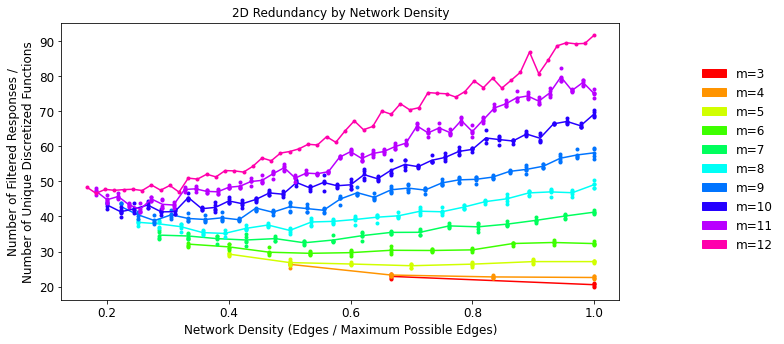

In [ ]:
save = False

fig, ax = plt.subplots(figsize=(10,5))
cmap = plt.get_cmap('gist_rainbow')

for m_i,m in enumerate(m_list):
    hetero_edges_list = np.load(str(pathlib.Path(load_dir,'param_screen_analysis_2D',f'{m}M_hetero_edges_list.npy')),allow_pickle=True)
    redundancy_by_hetero_edges = np.load(str(pathlib.Path(load_dir,'param_screen_analysis_2D',f'{m}M_redundancy_by_hetero_edges.npy')),allow_pickle=True)
    max_hetero_edges = num_combos(m,r=2)
    min_hetero_edges = m-1
    graph_density = [x/(max_hetero_edges) \
                               for x in list(range(min_hetero_edges,max_hetero_edges+1))]
    if m == m_list[-1]:
        num_bootstrap_samples_temp = 1
    else:
        num_bootstrap_samples_temp = num_bootstrap_samples
    x_vals = list(itertools.chain.from_iterable([[x for i in range(num_bootstrap_samples_temp)] for x in graph_density]))
    y_val_means = [np.mean(x) for x in redundancy_by_hetero_edges]
    ax.plot(x_vals,list(itertools.chain.from_iterable(redundancy_by_hetero_edges)),\
            marker='.',linestyle='',markersize=8,markeredgewidth=0,color=cmap(m_i/(len(m_list))),alpha=1)
    ax.plot(graph_density,y_val_means,\
            marker='',linestyle='-',color=cmap(m_i/(len(m_list))),alpha=1)

_ = ax.set_xlabel('Network Density (Edges / Maximum Possible Edges)')
_ = ax.set_ylabel('Number of Filtered Responses /\nNumber of Unique Discretized Functions')
_ = ax.set_title(f'2D Redundancy by Network Density')

patches={}
for m_i,m in enumerate(m_list):
    patches[f'm={m}'] = mpatches.Patch(color=cmap(m_i/(len(m_list))),label=f'm={m}')

leg = fig.legend(bbox_to_anchor=(1, 0.5), loc='center left',facecolor='none',\
    handles=list(patches.values()),\
    edgecolor='none')

if save:
    filename = f'Fig4Unpublished_redundancy_by_fraction_hetero_edges_2D'
    #
    plt.savefig(str(pathlib.Path(out_dir,filename+'.pdf')),transparent=True,bbox_inches='tight')
    fig.patch.set_facecolor('white')
    plt.savefig(str(pathlib.Path(out_dir,filename+'.png')),dpi=900,bbox_inches='tight')

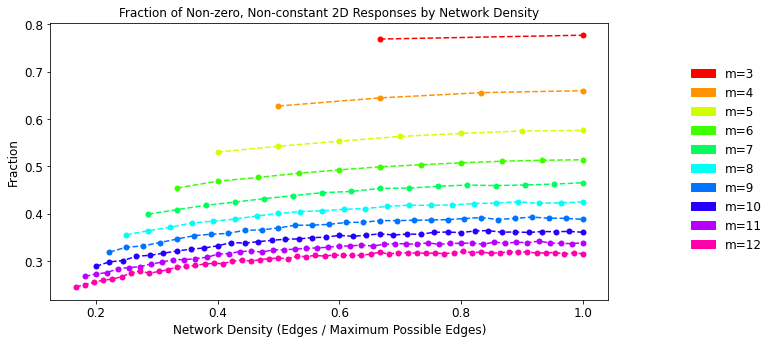

In [ ]:
save = False

fig, ax = plt.subplots(figsize=(10,5))
cmap = plt.get_cmap('gist_rainbow')

for m_i,m in enumerate(m_list):
    hetero_edges_list = np.load(str(pathlib.Path(load_dir,'param_screen_analysis_2D',f'{m}M_hetero_edges_list.npy')),allow_pickle=True)
    fraction_passed_filter_by_hetero_edges = np.load(str(pathlib.Path(load_dir,'param_screen_analysis_2D',f'{m}M_fraction_passed_filter_by_hetero_edges.npy')),allow_pickle=True)
    max_hetero_edges = num_combos(m,r=2)
    min_hetero_edges = m -1
    graph_density = [x/(max_hetero_edges) \
                               for x in list(range(min_hetero_edges,max_hetero_edges+1))]
    ax.plot(graph_density,fraction_passed_filter_by_hetero_edges,\
            marker='.',linestyle='--',markersize=12,markeredgewidth=0,color=cmap(m_i/(len(m_list))),alpha=1)

_ = ax.set_xlabel('Network Density (Edges / Maximum Possible Edges)')
_ = ax.set_ylabel('Fraction')
_ = ax.set_title('Fraction of Non-zero, Non-constant 2D Responses by Network Density')

patches={}
for m_i,m in enumerate(m_list):
    patches[f'm={m}'] = mpatches.Patch(color=cmap(m_i/(len(m_list))),label=f'm={m}')

leg = fig.legend(bbox_to_anchor=(1, 0.5), loc='center left',facecolor='none',\
    handles=list(patches.values()),\
    edgecolor='none')

if save:
    filename = f'Fig4Unpublished_fraction_passed_filter_by_fraction_hetero_edges_2D'
    #
    plt.savefig(str(pathlib.Path(out_dir,filename+'.pdf')),transparent=True,bbox_inches='tight')
    fig.patch.set_facecolor('white')
    plt.savefig(str(pathlib.Path(out_dir,filename+'.png')),dpi=900,bbox_inches='tight')

## Unpublished: Types of Local Extrema by Network Connectivity

In [ ]:
curve_types = [
    'monotonic',
    'max',
    'min',
    'max_min',
    'min_max',
    'max_min_max',
    'min_max_min',
]

curve_type_labels = [
    'Monotonic',
    'One-Maximum',
    'One-Minimum',
    'Maximum-Minimum',
    'Minimum-Maximum',
    'Maximum-Minimum-Maximum',
    'Minimum-Maximum-Minimum',
]

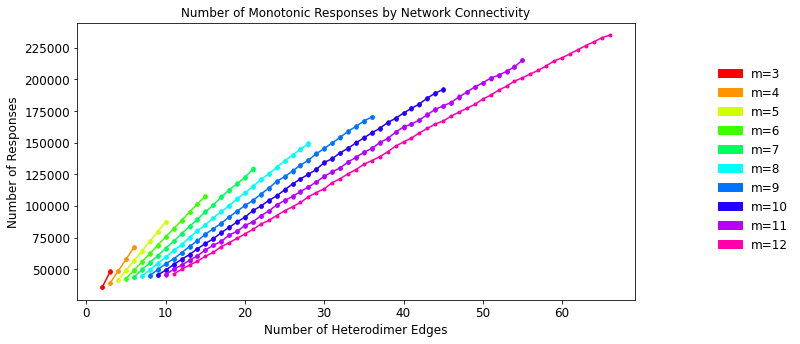

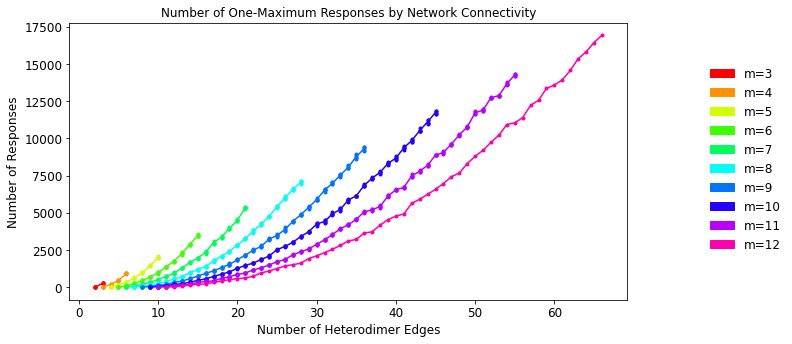

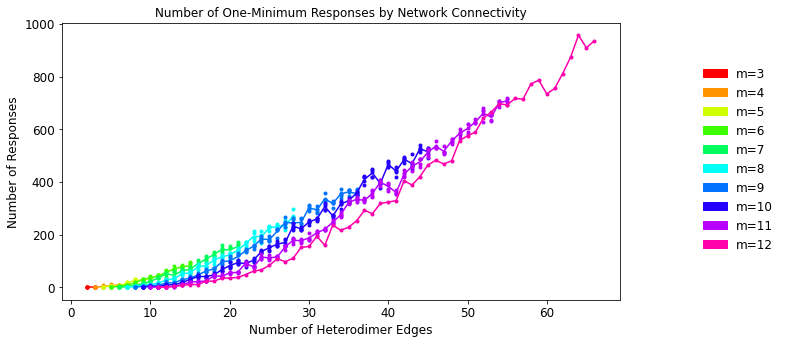

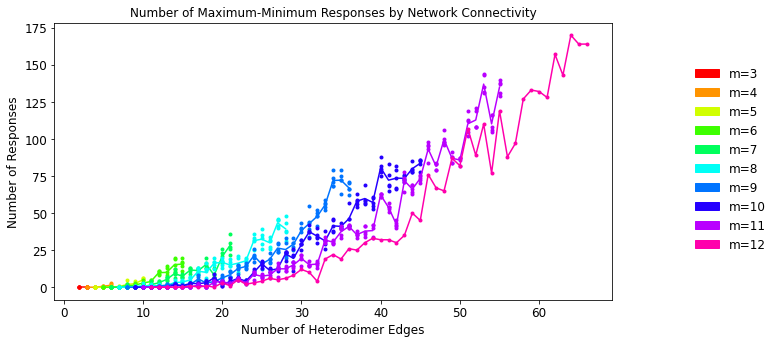

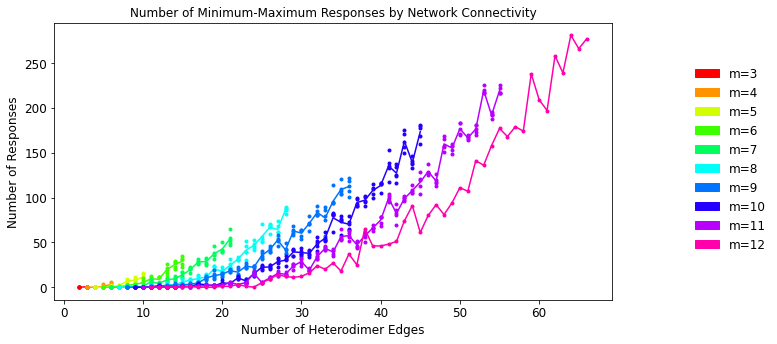

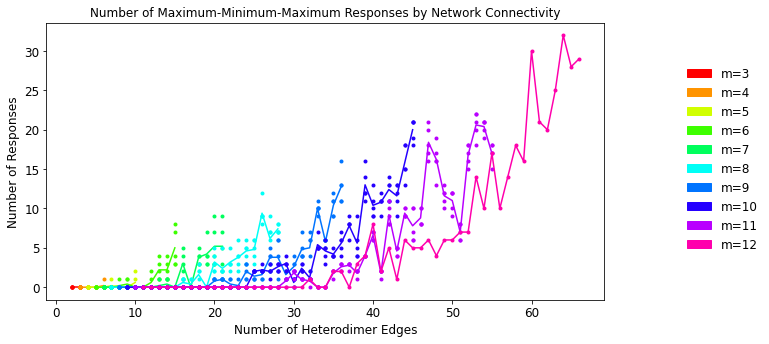

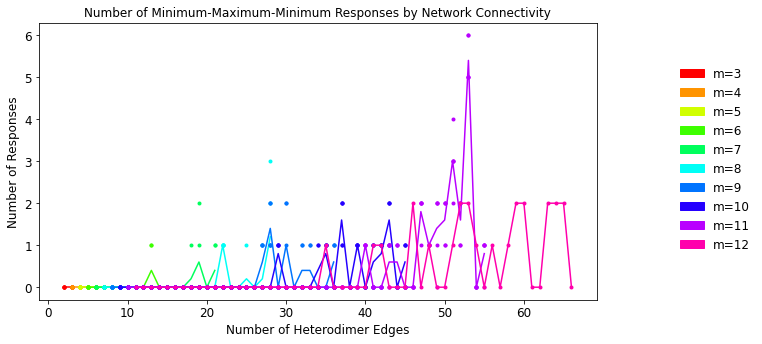

In [ ]:
save = False

# Iterate over types of curves by local extrema
for name,label in zip(curve_types,curve_type_labels):
    fig, ax = plt.subplots(figsize=(10,5))
    cmap = plt.get_cmap('gist_rainbow')
    rng = np.random.default_rng()

    # Iterate over network sizes (each has a different color)
    for m in m_list:
        m_i = m_list.index(m)
        # Load data
        num_responses_by_hetero_edges = np.load(str(pathlib.Path(load_dir,'param_screen_analysis_1D',f'{m}M_'+f'num_responses_{name}_by_hetero_edges.npy')),allow_pickle=True)
        max_hetero_edges = num_combos(m,r=2)
        min_hetero_edges = m -1
        hetero_edges_list = list(range(min_hetero_edges,max_hetero_edges+1))
        # If this is the largest network, all samples were used, so only one bootstrap sample was taken
        if m == m_list[-1]:
            num_bootstrap_samples_temp = 1
        else:
            num_bootstrap_samples_temp = num_bootstrap_samples
        x_vals = list(itertools.chain.from_iterable([[x for i in range(num_bootstrap_samples_temp)] for x in hetero_edges_list]))
        y_val_means = [np.mean(x) for x in num_responses_by_hetero_edges]
        ax.plot(x_vals,list(itertools.chain.from_iterable(num_responses_by_hetero_edges)),\
                marker='.',linestyle='',markersize=8,markeredgewidth=0,color=cmap(m_i/(len(m_list))),alpha=1)
        ax.plot(hetero_edges_list,y_val_means,\
                marker='',linestyle='-',color=cmap(m_i/(len(m_list))),alpha=1)

    _ = ax.set_xlabel('Number of Heterodimer Edges')
    _ = ax.set_ylabel('Number of Responses')
    _ = ax.set_title(f'Number of {label} Responses by Network Connectivity')

    # Make legend
    patches={}
    for m_i,m in enumerate(m_list):
        patches[f'm={m}'] = mpatches.Patch(color=cmap(m_i/(len(m_list))),label=f'm={m}')

    leg = fig.legend(bbox_to_anchor=(1, 0.5), loc='center left',facecolor='none',\
    handles=list(patches.values()),\
    edgecolor='none')
    if save:
        filename = f'Fig4Unpublished_num_responses_{name}_by_hetero_edges'
        #
        plt.savefig(str(pathlib.Path(out_dir,filename+'.pdf')),transparent=True,bbox_inches='tight')
        fig.patch.set_facecolor('white')
        plt.savefig(str(pathlib.Path(out_dir,filename+'.png')),dpi=900,bbox_inches='tight')

## Unpublished: Topological Properties by Network Connectivity

### Dimer Distance to Input

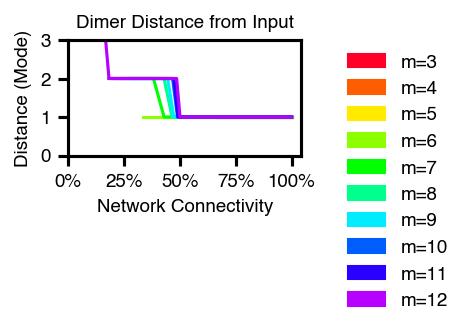

In [40]:
save = True

fig, ax = plt.subplots(figsize=(2,1))
cmap = plt.get_cmap('gist_rainbow')
rng = np.random.default_rng()

m_list = list(range(3,13))

# Iterate over network sizes
for m_i,m in enumerate(m_list):
    # Load data
    distance_to_input_by_hetero_edges = np.load(str(pathlib.Path(load_dir,'param_screen_analysis_1D',f'{m}M_distance_to_input_by_hetero_edges.npy')),allow_pickle=True)
    max_hetero_edges = num_combos(m,r=2)
    min_hetero_edges = m -1
    hetero_edges_list = list(range(min_hetero_edges,max_hetero_edges+1))
    graph_density = [x/(max_hetero_edges) for x in list(range(min_hetero_edges,max_hetero_edges+1))]
    statistic_by_hetero_edges = []
    # Iterate over numbers of heterodimer edges (i.e., connectivity)
    for i,num_hetero_edges in enumerate(range(min_hetero_edges,max_hetero_edges+1)):
        points = np.array(list(itertools.chain.from_iterable(distance_to_input_by_hetero_edges[i])),dtype=np.int64)
        # Calulate some statistic on the points:
        statistic_by_hetero_edges.append(scipy.stats.mode(points,keepdims=False)[0])
        
    # Plot some statistic on the points:
    ax.plot(graph_density,statistic_by_hetero_edges,\
            marker='',linestyle='-',color=cmap(m_i/(len(m_list))),alpha=1)

_ = ax.set_xlabel('Network Connectivity')
_ = ax.set_ylabel('Distance (Mode)')
_ = ax.set_title(f'Dimer Distance from Input')
ymax = 3
_ = ax.set_yticks(list(range(0,ymax+1)))

_ = ax.set_ylim([0,ymax])

xticks = np.linspace(0,1,5,endpoint=True)
_ = ax.set_xticks(xticks)
_ = ax.set_xticklabels([f'{x:.0%}' for x in xticks])

# Customize spines
set_spine_linewidth(ax,1)

# Customize the major ticks
ax.tick_params(axis='both', which='major', length=5, width=1)  # Length and linewidth of major ticks

# Customize the minor ticks
ax.tick_params(axis='both', which='minor', length=2.5, width=0.25)   # Length and linewidth of minor ticks


# Add legend
patches={}
for m_i,m in enumerate(m_list):
    patches[f'm={m}'] = mpatches.Patch(color=cmap(m_i/(len(m_list))),label=f'm={m}')

leg = fig.legend(bbox_to_anchor=(1, 0.9), loc='upper left',facecolor='none',\
    handles=list(patches.values()),\
    edgecolor='none')

if save:
    filename = f'Fig4Unpublished_distance_from_input_by_fraction_hetero_edges'
    plt.savefig(str(pathlib.Path(out_dir,filename+'.pdf')),transparent=True,bbox_inches='tight')
    fig.patch.set_facecolor('white')
    plt.savefig(str(pathlib.Path(out_dir,filename+'.png')),dpi=900,bbox_inches='tight')

### Number of Paths to Input

In [ ]:
allatleast_total = [1,1,1]

def count_dimers_allatleast_total(num_paths_to_input_by_length_by_dimer):
    return np.where((num_paths_to_input_by_length_by_dimer[0,:,2]>=allatleast_total[0])&\
                   (num_paths_to_input_by_length_by_dimer[1,:,2]>=allatleast_total[1])&\
                   (num_paths_to_input_by_length_by_dimer[2,:,2]>=allatleast_total[2]))[0].shape[0]

In [ ]:
max_edge_path_length = 3 # Maximum path length to look for

# We will bootstrap parameter sets to ensure different network sizes have equivalent numbers of networks per connectivity value
num_sets_per_num_edges_by_m = np.load(str(pathlib.Path(load_dir,'param_screen_analysis_1D',f'num_sets_per_num_edges_by_m.npy')),allow_pickle=True)

min_sets_per_num_edges = np.min(num_sets_per_num_edges_by_m) # Minimum number of parameter sets for a particular connectivity value; so we will bootstrap this many parameter sets
num_bootstrap_samples = 5 # Number of bootstrap samples to take
rng = np.random.default_rng()

Working on m=3
Working on m=4
Working on m=5
Working on m=6
Working on m=7
Working on m=8
Working on m=9
Working on m=10
Working on m=11
Working on m=12


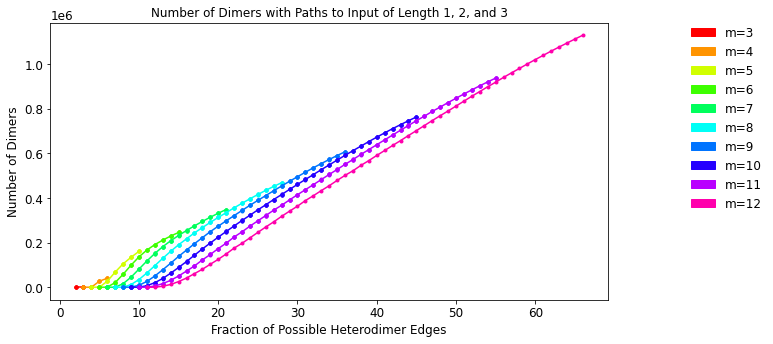

In [ ]:
save = False

fig, ax = plt.subplots(figsize=(10,5))

cmap = plt.get_cmap('gist_rainbow')
rng = np.random.default_rng()

m_list = list(range(2,13))

# Iterate over network sizes (will be different colors)
for m in m_list:
    print(f"Working on m={m}")
    m_i = m_list.index(m)
    num_paths_to_input_by_length_by_hetero_edges = []
    for pathlength_i,pathlength in enumerate(range(1,max_edge_path_length+1)):
        num_paths_to_input_by_length_by_hetero_edges.append(np.load(str(pathlib.Path(load_dir,'param_screen_analysis_1D',f'{m}M_'+f'num_paths_to_input_{pathlength}_by_hetero_edges.npy')),allow_pickle=True))
    param_sets = np.load(str(pathlib.Path(load_dir,'param_screen_1D',f'{m}M',f'K_A_param_sets.npy')),allow_pickle=True)
    max_hetero_edges = num_combos(m,r=2)
    min_hetero_edges = m -1
    num_possible_num_edges = max_hetero_edges - min_hetero_edges + 1
    num_sets_per_num_edges = param_sets.shape[0]//num_possible_num_edges
    curves_per_param_set = num_combos_with_replacement(m,2)
    
    # If this is the last network size, we will only take one bootstrap sample, since every parameter set is used
    if m == m_list[-1]:
        num_bootstrap_samples_temp = 1
    else:
        num_bootstrap_samples_temp = num_bootstrap_samples

    hetero_edges_list = list(range(min_hetero_edges,max_hetero_edges+1))
    num_dimers_by_fraction_hetero_edges = [[] for num_hetero_edges in hetero_edges_list]
    # Iterate over network connectivity (i.e., number of heterodimer edges)
    for num_hetero_edges_i,num_hetero_edges in enumerate(hetero_edges_list):
        # Because we are counting dimers and want a fair comparison, we will bootstrap parameter sets to sample the same number of parameter sets from all network sizes
        for bootstrap_i in range(num_bootstrap_samples_temp):
            # Randomly select parameter sets
            param_set_idx_bootstrap = rng.choice(np.arange(num_sets_per_num_edges),size=(min_sets_per_num_edges,),replace=False)
            # Identify responses that came from these parameter sets
            curve_idx_bootstrap = np.array(list(itertools.chain.from_iterable([list(range(param_set_id*curves_per_param_set,\
                        (param_set_id+1)*curves_per_param_set)) for param_set_id in param_set_idx_bootstrap]))) # Unfiltered IDs
            # Analyze these dimers and count the number that meet the criteria
            num_dimers = count_dimers_allatleast_total(np.array([num_paths_to_input_by_length_by_hetero_edges[pathlength_i][num_hetero_edges_i,curve_idx_bootstrap,:]\
                                          for pathlength_i,pathlength in enumerate(range(1,max_edge_path_length+1))]))
            num_dimers_by_fraction_hetero_edges[num_hetero_edges_i].append(num_dimers)
    x_vals = list(itertools.chain.from_iterable([[x for i in range(num_bootstrap_samples_temp)] for x in hetero_edges_list]))
    y_val_means = [np.mean(x) for x in num_dimers_by_fraction_hetero_edges]
    ax.plot(x_vals,list(itertools.chain.from_iterable(num_dimers_by_fraction_hetero_edges)),\
            marker='.',linestyle='',markersize=8,markeredgewidth=0,color=cmap(m_i/(len(m_list))),alpha=1)
    ax.plot(hetero_edges_list,y_val_means,\
            marker='',linestyle='-',color=cmap(m_i/(len(m_list))),alpha=1)
    
_ = ax.set_xlabel('Fraction of Possible Heterodimer Edges')
_ = ax.set_ylabel('Number of Dimers')
_ = ax.set_title(f'Number of Dimers with Paths to Input of Length 1, 2, and 3')

# Make legend
patches={}
for m_i,m in enumerate(m_list):
    patches[f'm={m}'] = mpatches.Patch(color=cmap(m_i/(len(m_list))),label=f'm={m}')

leg = fig.legend(bbox_to_anchor=(1, 0.9), loc='upper left',facecolor='none',\
    handles=list(patches.values()),\
    edgecolor='none')

if save:
    filename = f'Fig4Unpublished_num_dimers_1_2_and3_paths_to_input_by_hetero_edges'
    #
    plt.savefig(str(pathlib.Path(out_dir,filename+'.pdf')),transparent=True,bbox_inches='tight')
    fig.patch.set_facecolor('white')
    plt.savefig(str(pathlib.Path(out_dir,filename+'.png')),dpi=900,bbox_inches='tight')

### Number of Cliques

First plot the fraction of networks with cliques in general

In [ ]:
min_size_clique = 3
max_size_clique = 4
size_options = list(range(min_size_clique,max_size_clique+1))
num_options = len(size_options)

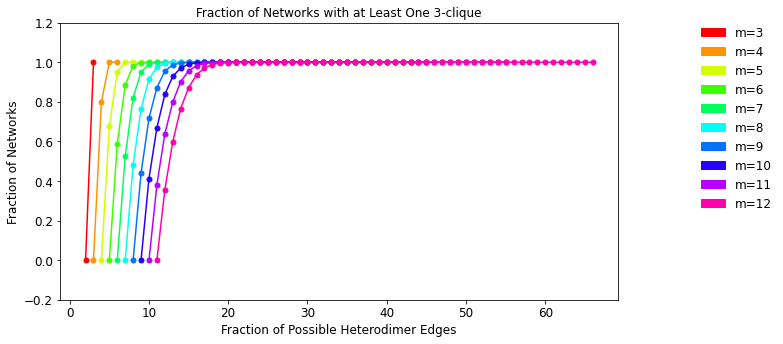

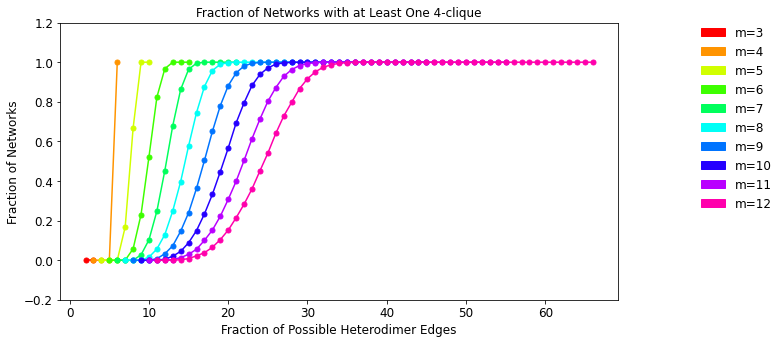

In [ ]:
save = False

cmap = plt.get_cmap('gist_rainbow')
rng = np.random.default_rng()

# For legend
patches={}
for m_i,m in enumerate(m_list):
    patches[f'm={m}'] = mpatches.Patch(color=cmap(m_i/(len(m_list))),label=f'm={m}')

# For each clique size
for size_i,size in enumerate(size_options):
    fig, ax = plt.subplots(figsize=(10,5))
    
    # Iterate over network size (each will be a different color)
    for m_i, m in enumerate(m_list):
        num_cliques_by_hetero_edges_by_paramset = np.load(str(pathlib.Path(load_dir,'param_screen_analysis_1D',f'{m}M_num_{size}cliques_by_hetero_edges_by_paramset.npy')),allow_pickle=True)
        fraction_paramsets_with_clique_byheteroedges = [np.where(num_cliques_by_hetero_edges_by_paramset[hetero_edges_i]>0)[0].shape[0]/\
                                                        num_cliques_by_hetero_edges_by_paramset[hetero_edges_i].shape[0]\
                                                        for hetero_edges_i in range(len(num_cliques_by_hetero_edges_by_paramset))]
        max_hetero_edges = num_combos(m,r=2)
        min_hetero_edges = m -1
        hetero_edges_list = list(range(min_hetero_edges,max_hetero_edges+1))
        ax.plot(hetero_edges_list,fraction_paramsets_with_clique_byheteroedges,\
                marker='.',markersize=10,linestyle='-',color=cmap(m_i/(len(m_list))),alpha=1)

    _ = ax.set_xlabel('Fraction of Possible Heterodimer Edges')
    _ = ax.set_ylabel(f'Fraction of Networks')
    _ = ax.set_title(f'Fraction of Networks with at Least One {size}-clique')

    # Make legend
    leg = fig.legend(bbox_to_anchor=(1, 0.9), loc='upper left',facecolor='none',\
        handles=list(patches.values()),\
        edgecolor='none')

    _ = ax.set_ylim([-0.2,1.2])

    if save:
        filename = f'Fig4Unpublished_fraction_with_cliques_{size}_by_fraction_hetero_edges'
        #
        plt.savefig(str(pathlib.Path(out_dir,filename+'.pdf')),transparent=True,bbox_inches='tight')
        fig.patch.set_facecolor('white')
        plt.savefig(str(pathlib.Path(out_dir,filename+'.png')),dpi=900,bbox_inches='tight')

Then plot for fraction of networks with cliques, including the input monomer:

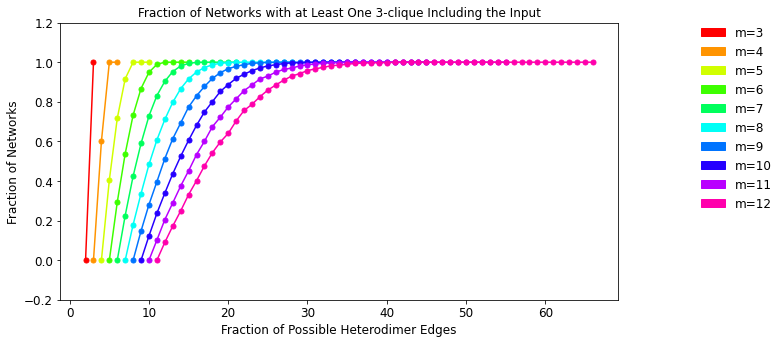

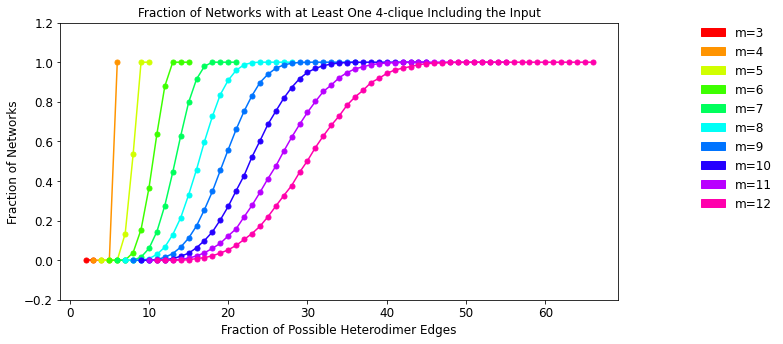

In [ ]:
save = False

cmap = plt.get_cmap('gist_rainbow')
rng = np.random.default_rng()

# For legend
patches={}
for m_i,m in enumerate(m_list):
    patches[f'm={m}'] = mpatches.Patch(color=cmap(m_i/(len(m_list))),label=f'm={m}')

# For each clique size
for size_i,size in enumerate(size_options):
    fig, ax = plt.subplots(figsize=(10,5))
    
    # Iterate over network size (each will be a different color)
    for m_i, m in enumerate(m_list):
        num_cliques_withinput_by_hetero_edges_by_paramset = np.load(str(pathlib.Path(load_dir,'param_screen_analysis_1D',f'{m}M_num_{size}cliques_withinput_by_hetero_edges_by_paramset.npy')),allow_pickle=True)
        max_hetero_edges = num_combos(m,r=2)
        min_hetero_edges = m -1
        hetero_edges_list = list(range(min_hetero_edges,max_hetero_edges+1))
        fraction_paramsets_with_clique_byheteroedges = [np.where(num_cliques_withinput_by_hetero_edges_by_paramset[hetero_edges_i]>0)[0].shape[0]/\
                                                    num_cliques_withinput_by_hetero_edges_by_paramset[hetero_edges_i].shape[0]\
                                                    for hetero_edges_i in range(len(num_cliques_withinput_by_hetero_edges_by_paramset))]
        ax.plot(hetero_edges_list,fraction_paramsets_with_clique_byheteroedges,\
                marker='.',markersize=10,linestyle='-',color=cmap(m_i/(len(m_list))),alpha=1)

    _ = ax.set_xlabel('Fraction of Possible Heterodimer Edges')
    _ = ax.set_ylabel(f'Fraction of Networks')
    _ = ax.set_title(f'Fraction of Networks with at Least One {size}-clique Including the Input')

    # Make legend
    leg = fig.legend(bbox_to_anchor=(1, 0.9), loc='upper left',facecolor='none',\
        handles=list(patches.values()),\
        edgecolor='none')

    _ = ax.set_ylim([-0.2,1.2])

    if save:
        filename = f'Fig4Unpublished_fraction_with_cliques_{size}_withinput_by_fraction_hetero_edges'
        #
        plt.savefig(str(pathlib.Path(out_dir,filename+'.pdf')),transparent=True,bbox_inches='tight')
        fig.patch.set_facecolor('white')
        plt.savefig(str(pathlib.Path(out_dir,filename+'.png')),dpi=900,bbox_inches='tight')

The plot the total number of dimers in cliques:

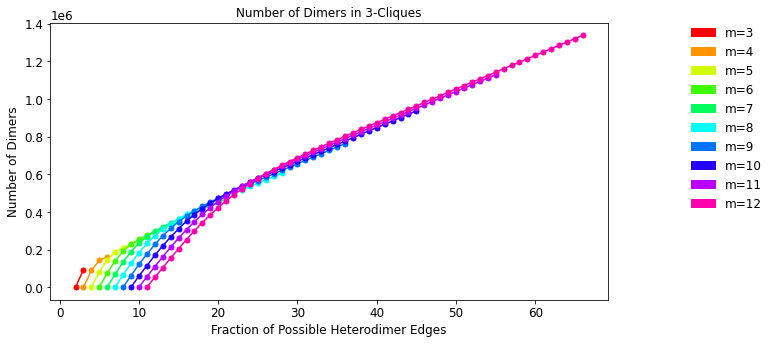

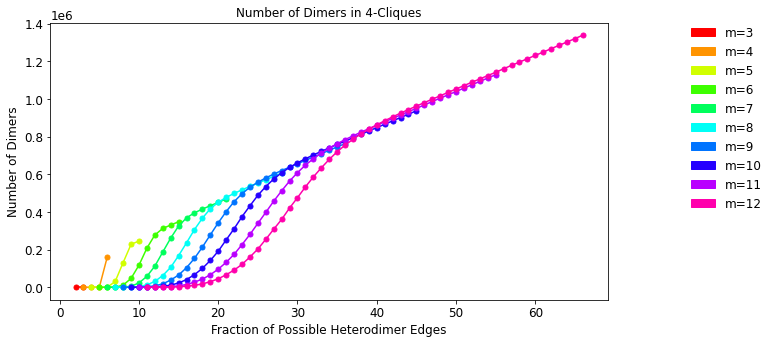

In [ ]:
save = False

cmap = plt.get_cmap('gist_rainbow')
rng = np.random.default_rng()

# For legend
patches={}
for m_i,m in enumerate(m_list):
    patches[f'm={m}'] = mpatches.Patch(color=cmap(m_i/(len(m_list))),label=f'm={m}')

# For each clique size
for size_i,size in enumerate(size_options):
    fig, ax = plt.subplots(figsize=(10,5))
    
    # Iterate over network size (each will be a different color)
    for m_i, m in enumerate(m_list):
        num_dimersinclique_by_hetero_edges = np.load(str(pathlib.Path(load_dir,'param_screen_analysis_1D',f'{m}M_num_dimersin{size}clique_by_hetero_edges.npy')),allow_pickle=True)
        max_hetero_edges = num_combos(m,r=2)
        min_hetero_edges = m -1
        hetero_edges_list = list(range(min_hetero_edges,max_hetero_edges+1))
        ax.plot(hetero_edges_list,num_dimersinclique_by_hetero_edges,\
                marker='.',markersize=10,linestyle='-',color=cmap(m_i/(len(m_list))),alpha=1)

    _ = ax.set_xlabel('Fraction of Possible Heterodimer Edges')
    _ = ax.set_ylabel(f'Number of Dimers')
    _ = ax.set_title(f'Number of Dimers in {size}-Cliques')

    # Make legend
    leg = fig.legend(bbox_to_anchor=(1, 0.9), loc='upper left',facecolor='none',\
        handles=list(patches.values()),\
        edgecolor='none')
    
    if save:
        filename = f'Fig4Unpublished_dimers_in_cliques_{size}_by_fraction_hetero_edges'
        #
        plt.savefig(str(pathlib.Path(out_dir,filename+'.pdf')),transparent=True,bbox_inches='tight')
        fig.patch.set_facecolor('white')
        plt.savefig(str(pathlib.Path(out_dir,filename+'.png')),dpi=900,bbox_inches='tight')

As well as the total number of dimers in cliques with the input monomer:

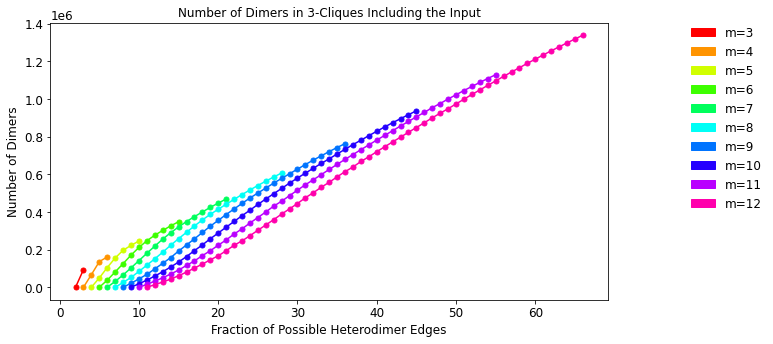

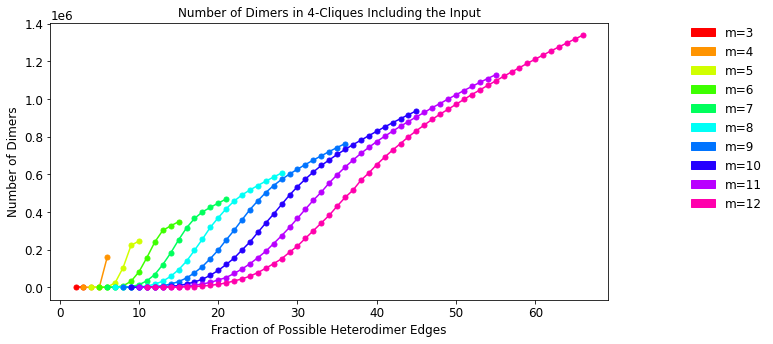

In [ ]:
save = False

cmap = plt.get_cmap('gist_rainbow')
rng = np.random.default_rng()

# For legend
patches={}
for m_i,m in enumerate(m_list):
    patches[f'm={m}'] = mpatches.Patch(color=cmap(m_i/(len(m_list))),label=f'm={m}')

# For each clique size
for size_i,size in enumerate(size_options):
    fig, ax = plt.subplots(figsize=(10,5))
    
    # Iterate over network size (each will be a different color)
    for m_i, m in enumerate(m_list):
        num_dimersinclique_withinput_by_hetero_edges = np.load(str(pathlib.Path(load_dir,'param_screen_analysis_1D',f'{m}M_num_dimersin{size}clique_withinput_by_hetero_edges.npy')),allow_pickle=True)
        max_hetero_edges = num_combos(m,r=2)
        min_hetero_edges = m -1
        hetero_edges_list = list(range(min_hetero_edges,max_hetero_edges+1))
        ax.plot(hetero_edges_list,num_dimersinclique_withinput_by_hetero_edges,\
                marker='.',markersize=10,linestyle='-',color=cmap(m_i/(len(m_list))),alpha=1)

    _ = ax.set_xlabel('Fraction of Possible Heterodimer Edges')
    _ = ax.set_ylabel(f'Number of Dimers')
    _ = ax.set_title(f'Number of Dimers in {size}-Cliques Including the Input')

    # Make legend
    leg = fig.legend(bbox_to_anchor=(1, 0.9), loc='upper left',facecolor='none',\
        handles=list(patches.values()),\
        edgecolor='none')
    
    if save:
        filename = f'Fig4Unpublished_dimers_in_cliques_{size}_withinput_by_fraction_hetero_edges'
        #
        plt.savefig(str(pathlib.Path(out_dir,filename+'.pdf')),transparent=True,bbox_inches='tight')
        fig.patch.set_facecolor('white')
        plt.savefig(str(pathlib.Path(out_dir,filename+'.png')),dpi=900,bbox_inches='tight')

### Number of Cycles

First plot the fraction of networks with a 4-cycle:

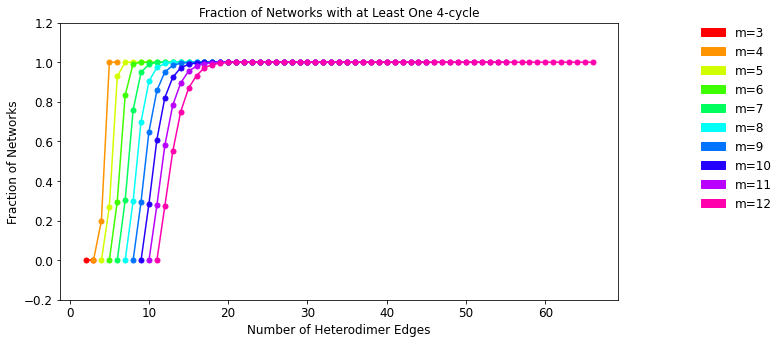

In [ ]:
save = False

cmap = plt.get_cmap('gist_rainbow')
rng = np.random.default_rng()

# For legend
patches={}
for m_i,m in enumerate(m_list):
    patches[f'm={m}'] = mpatches.Patch(color=cmap(m_i/(len(m_list))),label=f'm={m}')

fig, ax = plt.subplots(figsize=(10,5))

# Iterate over network sizes
for m_i, m in enumerate(m_list):
    num_cycles_by_hetero_edges_by_paramset = np.load(str(pathlib.Path(load_dir,'param_screen_analysis_1D',f'{m}M_num_4cycles_by_hetero_edges_by_paramset.npy')),allow_pickle=True)
    fraction_paramsets_with_cycle_byheteroedges = [np.where(num_cycles_by_hetero_edges_by_paramset[hetero_edges_i]>0)[0].shape[0]/\
                                                    num_cycles_by_hetero_edges_by_paramset[hetero_edges_i].shape[0]\
                                                    for hetero_edges_i in range(len(num_cycles_by_hetero_edges_by_paramset))]
    max_hetero_edges = num_combos(m,r=2)
    min_hetero_edges = m -1
    hetero_edges_list = list(range(min_hetero_edges,max_hetero_edges+1))
    ax.plot(hetero_edges_list,fraction_paramsets_with_cycle_byheteroedges,\
            marker='.',markersize=10,linestyle='-',color=cmap(m_i/(len(m_list))),alpha=1)

_ = ax.set_xlabel('Number of Heterodimer Edges')
_ = ax.set_ylabel(f'Fraction of Networks')
_ = ax.set_title(f'Fraction of Networks with at Least One 4-cycle')

# Make legend
leg = fig.legend(bbox_to_anchor=(1, 0.9), loc='upper left',facecolor='none',\
    handles=list(patches.values()),\
    edgecolor='none')

_ = ax.set_ylim([-0.2,1.2])

if save:
    filename = f'Fig4Unpublished_fraction_with_cycles_4_by_hetero_edges'
    #
    plt.savefig(str(pathlib.Path(out_dir,filename+'.pdf')),transparent=True,bbox_inches='tight')
    fig.patch.set_facecolor('white')
    plt.savefig(str(pathlib.Path(out_dir,filename+'.png')),dpi=900,bbox_inches='tight')

Then plot the fraction of networks with a 4-cycle including the input monomer:

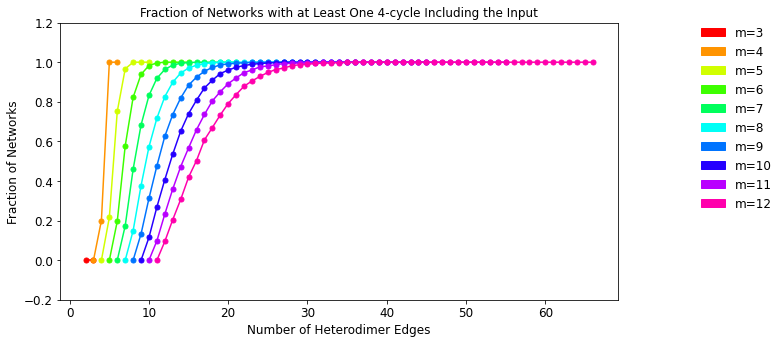

In [ ]:
save = False

cmap = plt.get_cmap('gist_rainbow')
rng = np.random.default_rng()

# For legend
patches={}
for m_i,m in enumerate(m_list):
    patches[f'm={m}'] = mpatches.Patch(color=cmap(m_i/(len(m_list))),label=f'm={m}')

fig, ax = plt.subplots(figsize=(10,5))

# Iterate over network sizes
for m_i, m in enumerate(m_list):
    num_cycles_withinput_by_hetero_edges_by_paramset = np.load(str(pathlib.Path(load_dir,'param_screen_analysis_1D',f'{m}M_num_4cycles_withinput_by_hetero_edges_by_paramset.npy')),allow_pickle=True)
    max_hetero_edges = num_combos(m,r=2)
    min_hetero_edges = m -1
    hetero_edges_list = list(range(min_hetero_edges,max_hetero_edges+1))
    fraction_paramsets_with_cycle_byheteroedges = [np.where(num_cycles_withinput_by_hetero_edges_by_paramset[hetero_edges_i]>0)[0].shape[0]/\
                                                num_cycles_withinput_by_hetero_edges_by_paramset[hetero_edges_i].shape[0]\
                                                for hetero_edges_i in range(len(num_cycles_withinput_by_hetero_edges_by_paramset))]
    ax.plot(hetero_edges_list,fraction_paramsets_with_cycle_byheteroedges,\
            marker='.',markersize=10,linestyle='-',color=cmap(m_i/(len(m_list))),alpha=1)

_ = ax.set_xlabel('Number of Heterodimer Edges')
_ = ax.set_ylabel(f'Fraction of Networks')
_ = ax.set_title(f'Fraction of Networks with at Least One 4-cycle Including the Input')

# Make legend
leg = fig.legend(bbox_to_anchor=(1, 0.9), loc='upper left',facecolor='none',\
    handles=list(patches.values()),\
    edgecolor='none')

_ = ax.set_ylim([-0.2,1.2])

if save:
    filename = f'Fig4Unpublished_fraction_with_cycles_4_withinput_by_hetero_edges'
    #
    plt.savefig(str(pathlib.Path(out_dir,filename+'.pdf')),transparent=True,bbox_inches='tight')
    fig.patch.set_facecolor('white')
    plt.savefig(str(pathlib.Path(out_dir,filename+'.png')),dpi=900,bbox_inches='tight')

Then plot the number of dimers in 4-cycles:

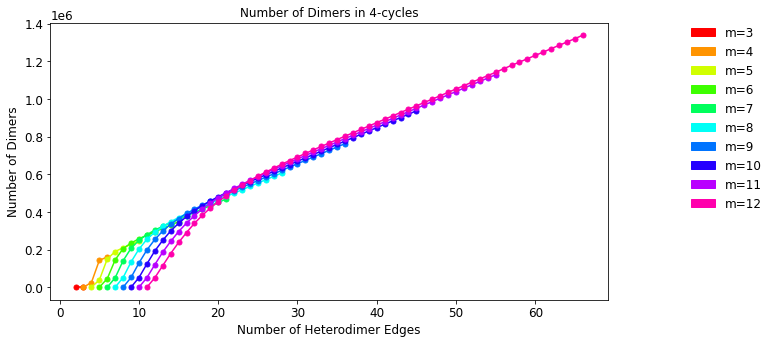

In [ ]:
save = False

cmap = plt.get_cmap('gist_rainbow')
rng = np.random.default_rng()

# For legend
patches={}
for m_i,m in enumerate(m_list):
    patches[f'm={m}'] = mpatches.Patch(color=cmap(m_i/(len(m_list))),label=f'm={m}')

fig, ax = plt.subplots(figsize=(10,5))

# Iterate over network sizes
for m_i, m in enumerate(m_list):
    num_dimersincycle_by_hetero_edges = np.load(str(pathlib.Path(load_dir,'param_screen_analysis_1D',f'{m}M_num_dimersin4cycle_by_hetero_edges.npy')),allow_pickle=True)
    max_hetero_edges = num_combos(m,r=2)
    min_hetero_edges = m -1
    hetero_edges_list = list(range(min_hetero_edges,max_hetero_edges+1))
    ax.plot(hetero_edges_list,num_dimersincycle_by_hetero_edges,\
            marker='.',markersize=10,linestyle='-',color=cmap(m_i/(len(m_list))),alpha=1)

_ = ax.set_xlabel('Number of Heterodimer Edges')
_ = ax.set_ylabel(f'Number of Dimers')
_ = ax.set_title(f'Number of Dimers in 4-cycles')

# Make legend
leg = fig.legend(bbox_to_anchor=(1, 0.9), loc='upper left',facecolor='none',\
    handles=list(patches.values()),\
    edgecolor='none')

if save:
    filename = f'Fig4Unpublished_dimers_in_cycles_4_by_hetero_edges'
    #
    plt.savefig(str(pathlib.Path(out_dir,filename+'.pdf')),transparent=True,bbox_inches='tight')
    fig.patch.set_facecolor('white')
    plt.savefig(str(pathlib.Path(out_dir,filename+'.png')),dpi=900,bbox_inches='tight')

Then, finally, plot the number of dimers in 4-cycles including the input monomer

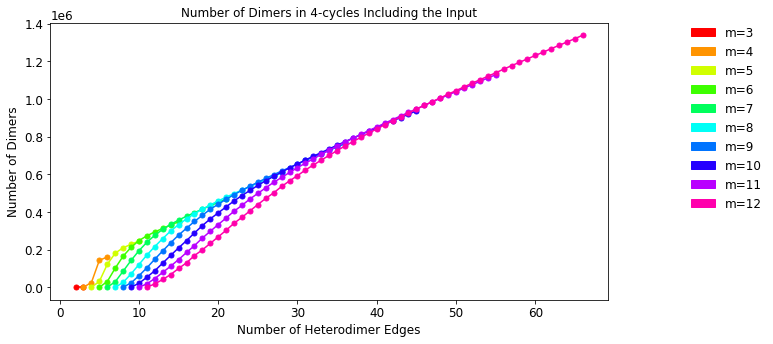

In [ ]:
save = False

cmap = plt.get_cmap('gist_rainbow')
rng = np.random.default_rng()

# For legend
patches={}
for m_i,m in enumerate(m_list):
    patches[f'm={m}'] = mpatches.Patch(color=cmap(m_i/(len(m_list))),label=f'm={m}')

fig, ax = plt.subplots(figsize=(10,5))

# Iterate over network sizes
for m_i, m in enumerate(m_list):
    num_dimersincycle_withinput_by_hetero_edges = np.load(str(pathlib.Path(load_dir,'param_screen_analysis_1D',f'{m}M_num_dimersin4cycle_withinput_by_hetero_edges.npy')),allow_pickle=True)
    max_hetero_edges = num_combos(m,r=2)
    min_hetero_edges = m -1
    hetero_edges_list = list(range(min_hetero_edges,max_hetero_edges+1))
    ax.plot(hetero_edges_list,num_dimersincycle_withinput_by_hetero_edges,\
            marker='.',markersize=10,linestyle='-',color=cmap(m_i/(len(m_list))),alpha=1)

_ = ax.set_xlabel('Number of Heterodimer Edges')
_ = ax.set_ylabel(f'Number of Dimers')
_ = ax.set_title(f'Number of Dimers in 4-cycles Including the Input')

# Make legend
leg = fig.legend(bbox_to_anchor=(1, 0.9), loc='upper left',facecolor='none',\
    handles=list(patches.values()),\
    edgecolor='none')

if save:
    filename = f'Fig4Unpublished_dimers_in_cycles_4_withinput_by_hetero_edges'
    #
    plt.savefig(str(pathlib.Path(out_dir,filename+'.pdf')),transparent=True,bbox_inches='tight')
    fig.patch.set_facecolor('white')
    plt.savefig(str(pathlib.Path(out_dir,filename+'.png')),dpi=900,bbox_inches='tight')